<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/uOttawa_peak_Ensemble_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. find a way for forecasting the peak of one building > using ensemble learning for forecasting the peak of uOttawa


2. Defining a nre metric


3. Generalize this method for large Ontario's data

## **1. Importingt librarries** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame
from pandas import concat
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
from sklearn.metrics import mean_absolute_error
from pandas import DataFrame, concat
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
import numpy as np
from dataclasses import dataclass
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame
from pandas import concat
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Flatten

from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, MaxPooling2D, Flatten,Conv1D,Dropout,MaxPooling1D,AveragePooling1D
# saving and loading the .h5 model
from keras.models import Model
# define the model architecture
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM, Dropout, Dense, Input, Dot, Activation
from keras.layers import SimpleRNN
#####
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# make the model reproducible Ask Luc
import time
import os
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.losses import Huber
from keras import backend as K
from random import seed

## **2. Functions** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In [ ]:
class Metric:
    def __init__(self):
        self.metrics = pd.DataFrame(columns=['R-squared', 'MAE', 'MSE', 'CVRMSE', 'Overprediction', 'Underprediction'])

    def add(self, y_true, y_pred):
        residuals = y_true - y_pred
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        mae = np.mean(np.abs(residuals))
        mse = np.mean(residuals ** 2)
        rmse = np.sqrt(mse)
        cvrmse = (rmse / np.mean(y_true)) * 100

        overprediction, underprediction = self.over_under_prediction(y_true, y_pred)

        self.metrics.loc[len(self.metrics)] = [r_squared, mae, mse, cvrmse, overprediction, underprediction]

    def get(self):
        return self.metrics

    def over_under_prediction(self, y_true, y_pred):
        overprediction = np.mean(np.where(y_pred > y_true, 1, 0))
        underprediction = np.mean(np.where(y_pred < y_true, 1, 0))
        return overprediction, underprediction

def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# Data is splitted with thime (Miroslava)

import pandas as pd

def normalize_data(dataframe):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe)
    normalized_dataframe = pd.DataFrame(normalized_data, columns=dataframe.columns)
    return normalized_dataframe


def split_data(series):
    """
    Splits input series into train and test sets (80/20 split).

    Args:
        series: The input series or DataFrame to split.

    Returns:
        train_data: 80% of the data for training.
        test_data: 20% of the data for testing.
    """
    # Calculate the index for the split
    split_index = int(len(series) * 0.8)

    # Split the data
    train_data = series[:split_index]
    test_data = series[split_index:]

    return train_data, test_data

'''
def split_data(series):
    """Splits input series into train, val and test.
    """
    train_data = series[:]
    test_data = series[:]
    return train_data, test_data
# split a multivariate sequence into samples
# data with time as feature
'''

'\ndef split_data(series):\n    """Splits input series into train, val and test.\n    """\n    train_data = series[:]\n    test_data = series[:]\n    return train_data, test_data\n# split a multivariate sequence into samples\n# data with time as feature\n'

In [ ]:
np.random.seed(1)
tf.random.set_seed(2)
# FUNCTIONS
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

class Metric:
    def __init__(self):
        self.metrics = pd.DataFrame(columns=['R-squared', 'MAE', 'MSE',  'CVRMSE'])

    def add(self, y_true, y_pred):
        residuals = y_true - y_pred
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        mae = np.mean(np.abs(residuals))
        mse = np.mean(residuals ** 2)
        #mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        rmse = np.sqrt(mse)
        cvrmse = (rmse / np.mean(y_true)) * 100
        self.metrics.loc[len(self.metrics)] = [r_squared, mae, mse,  cvrmse]

    def get(self):
        return self.metrics

import matplotlib.pyplot as plt
def calculate_metrics(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)
    cvrmse = (rmse / np.mean(y_true)) * 100
    return r_squared, mae, mse, cvrmse

class MetricsPlotter:
    def __init__(self, mse, val_mse, loss, val_loss):
        self.mse = mse
        self.val_mse = val_mse
        self.loss = loss
        self.val_loss = val_loss
        self.fig, (self.ax1, self.ax2) = plt.subplots(2, 1, figsize=(10, 8))

    def plot(self, title=None):
        epochs = len(self.mse)  # Get the number of epochs

        # plot the mse values on the first subplot
        self.ax1.plot(range(epochs), self.mse, label='Training MSE')
        self.ax1.plot(range(epochs), self.val_mse, label='Validation MSE')
        self.ax1.set_ylabel('MSE')
        self.ax1.legend()

        # plot the loss values on the second subplot
        self.ax2.plot(range(epochs), self.loss, label='Training Loss')
        self.ax2.plot(range(epochs), self.val_loss, label='Validation Loss')
        self.ax2.set_ylabel('Loss')
        self.ax2.legend()

        # set the x-axis label and tick marks
        self.ax2.set_xlabel('Epoch')
        self.ax2.set_xticks(range(epochs))
        self.ax2.set_xticklabels(range(1, epochs + 1))

        # set the title of the plot
        if title is not None:
            self.fig.suptitle(title)

        plt.show()

# make the results reproducible
def split_data2(data, first_fraction, second_fraction=None):
    n_total = len(data)
    n_first_split = round(n_total * first_fraction)

    first_split = data[:n_first_split]

    if second_fraction is None:
        second_split = data[n_first_split:]
    else:
        n_second_split = round(n_total * second_fraction)
        second_split = data[n_first_split:n_first_split+n_second_split]

    return first_split, second_split
def split_data(series):
    """Splits input series into train, val and test.
    """
    train_data = series[:]
    test_data = series[:]
    return train_data, test_data
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

def R_squared(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Data is splitted with thime (Miroslava)
def load_data(col=None, path="", verbose=False):
    df = pd.read_csv(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df

from sklearn.preprocessing import MinMaxScaler

def normalize_data(dataframe):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe)
    normalized_dataframe = pd.DataFrame(normalized_data, columns=dataframe.columns)
    return normalized_dataframe

Full integration example

# merging weather data and elec data and exporting to google drive

## **3. Data cleaning** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

In [ ]:
# mounting google drive and uploading the data
drive.mount('/content/saj')

Drive already mounted at /content/saj; to attempt to forcibly remount, call drive.mount("/content/saj", force_remount=True).


In [ ]:
def load_data(col=None, path='/content/saj/MyDrive/Kavgic/Peak load forecasting ( 3rd paper)/uOttawa energy  and weather/Elect of uOttawa.xlsx', verbose=False ):
    df = pd.read_excel(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df
df = load_data()

In [ ]:
df

Date  1 Stewart St           55 Laurier Ave E  \
0     2016-01-01 00:00:00        15.185                 205.560000   
1     2016-01-01 01:00:00        15.152                 209.880000   
2     2016-01-01 02:00:00        15.070                 218.160000   
3     2016-01-01 03:00:00        15.149                 217.800000   
4     2016-01-01 04:00:00        15.125                 214.080000   
...                   ...           ...                        ...   
42307 2020-10-28 19:00:00        47.171                 221.759995   
42308 2020-10-28 20:00:00        46.442                 220.199994   
42309 2020-10-28 21:00:00        27.997                 193.559994   
42310 2020-10-28 22:00:00        28.379                 177.359997   
42311 2020-10-28 23:00:00        21.479                 172.679995   

                56 Laurier Ave E5  200 Lees Ave  200 Lees Ave.1  \
0                             0.0       192.852           25.16   
1                             0.0       195.624           25.24   
2                             0.0       194.256           24.64   
3                             0.0       196.992           25.44   
4                             0.0       198.144           24.88   
...                           ...           ...             ...   
42307                         0.0       240.156           30.20   
42308                         0.0       237.960           31.12   
42309                         0.0       238.860           31.04   
42310                         0.0       241.200           30.68   
42311                         0.0       117.504           22.40   

       157 Laurier Ave E  801 King Edward Ave  25 Templeton St  \
0                 66.864               252.00           364.59   
1                 66.528               215.10           364.77   
2                 64.800               238.23           360.90   
3                 64.848               192.60           364.23   
4                 64.320               230.49           366.57   
...                  ...                  ...              ...   
42307             60.384               347.40           527.40   
42308             60.048               348.66           519.66   
42309             58.944               342.00           494.55   
42310             58.512               231.93           496.80   
42311             56.592               245.07           506.43   

       600 Peter Morand Cres  850 Peter Morand Cres  65 Universite Pvt  \
0                      52.32              19.728000           4537.440   
1                      52.11              19.332000           4511.520   
2                      52.29              19.800000           4505.760   
3                      52.29              19.836000           4512.960   
4                      52.62              20.052000           4583.520   
...                      ...                    ...                ...   
42307                  59.04              20.267999           5521.026   
42308                  57.93              20.339999           5432.688   
42309                  56.85              19.691999           4803.195   
42310                  56.67              21.167999           4699.908   
42311                  42.96              21.851998           4649.133   

       202 Henderson Ave  240 Friel St 261 Laurier Ave E   290 Rideau St  \
0              38.808000       108.468  Installed 2018-05        190.830   
1              39.996000       113.796                NaN        198.270   
2              39.996000       114.120                NaN        192.930   
3              40.284000       111.168                NaN        189.960   
4              39.564000       108.180                NaN        191.070   
...                  ...           ...                ...            ...   
42307          48.095997        75.708             194.04         84.738   
42308          53.459997        71.352            192.312         85.128   
42309    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42312 entries, 0 to 42311
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        42312 non-null  datetime64[ns]
 1   1 Stewart St                42312 non-null  float64       
 2            55 Laurier Ave E   42312 non-null  float64       
 3            56 Laurier Ave E5  42312 non-null  float64       
 4   200 Lees Ave                42312 non-null  float64       
 5   200 Lees Ave.1              42312 non-null  float64       
 6   157 Laurier Ave E           42312 non-null  float64       
 7   801 King Edward Ave         42312 non-null  float64       
 8   25 Templeton St             42312 non-null  float64       
 9   600 Peter Morand Cres       42312 non-null  float64       
 10  850 Peter Morand Cres       42312 non-null  float64       
 11  65 Universite Pvt           42312 non-null  float64   

In [ ]:
df.columns = df.columns.str.replace(' ', '')

## **3.1 the biggest consumers ?** <a class="anchor" id="3.1"></a>

[Table of Contents](#0.1)

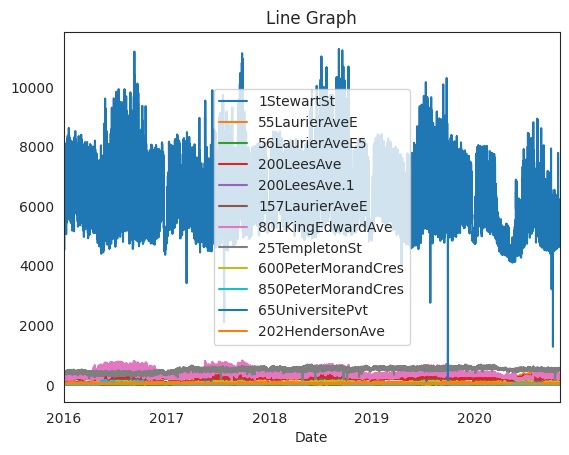

In [ ]:
# prompt: Turn column 2 to 8 to line graph and compare them.
df.plot(x='Date', y=df.columns.values[1:13], title='Line Graph' )
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42312 entries, 0 to 42311
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                42312 non-null  datetime64[ns]
 1   1StewartSt          42312 non-null  float64       
 2   55LaurierAveE       42312 non-null  float64       
 3   56LaurierAveE5      42312 non-null  float64       
 4   200LeesAve          42312 non-null  float64       
 5   200LeesAve.1        42312 non-null  float64       
 6   157LaurierAveE      42312 non-null  float64       
 7   801KingEdwardAve    42312 non-null  float64       
 8   25TempletonSt       42312 non-null  float64       
 9   600PeterMorandCres  42312 non-null  float64       
 10  850PeterMorandCres  42312 non-null  float64       
 11  65UniversitePvt     42312 non-null  float64       
 12  202HendersonAve     42312 non-null  float64       
 13  240FrielSt          42312 non-null  float64   


## **3.2 Adding weather data** <a class="anchor" id="3.2"></a>

[Table of Contents](#0.1)

https://climate-change.canada.ca/climate-data/#/hourly-climate-data

https://meteostat.net/en/station/71628?t=2016-01-01/2021-01-01

                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2016-01-01 00:00:00  -1.7  -3.1  90.0   NaN   NaN  280.0   5.4   NaN  1016.0   
2016-01-01 01:00:00  -1.6  -2.7  92.0   NaN   NaN  260.0   3.6   NaN  1016.1   
2016-01-01 02:00:00  -2.6  -3.1  96.0   NaN   NaN  350.0   1.8   NaN  1015.8   
2016-01-01 03:00:00  -2.2  -3.0  94.0   NaN   NaN  280.0   5.4   NaN  1015.4   
2016-01-01 04:00:00  -2.5  -3.2  95.0   NaN   NaN  310.0   7.6   NaN  1015.1   

                     tsun  coco  
time                             
2016-01-01 00:00:00   NaN   NaN  
2016-01-01 01:00:00   NaN   NaN  
2016-01-01 02:00:00   NaN   NaN  
2016-01-01 03:00:00   NaN   NaN  
2016-01-01 04:00:00   NaN  14.0  


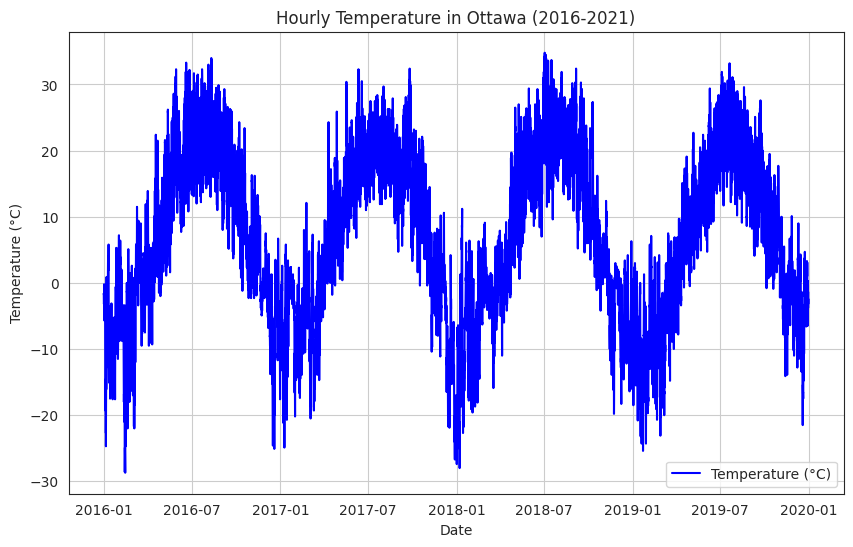

In [ ]:
!pip install meteostat

from datetime import datetime
from meteostat import Point, Hourly
import pandas as pd
import matplotlib.pyplot as plt

# Coordinates of Ottawa
ottawa = Point(45.4215, -75.6972, 70)  # Latitude, Longitude, Elevation in meters

# Define the time period
start = datetime(2016, 1, 1)  # Start date (YYYY, MM, DD)
end = datetime(2019, 12, 31)  # End date (YYYY, MM, DD) Beacause of Covid 2019 and 2020 are excluded  also the data of 2021 is not complete

# Get hourly data for Ottawa
data = Hourly(ottawa, start, end)
data = data.fetch()
# Display the first few rows of the dataframe
print(data.head())

# Plot temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['temp'], label='Temperature (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature in Ottawa (2016-2021)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2016-01-01 00:00:00 to 2019-12-31 00:00:00
Freq: h
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    35004 non-null  float64
 1   dwpt    35004 non-null  float64
 2   rhum    35004 non-null  float64
 3   prcp    3333 non-null   float64
 4   snow    0 non-null      float64
 5   wdir    34997 non-null  float64
 6   wspd    35003 non-null  float64
 7   wpgt    0 non-null      float64
 8   pres    34932 non-null  float64
 9   tsun    0 non-null      float64
 10  coco    17993 non-null  float64
dtypes: float64(11)
memory usage: 3.2 MB


In [ ]:
W_data = data.drop(columns=['prcp', 'snow', 'wdir', 'wspd','wpgt', 'pres', 'tsun','coco'])

In [ ]:
W_data

temp  dwpt  rhum
time                                 
2016-01-01 00:00:00  -1.7  -3.1  90.0
2016-01-01 01:00:00  -1.6  -2.7  92.0
2016-01-01 02:00:00  -2.6  -3.1  96.0
2016-01-01 03:00:00  -2.2  -3.0  94.0
2016-01-01 04:00:00  -2.5  -3.2  95.0
...                   ...   ...   ...
2019-12-30 20:00:00  -2.1  -3.7  89.0
2019-12-30 21:00:00  -1.9  -3.0  92.0
2019-12-30 22:00:00  -1.4  -2.5  92.0
2019-12-30 23:00:00  -1.7  -2.5  94.0
2019-12-31 00:00:00  -1.4  -2.2  94.0

[35041 rows x 3 columns]

In [ ]:
df.head(1)

Date  1StewartSt  55LaurierAveE  56LaurierAveE5  200LeesAve  \
0 2016-01-01      15.185         205.56             0.0     192.852   

   200LeesAve.1  157LaurierAveE  801KingEdwardAve  25TempletonSt  \
0         25.16          66.864             252.0         364.59   

   600PeterMorandCres  850PeterMorandCres  65UniversitePvt  202HendersonAve  \
0               52.32              19.728          4537.44           38.808   

   240FrielSt     261LaurierAveE  290RideauSt          45MannAve  
0     108.468  Installed 2018-05       190.83  Installed 2016-08

In [ ]:
# Convert 'Time' column in df to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Time' as the index for df
df.set_index('Date', inplace=True)

# Ensure W_data index is also datetime if needed
W_data.index = pd.to_datetime(W_data.index)

# Merge the two dataframes
merged_data = df.merge(W_data, left_index=True, right_index=True, how='inner')

In [ ]:
merged_data.head(2)

1StewartSt  55LaurierAveE  56LaurierAveE5  200LeesAve  \
2016-01-01 00:00:00      15.185         205.56             0.0     192.852   
2016-01-01 01:00:00      15.152         209.88             0.0     195.624   

                     200LeesAve.1  157LaurierAveE  801KingEdwardAve  \
2016-01-01 00:00:00         25.16          66.864             252.0   
2016-01-01 01:00:00         25.24          66.528             215.1   

                     25TempletonSt  600PeterMorandCres  850PeterMorandCres  \
2016-01-01 00:00:00         364.59               52.32              19.728   
2016-01-01 01:00:00         364.77               52.11              19.332   

                     65UniversitePvt  202HendersonAve  240FrielSt  \
2016-01-01 00:00:00          4537.44           38.808     108.468   
2016-01-01 01:00:00          4511.52           39.996     113.796   

                        261LaurierAveE  290RideauSt          45MannAve  temp  \
2016-01-01 00:00:00  Installed 2018-05       190.83  Installed 2016-08  -1.7   
2016-01-01 01:00:00                NaN       198.27                NaN  -1.6   

                     dwpt  rhum  
2016-01-01 00:00:00  -3.1  90.0  
2016-01-01 01:00:00  -2.7  92.0

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2016-01-01 00:00:00 to 2019-12-31 00:00:00
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   1StewartSt          35041 non-null  float64
 1   55LaurierAveE       35041 non-null  float64
 2   56LaurierAveE5      35041 non-null  float64
 3   200LeesAve          35041 non-null  float64
 4   200LeesAve.1        35041 non-null  float64
 5   157LaurierAveE      35041 non-null  float64
 6   801KingEdwardAve    35041 non-null  float64
 7   25TempletonSt       35041 non-null  float64
 8   600PeterMorandCres  35041 non-null  float64
 9   850PeterMorandCres  35041 non-null  float64
 10  65UniversitePvt     35041 non-null  float64
 11  202HendersonAve     35041 non-null  float64
 12  240FrielSt          35041 non-null  float64
 13  261LaurierAveE      13882 non-null  object 
 14  290RideauSt         35041 non-null  float64
 15  45MannAve         

In [ ]:
# Filter rows with NaN values in the 'temp' column
nan_rows = merged_data[merged_data['temp'].isna()]
nan_rows.head(10)

1StewartSt  55LaurierAveE  56LaurierAveE5  200LeesAve  \
2016-02-03 16:00:00      42.169         407.64             0.0     367.200   
2016-02-03 17:00:00      38.453         396.00             0.0     364.320   
2016-03-22 23:00:00      19.906         249.12             0.0     228.780   
2016-03-23 00:00:00      25.002         246.00             0.0     227.448   
2016-03-23 01:00:00      17.762         242.52             0.0     228.492   
2016-03-23 02:00:00      23.800         242.28             0.0     231.516   
2016-03-23 03:00:00      17.887         236.40             0.0     225.252   
2016-03-23 04:00:00      24.028         236.28             0.0     272.520   
2016-03-23 05:00:00      26.053         278.64             0.0     343.368   
2016-03-23 06:00:00      34.852         318.48             0.0     365.724   

                     200LeesAve.1  157LaurierAveE  801KingEdwardAve  \
2016-02-03 16:00:00         30.44         102.912            379.98   
2016-02-03 17:00:00         26.40         105.696            386.46   
2016-03-22 23:00:00         25.44          82.368            296.64   
2016-03-23 00:00:00         25.80          72.960            293.67   
2016-03-23 01:00:00         26.40          69.360            248.94   
2016-03-23 02:00:00         26.28          64.800            285.66   
2016-03-23 03:00:00         26.00          63.312            202.23   
2016-03-23 04:00:00         27.52          62.064            255.96   
2016-03-23 05:00:00         29.56          66.624            272.34   
2016-03-23 06:00:00         33.32          70.368            310.86   

                     25TempletonSt  600PeterMorandCres  850PeterMorandCres  \
2016-02-03 16:00:00         480.15               67.86              28.836   
2016-02-03 17:00:00         474.48               69.21              26.424   
2016-03-22 23:00:00         378.72               53.97              24.120   
2016-03-23 00:00:00         370.26               55.11              23.904   
2016-03-23 01:00:00         370.08               56.04              23.796   
2016-03-23 02:00:00         373.95               54.75              23.724   
2016-03-23 03:00:00         373.32               54.60              23.940   
2016-03-23 04:00:00         376.29               54.81              23.652   
2016-03-23 05:00:00         366.03               68.73              23.832   
2016-03-23 06:00:00         399.42               68.13              23.832   

                     65UniversitePvt  202HendersonAve  240FrielSt  \
2016-02-03 16:00:00          7809.12           55.584     165.420   
2016-02-03 17:00:00          7558.56           59.256     172.224   
2016-03-22 23:00:00          5880.96           56.736     160.668   
2016-03-23 00:00:00          5702.40           52.380     148.356   
2016-03-23 01:00:00          5649.12           50.220     143.640   
2016-03-23 02:00:00          5592.96           44.676     135.396   
2016-03-23 03:00:00          5508.00           44.352     140.760   
2016-03-23 04:00:00          5699.52           44.352     140.400   
2016-03-23 05:00:00          5891.04           44.496     133.920   
2016-03-23 06:00:00          6492.96           48.456     137.628   

                    261LaurierAveE  290RideauSt 45MannAve  temp  dwpt  rhum  
2016-02-03 16:00:00            NaN       236.64       NaN   NaN   NaN   NaN  
2016-02-03 17:00:00            NaN       234.30       NaN   NaN   NaN   NaN  
2016-03-22 23:00:00            NaN       238.95       NaN   NaN   NaN   NaN  
2016-03-23 00:00:00            NaN       239.22       NaN   NaN   NaN   NaN  
2016-03-23 01:00:00            NaN       233.13       NaN   NaN   NaN   NaN  
2016-03-23 02:00:00            NaN       229.65       NaN   NaN   NaN   NaN  
2016-03-23 03:00:00            NaN       231.72       NaN   NaN   NaN   NaN  
2016-03-23 04:00:00            NaN       234.36       NaN   NaN   NaN   NaN  
2016-03-23 05:00:00            NaN       229.80       NaN  

In [ ]:
filtered_row = W_data.loc['2018-02-21 19:00:00']
filtered_row

temp   NaN
dwpt   NaN
rhum   NaN
Name: 2018-02-21 19:00:00, dtype: float64

In [ ]:
# Forward fill to impute missing values
data_imputed = merged_data.fillna(method='ffill')

In [ ]:
data_imputed

1StewartSt  55LaurierAveE  56LaurierAveE5  200LeesAve  \
2016-01-01 00:00:00      15.185         205.56             0.0     192.852   
2016-01-01 01:00:00      15.152         209.88             0.0     195.624   
2016-01-01 02:00:00      15.070         218.16             0.0     194.256   
2016-01-01 03:00:00      15.149         217.80             0.0     196.992   
2016-01-01 04:00:00      15.125         214.08             0.0     198.144   
...                         ...            ...             ...         ...   
2019-12-30 20:00:00      18.137         222.48             0.0     199.224   
2019-12-30 21:00:00      18.200         221.28             0.0     201.420   
2019-12-30 22:00:00      17.334         198.60             0.0     195.660   
2019-12-30 23:00:00      17.138         190.20             0.0     195.984   
2019-12-31 00:00:00      17.397         191.16             0.0     199.224   

                     200LeesAve.1  157LaurierAveE  801KingEdwardAve  \
2016-01-01 00:00:00         25.16          66.864            252.00   
2016-01-01 01:00:00         25.24          66.528            215.10   
2016-01-01 02:00:00         24.64          64.800            238.23   
2016-01-01 03:00:00         25.44          64.848            192.60   
2016-01-01 04:00:00         24.88          64.320            230.49   
...                           ...             ...               ...   
2019-12-30 20:00:00         38.44          78.528            393.66   
2019-12-30 21:00:00         38.04          73.056            402.75   
2019-12-30 22:00:00         38.36          73.152            424.08   
2019-12-30 23:00:00         37.60          70.608            411.12   
2019-12-31 00:00:00         38.04          68.592            379.71   

                     25TempletonSt  600PeterMorandCres  850PeterMorandCres  \
2016-01-01 00:00:00         364.59               52.32              19.728   
2016-01-01 01:00:00         364.77               52.11              19.332   
2016-01-01 02:00:00         360.90               52.29              19.800   
2016-01-01 03:00:00         364.23               52.29              19.836   
2016-01-01 04:00:00         366.57               52.62              20.052   
...                            ...                 ...                 ...   
2019-12-30 20:00:00         574.83               53.85              25.452   
2019-12-30 21:00:00         568.80               53.37              25.632   
2019-12-30 22:00:00         539.10               53.70              25.488   
2019-12-30 23:00:00         545.58               54.36              25.344   
2019-12-31 00:00:00         541.17               54.33              26.496   

                     65UniversitePvt  202HendersonAve  240FrielSt  \
2016-01-01 00:00:00       4537.44000           38.808     108.468   
2016-01-01 01:00:00       4511.52000           39.996     113.796   
2016-01-01 02:00:00       4505.76000           39.996     114.120   
2016-01-01 03:00:00       4512.96000           40.284     111.168   
2016-01-01 04:00:00       4583.52000           39.564     108.180   
...                              ...              ...         ...   
2019-12-30 20:00:00       5054.07704           44.532     127.440   
2019-12-30 21:00:00       5006.51115           44.496     123.732   
2019-12-30 22:00:00       4983.94740           44.424     119.736   
2019-12-30 23:00:00       4964.68100           44.244     120.888   
2019-12-31 00:00:00       4910.86065           43.632     127.332   

                        261LaurierAveE  290RideauSt          45MannAve  temp  \
2016-01-01 00:00:00  Installed 2018-05      190.830  Installed 2016-08  -1.7   
2016-01-01 01:00:00  Installed 2018-05      198.270  Installed 2016-08  -1.6   
2016-01-01 02:00:00  Installed 2018-05      192.930  Installed 2016-08  -2.6   
2016-01-01 03:00:00  Installed 2018-05      189.960  Installed 2016-08  -2.2   
2016-01-01 04:00:00  Installed 2018-05      191.070  Installed 20

## **3.3 Extracting hour, day of week and month from Dat with a fromat of yyyy-mm-dd-hh-mm-ss** <a class="anchor" id="3.3"></a>

[Table of Contents](#0.1)

In [ ]:
# Reset the index to make the datetime index a regular column
data_imputed = data_imputed.reset_index()

In [ ]:
# Rename a column named 'old_name' to 'new_name'
data_imputed = data_imputed.rename(columns={'index': 'Date'})

In [ ]:
# Convert the 'time' column to datetime format (if not already in that format)
data_imputed['Date'] = pd.to_datetime(data_imputed['Date'])

In [ ]:
# Format the 'Time' column as a string in the desired format

data_imputed['Date'] = data_imputed['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
data_imputed

Date  1StewartSt  55LaurierAveE  56LaurierAveE5  \
0      2016-01-01 00:00:00      15.185         205.56             0.0   
1      2016-01-01 01:00:00      15.152         209.88             0.0   
2      2016-01-01 02:00:00      15.070         218.16             0.0   
3      2016-01-01 03:00:00      15.149         217.80             0.0   
4      2016-01-01 04:00:00      15.125         214.08             0.0   
...                    ...         ...            ...             ...   
35036  2019-12-30 20:00:00      18.137         222.48             0.0   
35037  2019-12-30 21:00:00      18.200         221.28             0.0   
35038  2019-12-30 22:00:00      17.334         198.60             0.0   
35039  2019-12-30 23:00:00      17.138         190.20             0.0   
35040  2019-12-31 00:00:00      17.397         191.16             0.0   

       200LeesAve  200LeesAve.1  157LaurierAveE  801KingEdwardAve  \
0         192.852         25.16          66.864            252.00   
1         195.624         25.24          66.528            215.10   
2         194.256         24.64          64.800            238.23   
3         196.992         25.44          64.848            192.60   
4         198.144         24.88          64.320            230.49   
...           ...           ...             ...               ...   
35036     199.224         38.44          78.528            393.66   
35037     201.420         38.04          73.056            402.75   
35038     195.660         38.36          73.152            424.08   
35039     195.984         37.60          70.608            411.12   
35040     199.224         38.04          68.592            379.71   

       25TempletonSt  600PeterMorandCres  850PeterMorandCres  65UniversitePvt  \
0             364.59               52.32              19.728       4537.44000   
1             364.77               52.11              19.332       4511.52000   
2             360.90               52.29              19.800       4505.76000   
3             364.23               52.29              19.836       4512.96000   
4             366.57               52.62              20.052       4583.52000   
...              ...                 ...                 ...              ...   
35036         574.83               53.85              25.452       5054.07704   
35037         568.80               53.37              25.632       5006.51115   
35038         539.10               53.70              25.488       4983.94740   
35039         545.58               54.36              25.344       4964.68100   
35040         541.17               54.33              26.496       4910.86065   

       202HendersonAve  240FrielSt     261LaurierAveE  290RideauSt  \
0               38.808     108.468  Installed 2018-05      190.830   
1               39.996     113.796  Installed 2018-05      198.270   
2               39.996     114.120  Installed 2018-05      192.930   
3               40.284     111.168  Installed 2018-05      189.960   
4               39.564     108.180  Installed 2018-05      191.070   
...                ...         ...                ...          ...   
35036           44.532     127.440            194.616      290.472   
35037           44.496     123.732            192.744      291.048   
35038           44.424     119.736            189.144      290.178   
35039           44.244     120.888            175.032      281.118   
35040           43.632     127.332            152.424      270.942   

               45MannAve  temp  dwpt  rhum  
0      Installed 2016-08  -1.7  -3.1  90.0  
1      Installed 2016-08  -1.6  -2.7  92.0  
2      Installed 2016-08  -2.6  -3.1  96.0  
3      Installed 2016-08  -2.2  -3.0  94.0  
4      Installed 2016-08  -2.5  -3.2  95.0  
...                  ...   ...   ...   ...  
35036              77.52  -2.1  -3.7  89.0  
35037             76.704  -1.9  -3.0  92.0  
35038              76.08  -1.4  -2.5  92.0  
35039             74.208  -1.7  -2.5  94.0  
35040  

In [ ]:
#The dayofweek attribute in pandas follows the ISO weekday convention:
#Monday = 0
#Sunday = 6
# Define the make_time_features function as before
def make_time_features(series):
    # Convert series to datetimes
    times = series.apply(lambda x: pd.to_datetime(x))
    datetimes = pd.DatetimeIndex(times)

    hours = datetimes.hour.values
    day = datetimes.dayofweek.values
    months = datetimes.month.values

    hour = pd.Series(hours, name='hours')
    dayofw = pd.Series(day, name='dayofw')
    month = pd.Series(months, name='months')

    return hour, dayofw, month

# Use the 'time' column after resetting the index
hour, day, month = make_time_features(data_imputed['Date'])

# Add these new features back to your DataFrame if needed
data_imputed['hour'] = hour
data_imputed['dayofw'] = day
data_imputed['month'] = month

# Display the updated DataFrame
print(data_imputed.head())


                  Date  1StewartSt  55LaurierAveE  56LaurierAveE5  200LeesAve  \
0  2016-01-01 00:00:00      15.185         205.56             0.0     192.852   
1  2016-01-01 01:00:00      15.152         209.88             0.0     195.624   
2  2016-01-01 02:00:00      15.070         218.16             0.0     194.256   
3  2016-01-01 03:00:00      15.149         217.80             0.0     196.992   
4  2016-01-01 04:00:00      15.125         214.08             0.0     198.144   

   200LeesAve.1  157LaurierAveE  801KingEdwardAve  25TempletonSt  \
0         25.16          66.864            252.00         364.59   
1         25.24          66.528            215.10         364.77   
2         24.64          64.800            238.23         360.90   
3         25.44          64.848            192.60         364.23   
4         24.88          64.320            230.49         366.57   

   600PeterMorandCres  ...  240FrielSt     261LaurierAveE  290RideauSt  \
0               52.32  ...    

In [ ]:
data_imputed['Date'] = pd.to_datetime(data_imputed['Date'] , utc = True)

In [ ]:
#df_n = data_imputed.set_index('Date')
df_n = data_imputed

In [ ]:
df_n

Date  1StewartSt  55LaurierAveE  56LaurierAveE5  \
0     2016-01-01 00:00:00+00:00      15.185         205.56             0.0   
1     2016-01-01 01:00:00+00:00      15.152         209.88             0.0   
2     2016-01-01 02:00:00+00:00      15.070         218.16             0.0   
3     2016-01-01 03:00:00+00:00      15.149         217.80             0.0   
4     2016-01-01 04:00:00+00:00      15.125         214.08             0.0   
...                         ...         ...            ...             ...   
35036 2019-12-30 20:00:00+00:00      18.137         222.48             0.0   
35037 2019-12-30 21:00:00+00:00      18.200         221.28             0.0   
35038 2019-12-30 22:00:00+00:00      17.334         198.60             0.0   
35039 2019-12-30 23:00:00+00:00      17.138         190.20             0.0   
35040 2019-12-31 00:00:00+00:00      17.397         191.16             0.0   

       200LeesAve  200LeesAve.1  157LaurierAveE  801KingEdwardAve  \
0         192.852         25.16          66.864            252.00   
1         195.624         25.24          66.528            215.10   
2         194.256         24.64          64.800            238.23   
3         196.992         25.44          64.848            192.60   
4         198.144         24.88          64.320            230.49   
...           ...           ...             ...               ...   
35036     199.224         38.44          78.528            393.66   
35037     201.420         38.04          73.056            402.75   
35038     195.660         38.36          73.152            424.08   
35039     195.984         37.60          70.608            411.12   
35040     199.224         38.04          68.592            379.71   

       25TempletonSt  600PeterMorandCres  ...  240FrielSt     261LaurierAveE  \
0             364.59               52.32  ...     108.468  Installed 2018-05   
1             364.77               52.11  ...     113.796  Installed 2018-05   
2             360.90               52.29  ...     114.120  Installed 2018-05   
3             364.23               52.29  ...     111.168  Installed 2018-05   
4             366.57               52.62  ...     108.180  Installed 2018-05   
...              ...                 ...  ...         ...                ...   
35036         574.83               53.85  ...     127.440            194.616   
35037         568.80               53.37  ...     123.732            192.744   
35038         539.10               53.70  ...     119.736            189.144   
35039         545.58               54.36  ...     120.888            175.032   
35040         541.17               54.33  ...     127.332            152.424   

       290RideauSt          45MannAve temp  dwpt  rhum  hour  dayofw  month  
0          190.830  Installed 2016-08 -1.7  -3.1  90.0     0       4      1  
1          198.270  Installed 2016-08 -1.6  -2.7  92.0     1       4      1  
2          192.930  Installed 2016-08 -2.6  -3.1  96.0     2       4      1  
3          189.960  Installed 2016-08 -2.2  -3.0  94.0     3       4      1  
4          191.070  Installed 2016-08 -2.5  -3.2  95.0     4       4      1  
...            ...                ...  ...   ...   ...   ...     ...    ...  
35036      290.472              77.52 -2.1  -3.7  89.0    20       0     12  
35037      291.048             76.704 -1.9  -3.0  92.0    21       0     12  
35038      290.178              76.08 -1.4  -2.5  92.0    22       0     12  
35039      281.118             74.208 -1.7  -2.5  94.0    23       0     12  
35040      270.942             69.552 -1.4  -2.2  94.0     0       1     12  

[35041 rows x 23 columns]

## Exporting the data

In [ ]:
import os
# Define the directory path where the file should be saved
directory_path = '/content/saj/MyDrive/Kavgic/Peak load forecasting ( 3rd paper)/uOttawa energy and weather'

# Ensure the directory exists; create it if it doesn't
os.makedirs(directory_path, exist_ok=True)

# Define the full file path with the file name
file_path = os.path.join(directory_path, 'elecandweatherdatamerged.csv')

# Save the DataFrame as a CSV file
df_n.to_csv(file_path, index=False)

print(f"File saved to: {file_path}")

File saved to: /content/saj/MyDrive/Kavgic/Peak load forecasting ( 3rd paper)/uOttawa energy and weather/elecandweatherdatamerged.csv


# Data analysis

## Reading the merged data

In [ ]:
import pandas as pd
# mounting google drive and uploading the data
drive.mount('/content/saj')
# Assuming 'load_data' is a function to load the data (not defined in your code snippet)
def load_data():
  # This is how you read a CSV into a DataFrame
  df = pd.read_csv('/content/saj/MyDrive/Kavgic/Peak load forecasting ( 3rd paper)/uOttawa energy and weather/elecandweatherdatamerged.csv')
  return df

df1 = load_data()  # Call load_data to load the CSV into 'df'

Drive already mounted at /content/saj; to attempt to forcibly remount, call drive.mount("/content/saj", force_remount=True).


In [ ]:
df1

Date  1StewartSt  55LaurierAveE  56LaurierAveE5  \
0      2016-01-01 00:00:00+00:00      15.185         205.56             0.0   
1      2016-01-01 01:00:00+00:00      15.152         209.88             0.0   
2      2016-01-01 02:00:00+00:00      15.070         218.16             0.0   
3      2016-01-01 03:00:00+00:00      15.149         217.80             0.0   
4      2016-01-01 04:00:00+00:00      15.125         214.08             0.0   
...                          ...         ...            ...             ...   
35036  2019-12-30 20:00:00+00:00      18.137         222.48             0.0   
35037  2019-12-30 21:00:00+00:00      18.200         221.28             0.0   
35038  2019-12-30 22:00:00+00:00      17.334         198.60             0.0   
35039  2019-12-30 23:00:00+00:00      17.138         190.20             0.0   
35040  2019-12-31 00:00:00+00:00      17.397         191.16             0.0   

       200LeesAve  200LeesAve.1  157LaurierAveE  801KingEdwardAve  \
0         192.852         25.16          66.864            252.00   
1         195.624         25.24          66.528            215.10   
2         194.256         24.64          64.800            238.23   
3         196.992         25.44          64.848            192.60   
4         198.144         24.88          64.320            230.49   
...           ...           ...             ...               ...   
35036     199.224         38.44          78.528            393.66   
35037     201.420         38.04          73.056            402.75   
35038     195.660         38.36          73.152            424.08   
35039     195.984         37.60          70.608            411.12   
35040     199.224         38.04          68.592            379.71   

       25TempletonSt  600PeterMorandCres  ...  240FrielSt     261LaurierAveE  \
0             364.59               52.32  ...     108.468  Installed 2018-05   
1             364.77               52.11  ...     113.796  Installed 2018-05   
2             360.90               52.29  ...     114.120  Installed 2018-05   
3             364.23               52.29  ...     111.168  Installed 2018-05   
4             366.57               52.62  ...     108.180  Installed 2018-05   
...              ...                 ...  ...         ...                ...   
35036         574.83               53.85  ...     127.440            194.616   
35037         568.80               53.37  ...     123.732            192.744   
35038         539.10               53.70  ...     119.736            189.144   
35039         545.58               54.36  ...     120.888            175.032   
35040         541.17               54.33  ...     127.332            152.424   

       290RideauSt          45MannAve temp  dwpt  rhum  hour  dayofw  month  
0          190.830  Installed 2016-08 -1.7  -3.1  90.0     0       4      1  
1          198.270  Installed 2016-08 -1.6  -2.7  92.0     1       4      1  
2          192.930  Installed 2016-08 -2.6  -3.1  96.0     2       4      1  
3          189.960  Installed 2016-08 -2.2  -3.0  94.0     3       4      1  
4          191.070  Installed 2016-08 -2.5  -3.2  95.0     4       4      1  
...            ...                ...  ...   ...   ...   ...     ...    ...  
35036      290.472              77.52 -2.1  -3.7  89.0    20       0     12  
35037      291.048             76.704 -1.9  -3.0  92.0    21       0     12  
35038      290.178              76.08 -1.4  -2.5  92.0    22       0     12  
35039      281.118             74.208 -1.7  -2.5  94.0    23       0     12  
35040      270.942             69.552 -1.4  -2.2  94.0     0       1     12  

[35041 rows x 23 columns]

In [ ]:
df2 = df1.copy()

In [ ]:
df2.columns

Index(['Date', '1StewartSt', '55LaurierAveE', '56LaurierAveE5', '200LeesAve',
       '200LeesAve.1', '157LaurierAveE', '801KingEdwardAve', '25TempletonSt',
       '600PeterMorandCres', '850PeterMorandCres', '65UniversitePvt',
       '202HendersonAve', '240FrielSt', '261LaurierAveE', '290RideauSt',
       '45MannAve', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month'],
      dtype='object')

In [ ]:


# Assuming 'df' is your existing DataFrame
# Convert relevant columns (2 to 12) to numeric values, forcing errors to NaN
df.iloc[:, 1:12] = df.iloc[:, 1:12].apply(pd.to_numeric, errors='coerce')

# Sum the values from columns 2 to 12 for each row
df['Total'] = df.iloc[:, 1:12].sum(axis=1)

df.describe()


1StewartSt  55LaurierAveE  56LaurierAveE5    200LeesAve  \
count  42312.000000   42312.000000    42312.000000  42312.000000   
mean      33.928748     289.072203        0.102184    262.686286   
std       15.468264      78.768130        4.626803     64.848356   
min        0.000000       0.000000        0.000000      0.000000   
25%       22.220500     225.600000        0.000000    217.116000   
50%       32.491000     272.040000        0.000000    249.228000   
75%       42.925250     346.920000        0.000000    308.196000   
max       96.500000     670.080000      294.930000    546.228000   

       200LeesAve.1  157LaurierAveE  801KingEdwardAve  25TempletonSt  \
count  42312.000000    42312.000000      42312.000000   42312.000000   
mean      36.324559       99.897859        393.223001     501.012011   
std        7.960264       23.405318        110.197777      77.500587   
min        0.000000        0.000000          0.000000       0.000000   
25%       31.400000       82.560000        314.550000     459.270000   
50%       34.680000       95.472000        375.120000     515.790000   
75%       39.320000      112.800000        458.370000     555.930000   
max       85.440000      209.808000        819.000000     685.080000   

       600PeterMorandCres  850PeterMorandCres  65UniversitePvt  \
count        42312.000000        42312.000000     42312.000000   
mean            66.684894           30.436697      6372.734245   
std             23.027056           15.588769      1099.230711   
min              0.000000            0.000000         0.000000   
25%             59.250000           22.212000      5519.825797   
50%             66.540000           27.144000      6235.200000   
75%             77.970000           35.424000      7154.802558   
max            165.930000          155.952000     11270.205600   

       202HendersonAve    240FrielSt    290RideauSt         Total  
count     42312.000000  42312.000000   42312.000000  42312.000000  
mean         50.542419    134.509771    1805.873900   8102.716361  
std          10.656624     32.062940   16447.309556   1330.134869  
min           0.000000      0.000000       0.000000   1595.982000  
25%          41.688000    112.248000     114.390000   7043.447235  
50%          48.096000    133.812000     155.250000   7947.764000  
75%          58.716000    155.772000     259.080000   9071.675097  
max          89.568000    255.996000  222930.000000  13992.885600

## **3.1 the biggest consumers ?** <a class="anchor" id="3.1"></a>

[Table of Contents](#0.1)

In [ ]:
# prompt: Turn column 2 to 8 to line graph and compare them.
df1.plot(x='Date', y=df1.columns.values[1:13], title='Line Graph' )
plt.show()

KeyError: "['Date'] not in index"

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   1StewartSt               35041 non-null  float64       
 1   temp                     35041 non-null  float64       
 2   dwpt                     35041 non-null  float64       
 3   rhum                     35041 non-null  float64       
 4   hour                     35041 non-null  int64         
 5   dayofw                   35041 non-null  int64         
 6   month                    35041 non-null  int64         
 7   is_weekday               35041 non-null  int64         
 8   elec_rolling_mean_24     35018 non-null  float64       
 9   elec_rolling_std_24      35018 non-null  float64       
 10  Date                     35041 non-null  datetime64[ns]
 11  day                      35041 non-null  object        
 12  elec_rolling_mean_daily  35041 n

In [ ]:
df_n = df1.copy()

In [ ]:
# dayofw values 0-4 (Monday to Friday) are weekdays, and 5-6 (Saturday and Sunday) are weekends
df_n['is_weekday'] = df_n['dayofw'].apply(lambda x: 1 if x < 5 else 0)

df_n.head(3)

1StewartSt  temp  dwpt  rhum  hour  dayofw  month  is_weekday  \
0      15.185  -1.7  -3.1  90.0     0       4      1           1   
1      15.152  -1.6  -2.7  92.0     1       4      1           1   
2      15.070  -2.6  -3.1  96.0     2       4      1           1   

   elec_rolling_mean_24  elec_rolling_std_24                Date         day  \
0                   NaN                  NaN 2016-01-01 00:00:00  2016-01-01   
1                   NaN                  NaN 2016-01-01 01:00:00  2016-01-01   
2                   NaN                  NaN 2016-01-01 02:00:00  2016-01-01   

   elec_rolling_mean_daily  elec_rolling_std_daily  skewness_1StewartSt  \
0                15.185000                     NaN             0.459107   
1                15.168500                0.023335             0.459107   
2                15.135667                0.059214             0.459107   

   kurtosis_1StewartSt  PAR_1StewartSt  CV_1StewartSt  relative_delta  \
0             -0.93557        1.040686       0.022799       -0.020952   
1             -0.93557        1.040686       0.022799       -0.023079   
2             -0.93557        1.040686       0.022799       -0.028366   

   shape_factor  
0      0.940772  
1      0.938727  
2      0.933647

In [ ]:
# Selecting multiple columns by providing a list of column names
df1 = df_n[['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df2 = df_n[['55LaurierAveE', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df3 = df_n[['56LaurierAveE5', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df4 = df_n[['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df5 = df_n[['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df6 = df_n[['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df7 = df_n[['25TempletonSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df8 = df_n[['600PeterMorandCres', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df9 = df_n[['850PeterMorandCres', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df10 = df_n[['65UniversitePvt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df11 = df_n[['202HendersonAve', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df12 = df_n[['240FrielSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
df13 = df_n[['290RideauSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
#df14 = df_n[['261LaurierAveE', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month']]   metering started from 2018
#df15 = df_n[['45MannAve', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month']]         metering started from 2018

KeyError: "['55LaurierAveE'] not in index"

In [ ]:
List_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13]

In [ ]:
df1[['temp', '1StewartSt']].plot(title='Temperature and Energy', figsize=(10, 6))
# Display the plot
plt.show()

In [ ]:
df1[['dwpt', '1StewartSt']].plot(title='Dew point Temperature and Energy', figsize=(10, 6))
# Display the plot
plt.show()


In [ ]:
df1[['rhum', '1StewartSt']].plot(title='relative humididty and energy', figsize=(10, 6))
# Display the plot
plt.show()

# feature selection

## feature importance

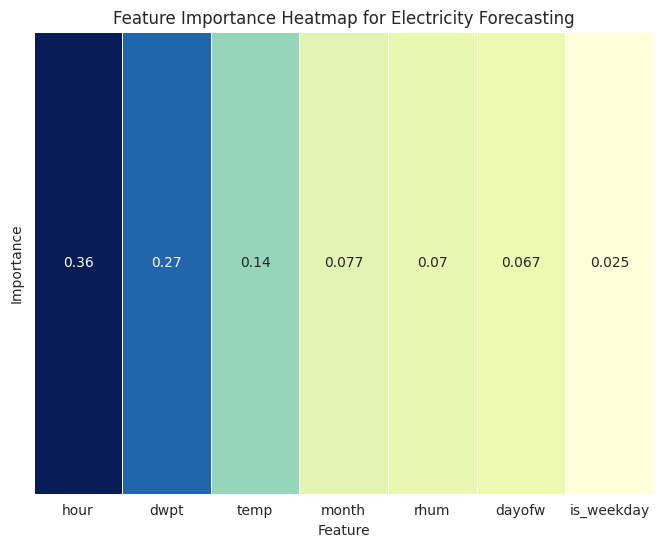

In [ ]:
# Define features and target
X = df_n[['temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday']]
y = df_n['1StewartSt']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='YlGnBu', cbar=False, linewidths=0.5)
plt.title('Feature Importance Heatmap for Electricity Forecasting')
plt.show()

In [ ]:
df1['elec_rolling_mean_24'] = df1['1StewartSt'].rolling(window=24).mean()
df1['elec_rolling_std_24'] = df1['1StewartSt'].rolling(window=24).std()

<ipython-input-28-5f7d675f420c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elec_rolling_mean_24'] = df1['1StewartSt'].rolling(window=24).mean()
<ipython-input-28-5f7d675f420c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elec_rolling_std_24'] = df1['1StewartSt'].rolling(window=24).std()


In [ ]:
df1 ['Date'] = df_n['Date']

<ipython-input-29-8793ae3cb174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 ['Date'] = df_n['Date']


In [ ]:
df1

1StewartSt  temp  dwpt  rhum  hour  dayofw  month  is_weekday  \
0          15.185  -1.7  -3.1  90.0     0       4      1           1   
1          15.152  -1.6  -2.7  92.0     1       4      1           1   
2          15.070  -2.6  -3.1  96.0     2       4      1           1   
3          15.149  -2.2  -3.0  94.0     3       4      1           1   
4          15.125  -2.5  -3.2  95.0     4       4      1           1   
...           ...   ...   ...   ...   ...     ...    ...         ...   
35036      18.137  -2.1  -3.7  89.0    20       0     12           1   
35037      18.200  -1.9  -3.0  92.0    21       0     12           1   
35038      17.334  -1.4  -2.5  92.0    22       0     12           1   
35039      17.138  -1.7  -2.5  94.0    23       0     12           1   
35040      17.397  -1.4  -2.2  94.0     0       1     12           1   

       elec_rolling_mean_24  elec_rolling_std_24                       Date  
0                       NaN                  NaN  2016-01-01 00:00:00+00:00  
1                       NaN                  NaN  2016-01-01 01:00:00+00:00  
2                       NaN                  NaN  2016-01-01 02:00:00+00:00  
3                       NaN                  NaN  2016-01-01 03:00:00+00:00  
4                       NaN                  NaN  2016-01-01 04:00:00+00:00  
...                     ...                  ...                        ...  
35036             18.092542             0.803956  2019-12-30 20:00:00+00:00  
35037             18.101708             0.803871  2019-12-30 21:00:00+00:00  
35038             18.121375             0.777566  2019-12-30 22:00:00+00:00  
35039             18.137208             0.752048  2019-12-30 23:00:00+00:00  
35040             18.135542             0.753709  2019-12-31 00:00:00+00:00  

[35041 rows x 11 columns]

In [ ]:
# Create a dummy datetime index
df1['Date'] = pd.date_range(start="2016-01-01 00:00:00", periods=len(df1), freq="H")

# Create a 'day' column to group by day
df1['day'] = df1['Date'].dt.date

# Grouping by day to calculate daily features
daily_group = df1.groupby('day')

# Add mean and std
df1['elec_rolling_mean_daily'] = df1.groupby('day')['1StewartSt'].transform(lambda x: x.expanding().mean())

df1['elec_rolling_std_daily'] = df1.groupby('day')['1StewartSt'].transform(lambda x: x.expanding().std())

# Updated Skewness
df1['skewness_1StewartSt'] = daily_group['1StewartSt'].transform(lambda x: x.skew())

# Updated Kurtosis
# Measures the "tailedness" of the data distribution.
#High kurtosis indicates more frequent extreme values (potential peaks).
df1['kurtosis_1StewartSt'] = daily_group['1StewartSt'].transform(lambda x: x.kurt())

# Updated Peak-to-Average Ratio (PAR)
df1['PAR_1StewartSt'] = daily_group['1StewartSt'].transform(lambda x: x.max() / x.mean())

# Updated Coefficient of Variation (CV)
df1['CV_1StewartSt'] = daily_group['1StewartSt'].transform(lambda x: x.std() / x.mean())

# Updated Relative Difference
df1['relative_delta'] = daily_group['1StewartSt'].transform(
    lambda x: (x - x.mean()) / x.mean()
)

<ipython-input-31-de9d89fb6fae>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1['Date'] = pd.date_range(start="2016-01-01 00:00:00", periods=len(df1), freq="H")
<ipython-input-31-de9d89fb6fae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.date_range(start="2016-01-01 00:00:00", periods=len(df1), freq="H")
<ipython-input-31-de9d89fb6fae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['Date'].dt.date
<ipython-inp

In [ ]:
df1

1StewartSt  temp  dwpt  rhum  hour  dayofw  month  is_weekday  \
0          15.185  -1.7  -3.1  90.0     0       4      1           1   
1          15.152  -1.6  -2.7  92.0     1       4      1           1   
2          15.070  -2.6  -3.1  96.0     2       4      1           1   
3          15.149  -2.2  -3.0  94.0     3       4      1           1   
4          15.125  -2.5  -3.2  95.0     4       4      1           1   
...           ...   ...   ...   ...   ...     ...    ...         ...   
35036      18.137  -2.1  -3.7  89.0    20       0     12           1   
35037      18.200  -1.9  -3.0  92.0    21       0     12           1   
35038      17.334  -1.4  -2.5  92.0    22       0     12           1   
35039      17.138  -1.7  -2.5  94.0    23       0     12           1   
35040      17.397  -1.4  -2.2  94.0     0       1     12           1   

       elec_rolling_mean_24  elec_rolling_std_24                Date  \
0                       NaN                  NaN 2016-01-01 00:00:00   
1                       NaN                  NaN 2016-01-01 01:00:00   
2                       NaN                  NaN 2016-01-01 02:00:00   
3                       NaN                  NaN 2016-01-01 03:00:00   
4                       NaN                  NaN 2016-01-01 04:00:00   
...                     ...                  ...                 ...   
35036             18.092542             0.803956 2019-12-30 20:00:00   
35037             18.101708             0.803871 2019-12-30 21:00:00   
35038             18.121375             0.777566 2019-12-30 22:00:00   
35039             18.137208             0.752048 2019-12-30 23:00:00   
35040             18.135542             0.753709 2019-12-31 00:00:00   

              day  elec_rolling_mean_daily  elec_rolling_std_daily  \
0      2016-01-01                15.185000                     NaN   
1      2016-01-01                15.168500                0.023335   
2      2016-01-01                15.135667                0.059214   
3      2016-01-01                15.139000                0.048806   
4      2016-01-01                15.136200                0.042728   
...           ...                      ...                     ...   
35036  2019-12-30                18.220048                0.748887   
35037  2019-12-30                18.219136                0.730851   
35038  2019-12-30                18.180652                0.737515   
35039  2019-12-30                18.137208                0.752048   
35040  2019-12-31                17.397000                     NaN   

       skewness_1StewartSt  kurtosis_1StewartSt  PAR_1StewartSt  \
0                 0.459107            -0.935570        1.040686   
1                 0.459107            -0.935570        1.040686   
2                 0.459107            -0.935570        1.040686   
3                 0.459107            -0.935570        1.040686   
4                 0.459107            -0.935570        1.040686   
...                    ...                  ...             ...   
35036            -0.288851            -1.076211        1.074311   
35037            -0.288851            -1.076211        1.074311   
35038            -0.288851            -1.076211        1.074311   
35039            -0.288851            -1.076211        1.074311   
35040                  NaN                  NaN        1.000000   

       CV_1StewartSt  relative_delta  
0           0.022799       -0.020952  
1           0.022799       -0.023079  
2           0.022799       -0.028366  
3           0.022799       -0.023273  
4           0.022799       -0.024820  
...              ...             ...  
35036       0.041464       -0.000011  
35037       0.041464        0.003462  
35038       0.041464       -0.044285  
35039       0.041464       -0.055092  
35040            NaN        0.000000  

[35041 rows x 19 columns]

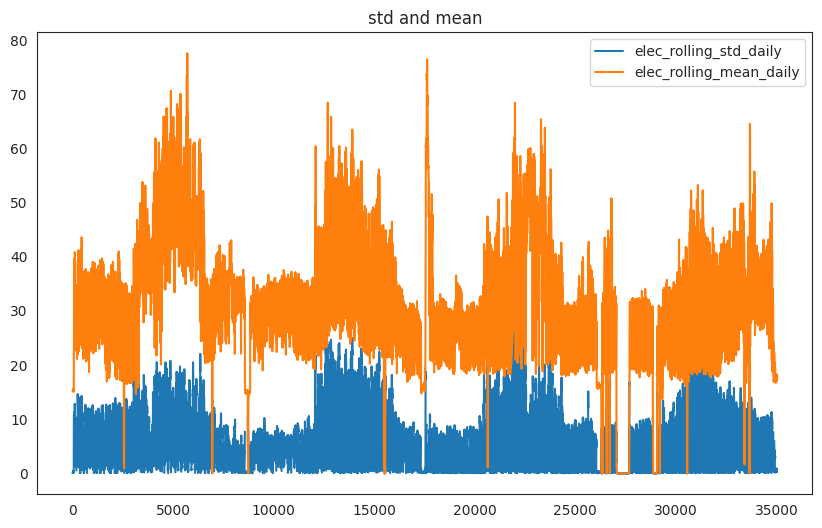

In [ ]:
df1[['elec_rolling_std_daily', 'elec_rolling_mean_daily']].plot(title='std and mean', figsize=(10, 6))
# Display the plot
plt.show()

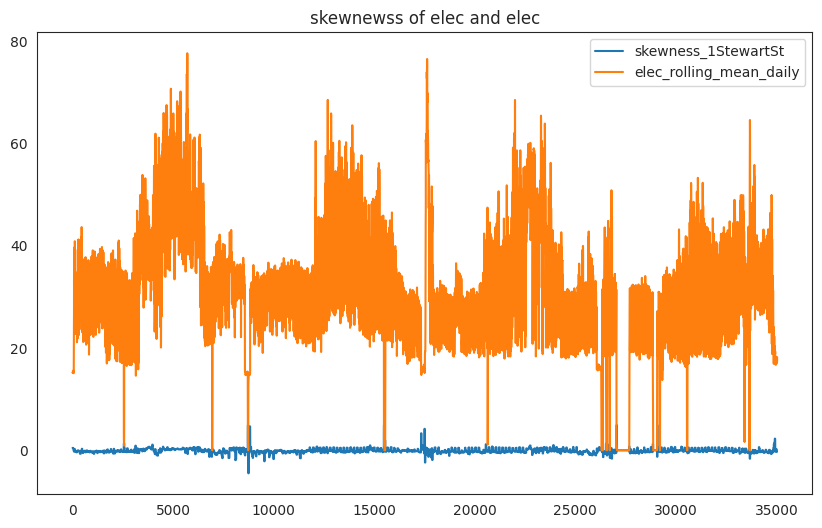

In [ ]:
df1[['skewness_1StewartSt', 'elec_rolling_mean_daily']].plot(title='skewnewss of elec and elec', figsize=(10, 6))
# Display the plot
plt.show()

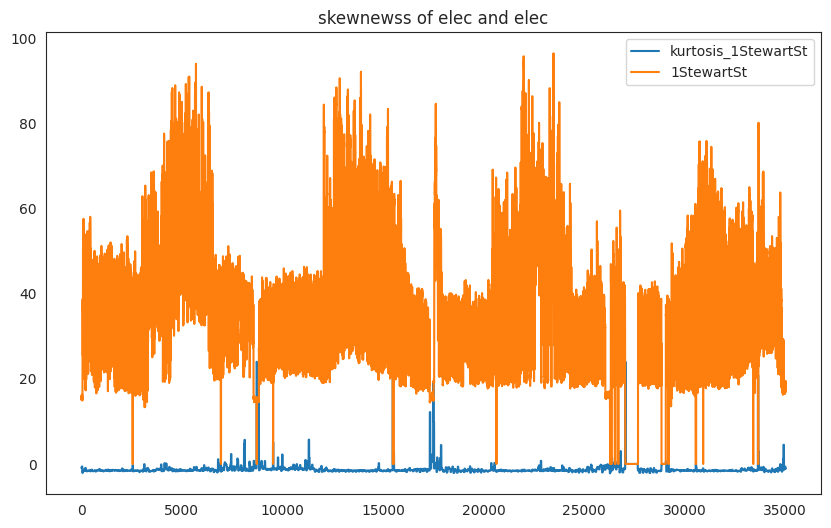

In [ ]:
df1[['kurtosis_1StewartSt', '1StewartSt']].plot(title='skewnewss of elec and elec', figsize=(10, 6))
# Display the plot
plt.show()

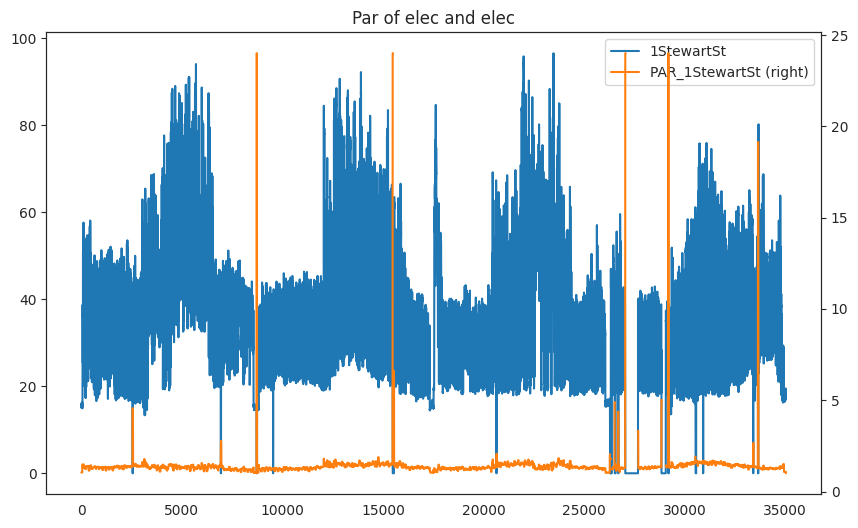

In [ ]:
#Peak-to-Average Ratio (PAR)
# The ratio of the maximum value to the average value within a window.
#Highlights regions where values are significantly higher than average, which often corresponds to peaks

import matplotlib.pyplot as plt

# Plot with secondary axis
ax = df1[['1StewartSt']].plot(title='Par of elec and elec', figsize=(10, 6), label='1StewartSt', legend=True)
df1[['PAR_1StewartSt']].plot(ax=ax, secondary_y=True, label='PAR_1StewartSt', legend=True)

# Show the plot
plt.show()

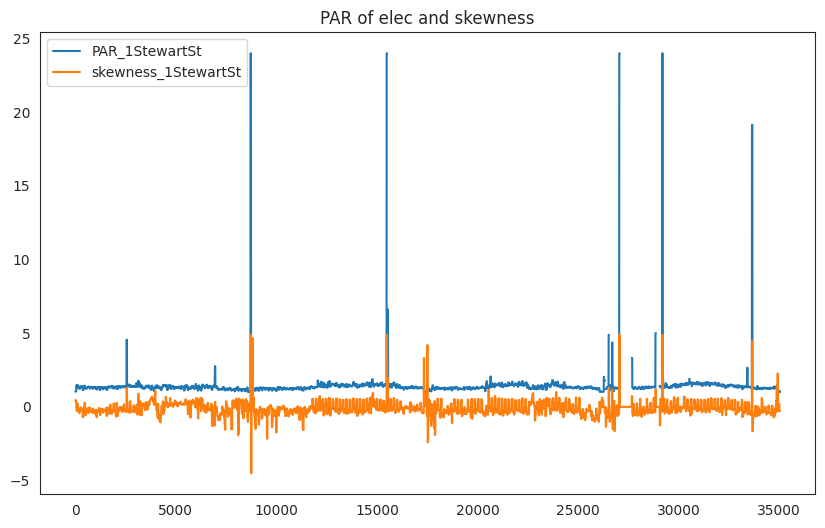

In [ ]:
df1[['PAR_1StewartSt', 'skewness_1StewartSt']].plot(title='PAR of elec and skewness', figsize=(10, 6))
# Display the plot
plt.show()

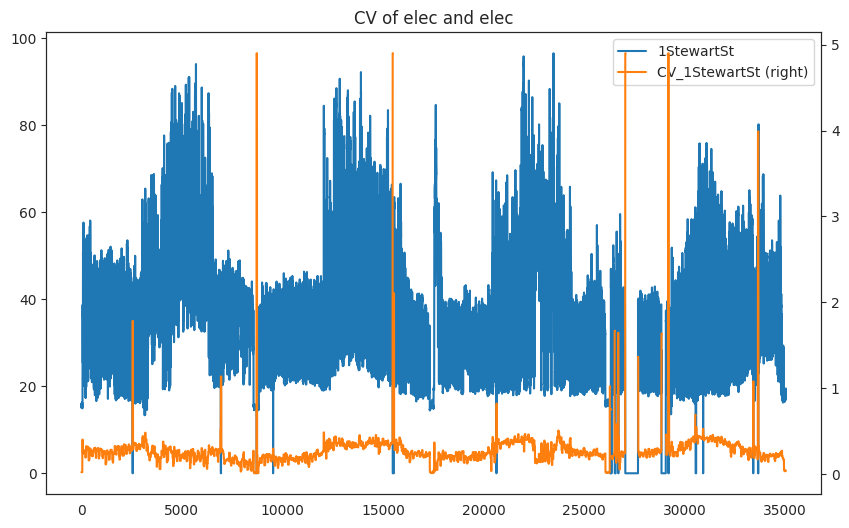

In [ ]:
#Coefficient of Variation (CV)

# Plot with secondary axis
ax = df1[['1StewartSt']].plot(title='CV of elec and elec', figsize=(10, 6), label='1StewartSt', legend=True)
df1[['CV_1StewartSt']].plot(ax=ax, secondary_y=True, label='PAR_1StewartSt', legend=True)

# Show the plot
plt.show()


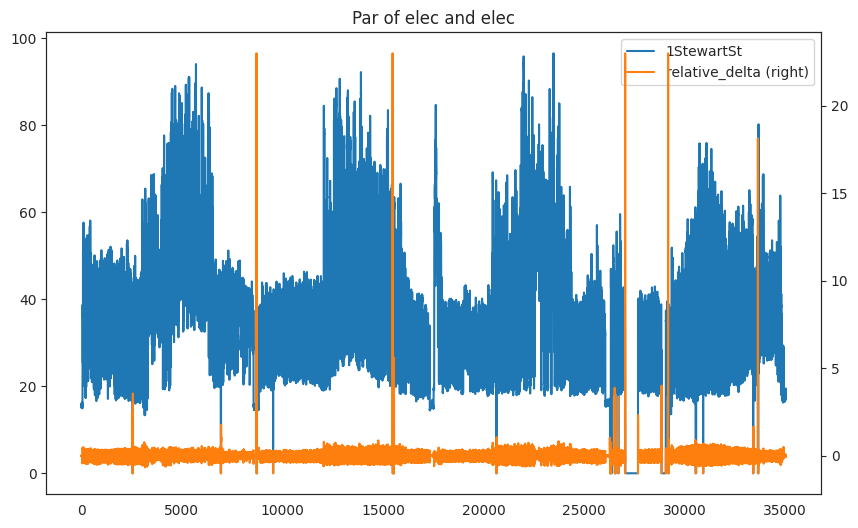

In [ ]:
# Relative Difference (Delta)
# Measures the relative change between the current value and the mean of a window.
#Highlights sharp increases or decreases, which are often precursors to peaks.
ax = df1[['1StewartSt']].plot(title='Par of elec and elec', figsize=(10, 6), label='1StewartSt', legend=True)
df1[['relative_delta']].plot(ax=ax, secondary_y=True, label='CV_1StewartSt', legend=True)

# Show the plot
plt.show()

In [ ]:
# Calculate daily peak by grouping by day
daily_peaks = df1.groupby('day')['1StewartSt'].transform('max')

# Compute shape factor: hourly load divided by the daily peak
df1['shape_factor'] = df1['1StewartSt'] / daily_peaks


<ipython-input-40-802058f95995>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['shape_factor'] = df1['1StewartSt'] / daily_peaks


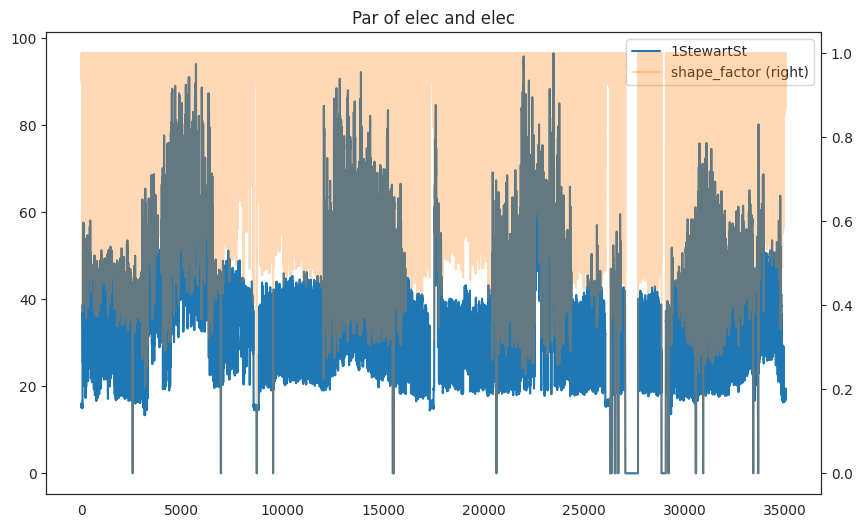

In [ ]:
ax = df1[['1StewartSt']].plot(title='Par of elec and elec', figsize=(10, 6), label='1StewartSt', legend=True)
df1[['shape_factor']].plot(ax=ax, secondary_y=True, alpha=0.3, label='shapefactor_1StewartSt', legend=True, )

# Show the plot
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   1StewartSt               35041 non-null  float64       
 1   temp                     35041 non-null  float64       
 2   dwpt                     35041 non-null  float64       
 3   rhum                     35041 non-null  float64       
 4   hour                     35041 non-null  int64         
 5   dayofw                   35041 non-null  int64         
 6   month                    35041 non-null  int64         
 7   is_weekday               35041 non-null  int64         
 8   elec_rolling_mean_24     35018 non-null  float64       
 9   elec_rolling_std_24      35018 non-null  float64       
 10  Date                     35041 non-null  datetime64[ns]
 11  day                      35041 non-null  object        
 12  elec_rolling_mean_daily  35041 n

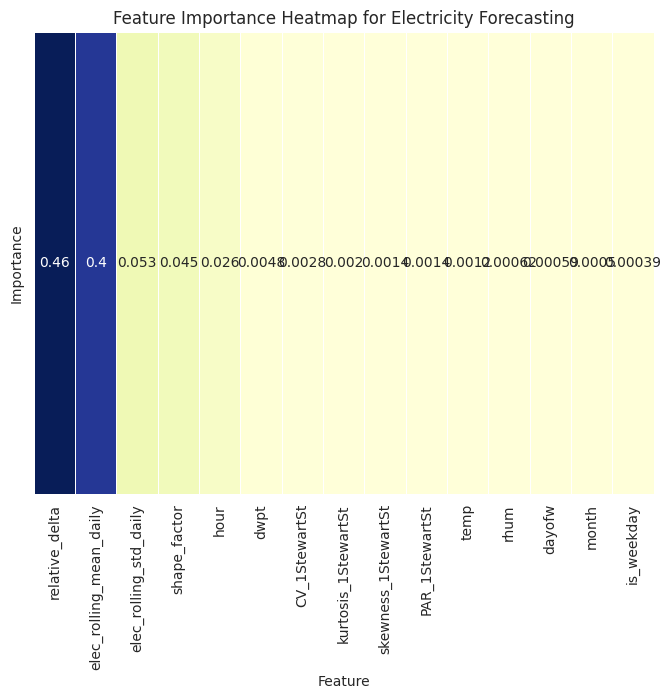

In [ ]:
# Define features and target
X = df1[['temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month','is_weekday','elec_rolling_mean_daily', 'elec_rolling_std_daily','skewness_1StewartSt','kurtosis_1StewartSt','PAR_1StewartSt','CV_1StewartSt','relative_delta','shape_factor']]


y = df1['1StewartSt']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='YlGnBu', cbar=False, linewidths=0.5)
plt.title('Feature Importance Heatmap for Electricity Forecasting')
plt.show()

<ipython-input-44-d83e59f86b39>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


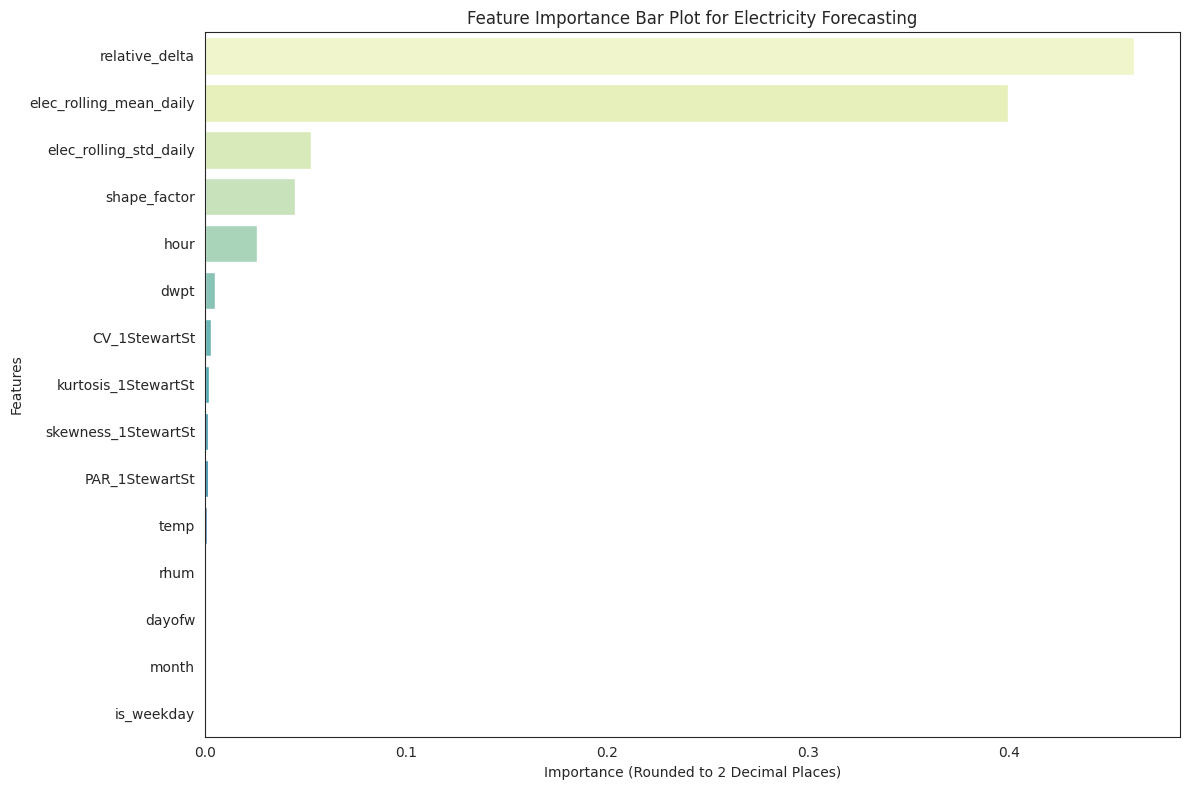

In [ ]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Round the importance values for clarity
importance_df['Importance'] = importance_df['Importance'].round(5)

# Plot the feature importances as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette='YlGnBu'
)
plt.title('Feature Importance Bar Plot for Electricity Forecasting')
plt.xlabel('Importance (Rounded to 2 Decimal Places)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Trend of electricity

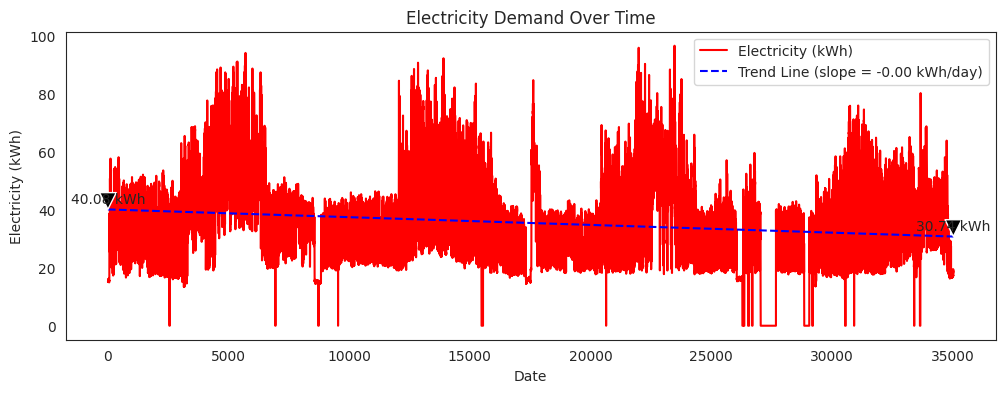

In [ ]:
# Convert datetime index to a numeric format by counting days from the start
x_numeric = (df1.index - df1.index[0])

# Fit a linear trend line
z = np.polyfit(x_numeric, df1['1StewartSt'], 1)
p = np.poly1d(z)

# Extract the slope for labeling
slope = z[0]

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(df1.index, df1['1StewartSt'], label='Electricity (kWh)', color='red')
plt.plot(df1.index, p(x_numeric), label=f'Trend Line (slope = {slope:.2f} kWh/day)', linestyle='--', color='blue')

# Annotating the first and last temperatures on the trend line
first_year_temp = p(x_numeric[0])
last_year_temp = p(x_numeric[-1])
plt.annotate(f'{first_year_temp:.2f} kWh', xy=(df1.index[0], first_year_temp), xytext=(df1.index[0], first_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'{last_year_temp:.2f} kWh', xy=(df1.index[-1], last_year_temp), xytext=(df1.index[-1], last_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('Electricity Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity (kWh)')
plt.legend()
plt.show()

## removing the outlier from the data

In [ ]:
df_low = df1[df1['1StewartSt'] <= 15]
df_low

1StewartSt  temp  dwpt  rhum  hour  dayofw  month  is_weekday  \
51         14.933  -0.5  -3.7  79.0     3       6      1           0   
53         14.974  -1.0  -3.4  84.0     5       6      1           0   
54         14.963  -0.5  -4.0  77.0     6       6      1           0   
57         14.998  -1.0  -3.0  86.0     9       6      1           0   
2545        0.000   9.8  -3.8  38.0     1       5      4           0   
...           ...   ...   ...   ...   ...     ...    ...         ...   
33668       0.000   6.6  -1.6  56.0    20       6     11           0   
33669       0.000   4.1   1.0  80.0    21       6     11           0   
33670       0.000   4.1   0.8  79.0    22       6     11           0   
33671       0.000   3.2   1.1  86.0    23       6     11           0   
33672       0.000   3.2   1.2  87.0     0       0     11           1   

       elec_rolling_mean_24  elec_rolling_std_24                Date  \
51                15.553750             0.374121 2016-01-03 03:00:00   
53                15.545542             0.385367 2016-01-03 05:00:00   
54                15.534208             0.398667 2016-01-03 06:00:00   
57                15.512917             0.404305 2016-01-03 09:00:00   
2545              29.722458            11.339608 2016-04-16 01:00:00   
...                     ...                  ...                 ...   
33668              5.727167            12.235821 2019-11-03 20:00:00   
33669              4.496500            11.176534 2019-11-03 21:00:00   
33670              3.235833             9.761430 2019-11-03 22:00:00   
33671              1.837750             7.330505 2019-11-03 23:00:00   
33672              0.372167             1.823237 2019-11-04 00:00:00   

              day  elec_rolling_mean_daily  elec_rolling_std_daily  \
51     2016-01-03                15.105750                0.148260   
53     2016-01-03                15.067833                0.129494   
54     2016-01-03                15.052857                0.124675   
57     2016-01-03                15.145400                0.246809   
2545   2016-04-16                 8.538500               12.075263   
...           ...                      ...                     ...   
33668  2019-11-03                 2.100286                7.824180   
33669  2019-11-03                 2.004818                7.648736   
33670  2019-11-03                 1.917652                7.484563   
33671  2019-11-03                 1.837750                7.330505   
33672  2019-11-04                 0.000000                     NaN   

       skewness_1StewartSt  kurtosis_1StewartSt  PAR_1StewartSt  \
51               -0.116373            -2.091998        1.473716   
53               -0.116373            -2.091998        1.473716   
54               -0.116373            -2.091998        1.473716   
57               -0.116373            -2.091998        1.473716   
2545              1.292716            -0.264296        4.561720   
...                    ...                  ...             ...   
33668             4.487313            20.769129       19.139709   
33669             4.487313            20.769129       19.139709   
33670             4.487313            20.769129       19.139709   
33671             4.487313            20.769129       19.139709   
33672            -1.645472             2.885712        1.353911   

       CV_1StewartSt  relative_delta  shape_factor  
51          0.401445       -0.431579      0.385706  
53          0.401445       -0.430018      0.386765  
54          0.401445       -0.430437      0.386481  
57          0.401445       -0.429104      0.387385  
2545        1.783842       -1.000000      0.000000  
...              ...             ...           ...  
33668       3.988848       -1.000000      0.000000  
33669       3.988848       -1.000000      0.000000  
33670       3.988848       -1.000000      0.000000  
33671       3.988848       -1.000000      0.000000  
33672       0.327405       -1.000000      0.0000

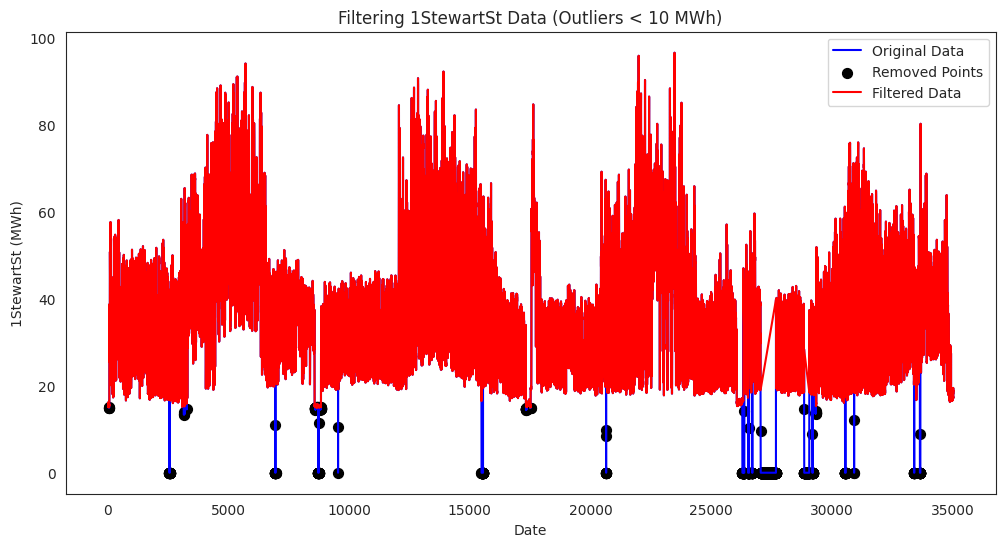

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter out small outliers (values less than 10)
df_clean = df1[df1['1StewartSt'] >= 15]

# Step 2: Identify the small outliers (values below 10)
outliers = df1['1StewartSt'] < 15

# Plotting the original, filtered data, and outliers
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(df1.index, df1['1StewartSt'], 'b-', label='Original Data')

# Plot the removed points (outliers below 10)
plt.scatter(
    df1.index[outliers],  # Index of the outliers
    df1['1StewartSt'][outliers],  # Corresponding values of the outliers
    color='black', label='Removed Points', s=50
)

# Plot the filtered data (values >= 10)
plt.plot(df_clean.index, df_clean['1StewartSt'], 'r-', label='Filtered Data')

# Add title, labels, and legend
plt.title('Filtering 1StewartSt Data (Outliers < 10 MWh)')
plt.xlabel('Date')
plt.ylabel('1StewartSt (MWh)')
plt.legend()

# Display the plot
plt.show()


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33635 entries, 0 to 35040
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   1StewartSt               33635 non-null  float64       
 1   temp                     33635 non-null  float64       
 2   dwpt                     33635 non-null  float64       
 3   rhum                     33635 non-null  float64       
 4   hour                     33635 non-null  int64         
 5   dayofw                   33635 non-null  int64         
 6   month                    33635 non-null  int64         
 7   is_weekday               33635 non-null  int64         
 8   elec_rolling_mean_24     33612 non-null  float64       
 9   elec_rolling_std_24      33612 non-null  float64       
 10  Date                     33635 non-null  datetime64[ns]
 11  day                      33635 non-null  object        
 12  elec_rolling_mean_daily  33635 non-nu

In [ ]:
df_clean

1StewartSt  temp  dwpt  rhum  hour  dayofw  month  is_weekday  \
0          15.185  -1.7  -3.1  90.0     0       4      1           1   
1          15.152  -1.6  -2.7  92.0     1       4      1           1   
2          15.070  -2.6  -3.1  96.0     2       4      1           1   
3          15.149  -2.2  -3.0  94.0     3       4      1           1   
4          15.125  -2.5  -3.2  95.0     4       4      1           1   
...           ...   ...   ...   ...   ...     ...    ...         ...   
35036      18.137  -2.1  -3.7  89.0    20       0     12           1   
35037      18.200  -1.9  -3.0  92.0    21       0     12           1   
35038      17.334  -1.4  -2.5  92.0    22       0     12           1   
35039      17.138  -1.7  -2.5  94.0    23       0     12           1   
35040      17.397  -1.4  -2.2  94.0     0       1     12           1   

       elec_rolling_mean_24  elec_rolling_std_24                Date  \
0                       NaN                  NaN 2016-01-01 00:00:00   
1                       NaN                  NaN 2016-01-01 01:00:00   
2                       NaN                  NaN 2016-01-01 02:00:00   
3                       NaN                  NaN 2016-01-01 03:00:00   
4                       NaN                  NaN 2016-01-01 04:00:00   
...                     ...                  ...                 ...   
35036             18.092542             0.803956 2019-12-30 20:00:00   
35037             18.101708             0.803871 2019-12-30 21:00:00   
35038             18.121375             0.777566 2019-12-30 22:00:00   
35039             18.137208             0.752048 2019-12-30 23:00:00   
35040             18.135542             0.753709 2019-12-31 00:00:00   

              day  elec_rolling_mean_daily  elec_rolling_std_daily  \
0      2016-01-01                15.185000                     NaN   
1      2016-01-01                15.168500                0.023335   
2      2016-01-01                15.135667                0.059214   
3      2016-01-01                15.139000                0.048806   
4      2016-01-01                15.136200                0.042728   
...           ...                      ...                     ...   
35036  2019-12-30                18.220048                0.748887   
35037  2019-12-30                18.219136                0.730851   
35038  2019-12-30                18.180652                0.737515   
35039  2019-12-30                18.137208                0.752048   
35040  2019-12-31                17.397000                     NaN   

       skewness_1StewartSt  kurtosis_1StewartSt  PAR_1StewartSt  \
0                 0.459107            -0.935570        1.040686   
1                 0.459107            -0.935570        1.040686   
2                 0.459107            -0.935570        1.040686   
3                 0.459107            -0.935570        1.040686   
4                 0.459107            -0.935570        1.040686   
...                    ...                  ...             ...   
35036            -0.288851            -1.076211        1.074311   
35037            -0.288851            -1.076211        1.074311   
35038            -0.288851            -1.076211        1.074311   
35039            -0.288851            -1.076211        1.074311   
35040                  NaN                  NaN        1.000000   

       CV_1StewartSt  relative_delta  shape_factor  
0           0.022799       -0.020952      0.940772  
1           0.022799       -0.023079      0.938727  
2           0.022799       -0.028366      0.933647  
3           0.022799       -0.023273      0.938542  
4           0.022799       -0.024820      0.937055  
...              ...             ...           ...  
35036       0.041464       -0.000011      0.930819  
35037       0.041464        0.003462      0.934052  
35038       0.041464       -0.044285      0.889607  
35039       0.041464       -0.055092      0.879548  
35040            NaN        0.000000      1.0000

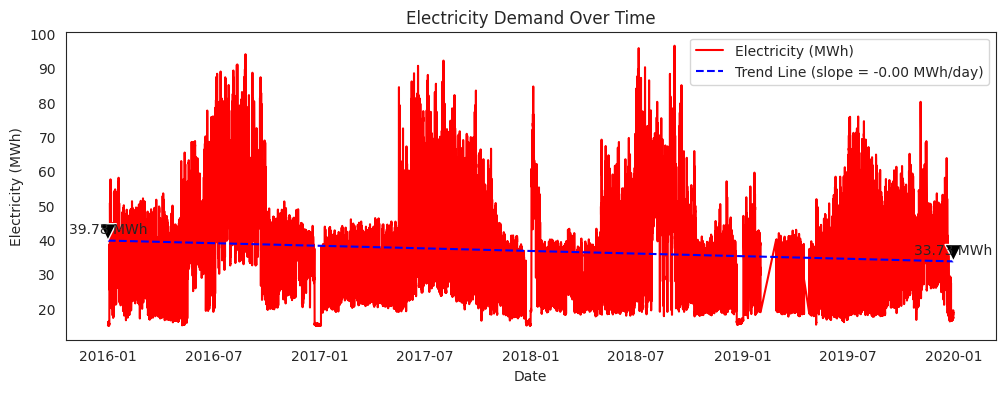

In [ ]:
df_draw = df_clean.copy()


df_draw['Date'] = pd.to_datetime(df_draw['Date'])
df_draw.set_index('Date', inplace=True)
# Convert datetime index to a numeric format by counting days from the start
# Fix applied here: use .days attribute on each timedelta element
x_numeric = (df_draw.index - df_draw.index[0]).days

# Fit a linear trend line
z = np.polyfit(x_numeric, df_draw['1StewartSt'], 1)
p = np.poly1d(z)

# Extract the slope for labeling
slope = z[0]

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(df_draw.index, df_draw['1StewartSt'], label='Electricity (MWh)', color='red')
plt.plot(df_draw.index, p(x_numeric), label=f'Trend Line (slope = {slope:.2f} MWh/day)', linestyle='--', color='blue')

# Annotating the first and last temperatures on the trend line
first_year_temp = p(x_numeric[0])
last_year_temp = p(x_numeric[-1])
plt.annotate(f'{first_year_temp:.2f} MWh', xy=(df_draw.index[0], first_year_temp), xytext=(df_draw.index[0], first_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'{last_year_temp:.2f} MWh', xy=(df_draw.index[-1], last_year_temp), xytext=(df_draw.index[-1], last_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('Electricity Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity (MWh)')
plt.legend()
plt.show()


In [ ]:
# Calculate the daily slope
z = np.polyfit(x_numeric, df_clean['1StewartSt'], 1)
daily_slope = z[0]

# Convert daily slope to monthly, yearly, and seasonal slopes
slope_per_month = daily_slope * 30.44
slope_per_year = daily_slope * 365
slope_per_season = daily_slope * 91.25  # Assuming a season is approximately 3 months

# Print the results
print(f"Slope per day: {daily_slope:.4f} MWh/day")
print(f"Slope per month: {slope_per_month:.4f} MWh/month")
print(f"Slope per year: {slope_per_year:.4f} MWh/year")
print(f"Slope per season: {slope_per_season:.4f} MWh/season")

Slope per day: -0.0041 MWh/day
Slope per month: -0.1262 MWh/month
Slope per year: -1.5127 MWh/year
Slope per season: -0.3782 MWh/season


In [ ]:
df_re = df_clean.copy()

## Defining peak function amd adding several column as target

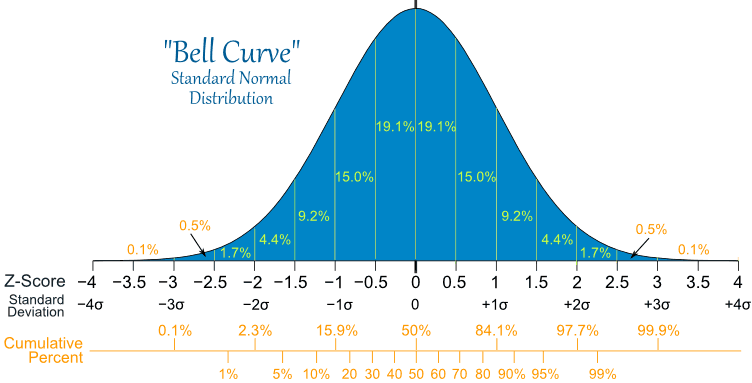

## Adding z score as a new feature.


In [ ]:
df_re

1StewartSt  temp  dwpt  rhum  hour  dayofw  month  is_weekday  \
0          15.185  -1.7  -3.1  90.0     0       4      1           1   
1          15.152  -1.6  -2.7  92.0     1       4      1           1   
2          15.070  -2.6  -3.1  96.0     2       4      1           1   
3          15.149  -2.2  -3.0  94.0     3       4      1           1   
4          15.125  -2.5  -3.2  95.0     4       4      1           1   
...           ...   ...   ...   ...   ...     ...    ...         ...   
35036      18.137  -2.1  -3.7  89.0    20       0     12           1   
35037      18.200  -1.9  -3.0  92.0    21       0     12           1   
35038      17.334  -1.4  -2.5  92.0    22       0     12           1   
35039      17.138  -1.7  -2.5  94.0    23       0     12           1   
35040      17.397  -1.4  -2.2  94.0     0       1     12           1   

       elec_rolling_mean_24  elec_rolling_std_24                Date  \
0                       NaN                  NaN 2016-01-01 00:00:00   
1                       NaN                  NaN 2016-01-01 01:00:00   
2                       NaN                  NaN 2016-01-01 02:00:00   
3                       NaN                  NaN 2016-01-01 03:00:00   
4                       NaN                  NaN 2016-01-01 04:00:00   
...                     ...                  ...                 ...   
35036             18.092542             0.803956 2019-12-30 20:00:00   
35037             18.101708             0.803871 2019-12-30 21:00:00   
35038             18.121375             0.777566 2019-12-30 22:00:00   
35039             18.137208             0.752048 2019-12-30 23:00:00   
35040             18.135542             0.753709 2019-12-31 00:00:00   

              day  elec_rolling_mean_daily  elec_rolling_std_daily  \
0      2016-01-01                15.185000                     NaN   
1      2016-01-01                15.168500                0.023335   
2      2016-01-01                15.135667                0.059214   
3      2016-01-01                15.139000                0.048806   
4      2016-01-01                15.136200                0.042728   
...           ...                      ...                     ...   
35036  2019-12-30                18.220048                0.748887   
35037  2019-12-30                18.219136                0.730851   
35038  2019-12-30                18.180652                0.737515   
35039  2019-12-30                18.137208                0.752048   
35040  2019-12-31                17.397000                     NaN   

       skewness_1StewartSt  kurtosis_1StewartSt  PAR_1StewartSt  \
0                 0.459107            -0.935570        1.040686   
1                 0.459107            -0.935570        1.040686   
2                 0.459107            -0.935570        1.040686   
3                 0.459107            -0.935570        1.040686   
4                 0.459107            -0.935570        1.040686   
...                    ...                  ...             ...   
35036            -0.288851            -1.076211        1.074311   
35037            -0.288851            -1.076211        1.074311   
35038            -0.288851            -1.076211        1.074311   
35039            -0.288851            -1.076211        1.074311   
35040                  NaN                  NaN        1.000000   

       CV_1StewartSt  relative_delta  shape_factor  
0           0.022799       -0.020952      0.940772  
1           0.022799       -0.023079      0.938727  
2           0.022799       -0.028366      0.933647  
3           0.022799       -0.023273      0.938542  
4           0.022799       -0.024820      0.937055  
...              ...             ...           ...  
35036       0.041464       -0.000011      0.930819  
35037       0.041464        0.003462      0.934052  
35038       0.041464       -0.044285      0.889607  
35039       0.041464       -0.055092      0.879548  
35040            NaN        0.000000      1.0000

In [ ]:
# Compute Z-score for each hour within a rolling window
#df_re['z_score_hour'] = (df_re['1StewartSt'] - df_re['1StewartSt'].rolling(window=24).mean()) / df_re['1StewartSt'].rolling(window=24).std()

In [ ]:
from scipy.stats import zscore

df_re['peakDayStatus'] = (zscore(df_re['1StewartSt']) >= 2).astype(int).replace({1: 'Yes', 0: 'No'})

In [ ]:
# Assuming df_clean is your DataFrame and it has a 'Date' column in datetime format
df_re['Date'] = pd.to_datetime(df_re['Date'])
df_re.loc[:, 'Year'] = df_re['Date'].dt.year

# Filter the DataFrame for rows where 'peakDayStatus' is 'Yes'
df_yes = df_re[df_re['peakDayStatus'] == 'Yes']

# Group by 'Year' and count the number of 'Yes' values in each year
peak_counts_per_year = df_yes.groupby('Year').size().reset_index(name='Count')

# Display the result
print(peak_counts_per_year)

   Year  Count
0  2016    545
1  2017    482
2  2018    376
3  2019     83


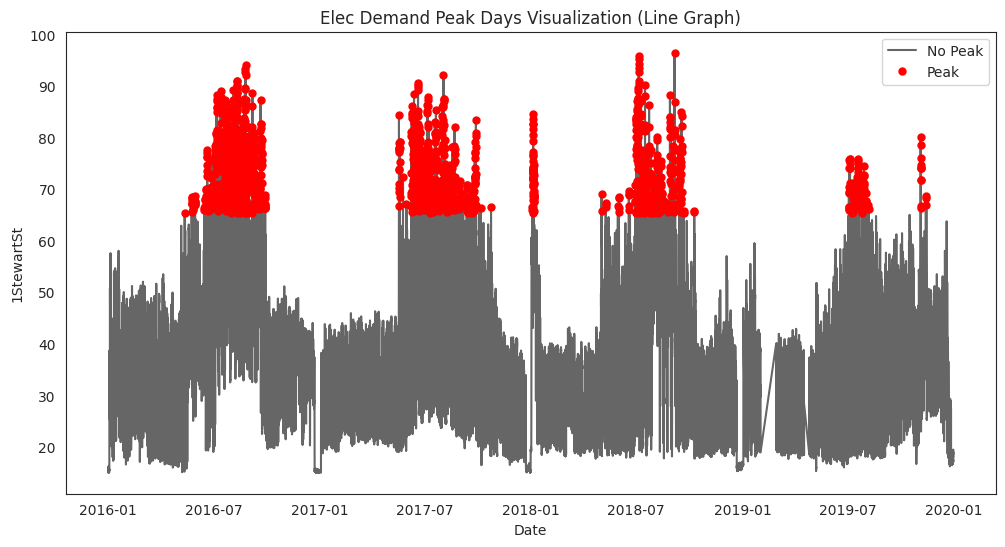

In [ ]:
# Separate the data based on peak day status
peak_data = df_re[df_re['peakDayStatus'] == 'Yes']
non_peak_data = df_re[df_re['peakDayStatus'] == 'No']


# Plot the line graph for all data
plt.figure(figsize=(12, 6))
plt.plot(df_re['Date'], df_re['1StewartSt'], color='black', label='No Peak', alpha=0.6)

# Highlight peak days in red
plt.plot(peak_data['Date'], peak_data['1StewartSt'], 'ro', label='Peak', markersize=5)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('1StewartSt')
plt.title('Elec Demand Peak Days Visualization (Line Graph)')
plt.legend()

# Display the plot
plt.show()


## adding lagged features ( how many hours in past should be considered?)

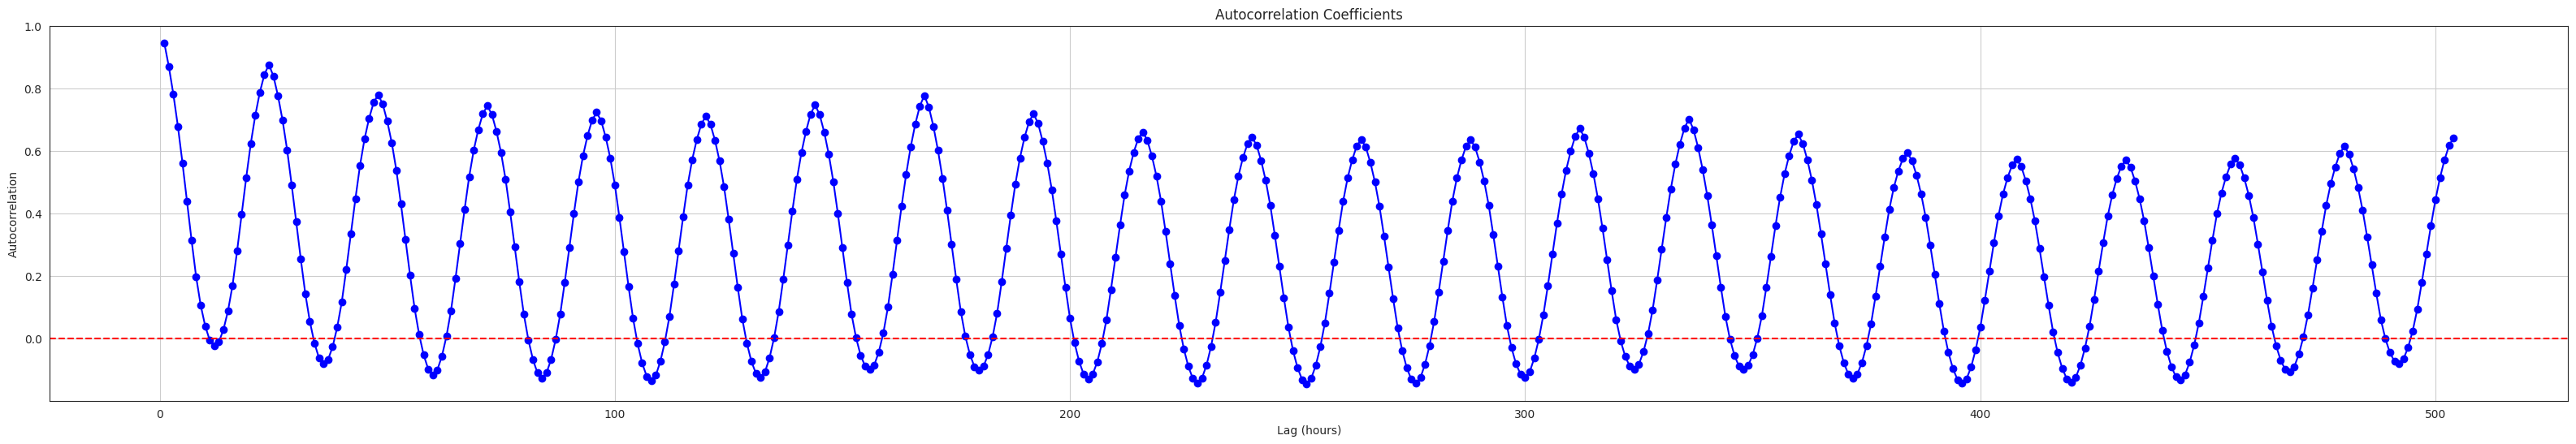

In [ ]:
# Compute autocorrelation for lags
max_lag = 21*24  # Test lags up to 14 days
autocorrelations = [df_re['1StewartSt'].autocorr(lag=i) for i in range(1, max_lag + 1)]

# Plot autocorrelation coefficients
plt.figure(figsize=(40, 6))
plt.plot(range(1, max_lag + 1), autocorrelations, marker='o', linestyle='-', color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Autocorrelation Coefficients')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

In [ ]:

# Compute autocorrelation for lags
max_lag = 24  # Test up to 48 lags
autocorrelations = [df_re['1StewartSt'].autocorr(lag=i) for i in range(1, max_lag + 1)]

# Compute statistical significance threshold
N = len(df_re['1StewartSt'])
stat_threshold = 1.96 / np.sqrt(N)
threshold = max(0.2, stat_threshold)  # Choose the higher of practical or statistical thresholds


# Identify significant lags
significant_lags = [i for i, coef in enumerate(autocorrelations, start=1) if abs(coef) > threshold]
print(f"Significant lags: {significant_lags}")


# Choose maximum lag
chosen_lag = max(significant_lags) if significant_lags else 1
print(f"Chosen lag: {chosen_lag}")


Significant lags: [1, 2, 3, 4, 5, 6, 7, 17, 18, 19, 20, 21, 22, 23, 24]
Chosen lag: 24


In [ ]:
'''# Compute autocorrelation for lags
max_lag = 24  # Test up to 48 lags
autocorrelations = [df_re['1StewartSt'].autocorr(lag=i) for i in range(1, max_lag + 1)]

# Compute statistical significance threshold
N = len(df_re['1StewartSt'])
stat_threshold = 1.96 / np.sqrt(N)
threshold = max(0.2, stat_threshold)  # Choose the higher of practical or statistical thresholds

# Identify significant lags
significant_lags = [i for i, coef in enumerate(autocorrelations, start=1) if abs(coef) > threshold]
print(f"Significant lags: {significant_lags}")

# Choose maximum lag
chosen_lag = max(significant_lags) if significant_lags else 1
print(f"Chosen lag: {chosen_lag}")
'''

'# Compute autocorrelation for lags\nmax_lag = 24  # Test up to 48 lags\nautocorrelations = [df_re[\'1StewartSt\'].autocorr(lag=i) for i in range(1, max_lag + 1)]\n\n# Compute statistical significance threshold\nN = len(df_re[\'1StewartSt\'])\nstat_threshold = 1.96 / np.sqrt(N)\nthreshold = max(0.2, stat_threshold)  # Choose the higher of practical or statistical thresholds\n\n# Identify significant lags\nsignificant_lags = [i for i, coef in enumerate(autocorrelations, start=1) if abs(coef) > threshold]\nprint(f"Significant lags: {significant_lags}")\n\n# Choose maximum lag\nchosen_lag = max(significant_lags) if significant_lags else 1\nprint(f"Chosen lag: {chosen_lag}")\n'

In [ ]:
# Define a practical threshold (e.g., 0.2) and statistical threshold
threshold = max(0.2, stat_threshold)

# Identify significant lags
significant_lags = [i for i, coef in enumerate(autocorrelations, start=1) if abs(coef) > threshold]
print(f"Significant lags: {significant_lags}")

# Choose maximum lag
chosen_lag = max(significant_lags) if significant_lags else 1
print(f"Chosen lag: {chosen_lag}")


Significant lags: [1, 2, 3, 4, 5, 6, 7, 17, 18, 19, 20, 21, 22, 23, 24]
Chosen lag: 24


In [ ]:
# Add lag features to the dataset
for lag in range(1, chosen_lag + 1):
    df_re[f'1StewartSt_lag_{lag}'] = df_re['1StewartSt'].shift(lag)

In [ ]:
df_re.head(30)

1StewartSt  temp  dwpt  rhum  hour  dayofw  month  is_weekday  \
0       15.185  -1.7  -3.1  90.0     0       4      1           1   
1       15.152  -1.6  -2.7  92.0     1       4      1           1   
2       15.070  -2.6  -3.1  96.0     2       4      1           1   
3       15.149  -2.2  -3.0  94.0     3       4      1           1   
4       15.125  -2.5  -3.2  95.0     4       4      1           1   
5       15.106  -2.1  -3.5  90.0     5       4      1           1   
6       15.091  -2.2  -3.8  89.0     6       4      1           1   
7       15.768  -2.7  -4.0  91.0     7       4      1           1   
8       15.417  -2.9  -3.7  94.0     8       4      1           1   
9       15.221  -3.2  -3.7  96.0     9       4      1           1   
10      15.532  -3.1  -3.5  97.0    10       4      1           1   
11      15.563  -3.0  -3.5  96.0    11       4      1           1   
12      15.417  -3.0  -3.3  98.0    12       4      1           1   
13      15.566  -2.0  -3.3  91.0    13       4      1           1   
14      15.676  -1.1  -2.8  88.0    14       4      1           1   
15      15.394  -0.6  -2.7  86.0    15       4      1           1   
16      16.141  -0.4  -2.1  88.0    16       4      1           1   
17      16.133  -0.2  -2.3  86.0    17       4      1           1   
18      16.135  -0.2  -2.7  83.0    18       4      1           1   
19      15.962  -0.3  -2.8  83.0    19       4      1           1   
20      15.754  -0.6  -3.1  83.0    20       4      1           1   
21      15.728  -0.8  -3.3  83.0    21       4      1           1   
22      15.728  -0.9  -3.7  81.0    22       4      1           1   
23      15.226  -1.9  -3.2  91.0    23       4      1           1   
24      15.340  -1.4  -4.2  81.0     0       5      1           0   
25      15.244  -1.5  -4.7  79.0     1       5      1           0   
26      15.152  -1.8  -5.0  79.0     2       5      1           0   
27      15.264  -2.1  -4.6  83.0     3       5      1           0   
28      15.138  -2.5  -4.5  86.0     4       5      1           0   
29      15.043  -2.3  -5.1  81.0     5       5      1           0   

    elec_rolling_mean_24  elec_rolling_std_24  ... 1StewartSt_lag_15  \
0                    NaN                  NaN  ...               NaN   
1                    NaN                  NaN  ...               NaN   
2                    NaN                  NaN  ...               NaN   
3                    NaN                  NaN  ...               NaN   
4                    NaN                  NaN  ...               NaN   
5                    NaN                  NaN  ...               NaN   
6                    NaN                  NaN  ...               NaN   
7                    NaN                  NaN  ...               NaN   
8                    NaN                  NaN  ...               NaN   
9                    NaN                  NaN  ...               NaN   
10                   NaN                  NaN  ...               NaN   
11                   NaN                  NaN  ...               NaN   
12                   NaN                  NaN  ...               NaN   
13                   NaN                  NaN  ...               NaN   
14                   NaN                  NaN  ...               NaN   
15                   NaN                  NaN  ...            15.185   
16                   NaN                  NaN  ...            15.152   
17                   NaN                  NaN  ...            15.070   
18                   NaN                  NaN  ...            15.149   
19                   NaN                  NaN  ...            15.125   
20                   NaN                  NaN  ...            15.106   
21                   NaN                  NaN  ...            15.091   
22                   NaN                  NaN  ...            15.768   
23             15.509958             0.353615  ...            15.417   
24             15.516417             0.348804  ...            15

In [ ]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33635 entries, 0 to 35040
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   1StewartSt               33635 non-null  float64       
 1   temp                     33635 non-null  float64       
 2   dwpt                     33635 non-null  float64       
 3   rhum                     33635 non-null  float64       
 4   hour                     33635 non-null  int64         
 5   dayofw                   33635 non-null  int64         
 6   month                    33635 non-null  int64         
 7   is_weekday               33635 non-null  int64         
 8   elec_rolling_mean_24     33612 non-null  float64       
 9   elec_rolling_std_24      33612 non-null  float64       
 10  Date                     33635 non-null  datetime64[ns]
 11  day                      33635 non-null  object        
 12  elec_rolling_mean_daily  33635 non-nu

In [ ]:
'''
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset with multiple features.
    Arguments:
        data: Sequence of observations as a Pandas DataFrame.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1) - Excluding the current time t
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # forecast sequence (t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{col}_t+{i}' for col in df.columns]
        else:
            names += [f'{col}_t+{i}' for col in df.columns]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

# Example usage with your dataset
# Assuming `data` is your DataFrame with the columns as you specified
data = normalized_data

n_in = 24  # Number of lag steps
n_out = 24  # Number of forecast steps

# Apply transformation to the data
transformed_data = series_to_supervised(data, n_in, n_out)
transformed_data

'''

'\ndef series_to_supervised(data, n_in=1, n_out=1, dropnan=True):\n    """\n    Frame a time series as a supervised learning dataset with multiple features.\n    Arguments:\n        data: Sequence of observations as a Pandas DataFrame.\n        n_in: Number of lag observations as input (X).\n        n_out: Number of observations as output (y).\n        dropnan: Boolean whether or not to drop rows with NaN values.\n    Returns:\n        Pandas DataFrame of series framed for supervised learning.\n    """\n    n_vars = data.shape[1]\n    df = DataFrame(data)\n    cols, names = list(), list()\n\n    # input sequence (t-n, ... t-1) - Excluding the current time t\n    for i in range(n_in, 0, -1):\n        cols.append(df.shift(i))\n        names += [f\'{col}_t-{i}\' for col in df.columns]\n\n    # forecast sequence (t+1, ... t+n)\n    for i in range(0, n_out):\n        cols.append(df.shift(-i))\n        if i == 0:\n            names += [f\'{col}_t+{i}\' for col in df.columns]\n        else:\n

In [ ]:
df_re.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24', 'Date',
       'day', 'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', 'peakDayStatus',
       'Year', '1StewartSt_lag_1', '1StewartSt_lag_2', '1StewartSt_lag_3',
       '1StewartSt_lag_4', '1StewartSt_lag_5', '1StewartSt_lag_6',
       '1StewartSt_lag_7', '1StewartSt_lag_8', '1StewartSt_lag_9',
       '1StewartSt_lag_10', '1StewartSt_lag_11', '1StewartSt_lag_12',
       '1StewartSt_lag_13', '1StewartSt_lag_14', '1StewartSt_lag_15',
       '1StewartSt_lag_16', '1StewartSt_lag_17', '1StewartSt_lag_18',
       '1StewartSt_lag_19', '1StewartSt_lag_20', '1StewartSt_lag_21',
       '1StewartSt_lag_22', '1StewartSt_lag_23', '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
# Map categorical string values to integers using replace()
categorical_col = ['peakDayStatus']
category_mapping = {'No': 0, 'Yes': 1}
df_re[categorical_col] = df_re[categorical_col].replace(category_mapping) # Use replace() instead of map()

<ipython-input-67-256a00e69d48>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_re[categorical_col] = df_re[categorical_col].replace(category_mapping) # Use replace() instead of map()


In [ ]:
significant_lags

[1, 2, 3, 4, 5, 6, 7, 17, 18, 19, 20, 21, 22, 23, 24]

In [ ]:
columns_to_exclude = ['1StewartSt_lag_1','1StewartSt_lag_8', '1StewartSt_lag_9', '1StewartSt_lag_10','1StewartSt_lag_11','1StewartSt_lag_12','1StewartSt_lag_13','1StewartSt_lag_14','1StewartSt_lag_15','1StewartSt_lag_16']

# Exclude the columns
df_re = df_re.drop(columns=columns_to_exclude)

In [ ]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33635 entries, 0 to 35040
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   1StewartSt               33635 non-null  float64       
 1   temp                     33635 non-null  float64       
 2   dwpt                     33635 non-null  float64       
 3   rhum                     33635 non-null  float64       
 4   hour                     33635 non-null  int64         
 5   dayofw                   33635 non-null  int64         
 6   month                    33635 non-null  int64         
 7   is_weekday               33635 non-null  int64         
 8   elec_rolling_mean_24     33612 non-null  float64       
 9   elec_rolling_std_24      33612 non-null  float64       
 10  Date                     33635 non-null  datetime64[ns]
 11  day                      33635 non-null  object        
 12  elec_rolling_mean_daily  33635 non-nu

In [ ]:
df_g = df_re.copy()

In [ ]:
# Create temperature bins (5-degree ranges)


df_g['temp_bin'] = pd.cut(df_g['temp'], bins=np.arange(-30, 50, 5))

# Peak probability by hour
hourly_peaks = df_g.groupby('hour')['peakDayStatus'].mean().reset_index()

# Peak probability by day of week
dayofw_peaks = df_g.groupby('dayofw')['peakDayStatus'].mean().reset_index()

# Peak probability by temperature range
temp_peaks = df_g.groupby('temp_bin')['peakDayStatus'].mean().reset_index()


<ipython-input-72-a2a52aa8771d>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_peaks = df_g.groupby('temp_bin')['peakDayStatus'].mean().reset_index()


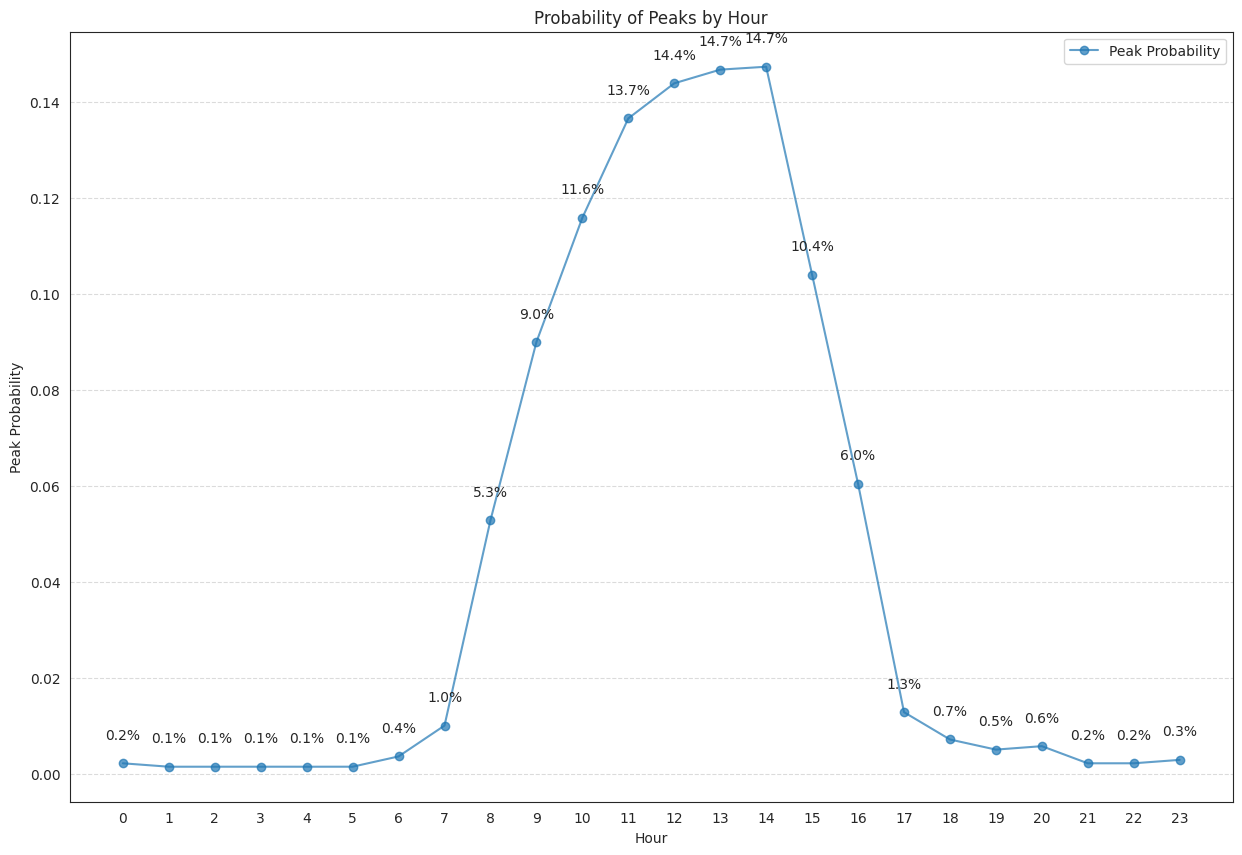

<ipython-input-73-3e579b977f9d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofw', y='peakDayStatus', data=dayofw_peaks, palette="viridis")


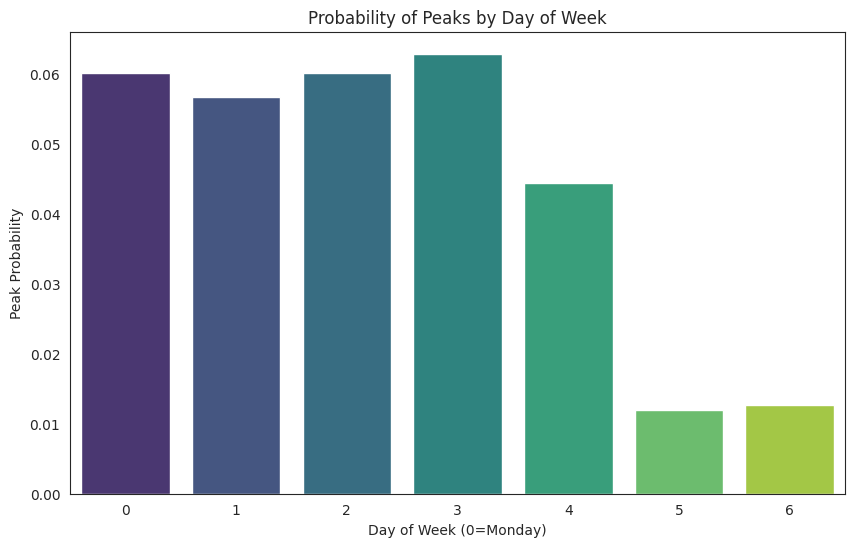

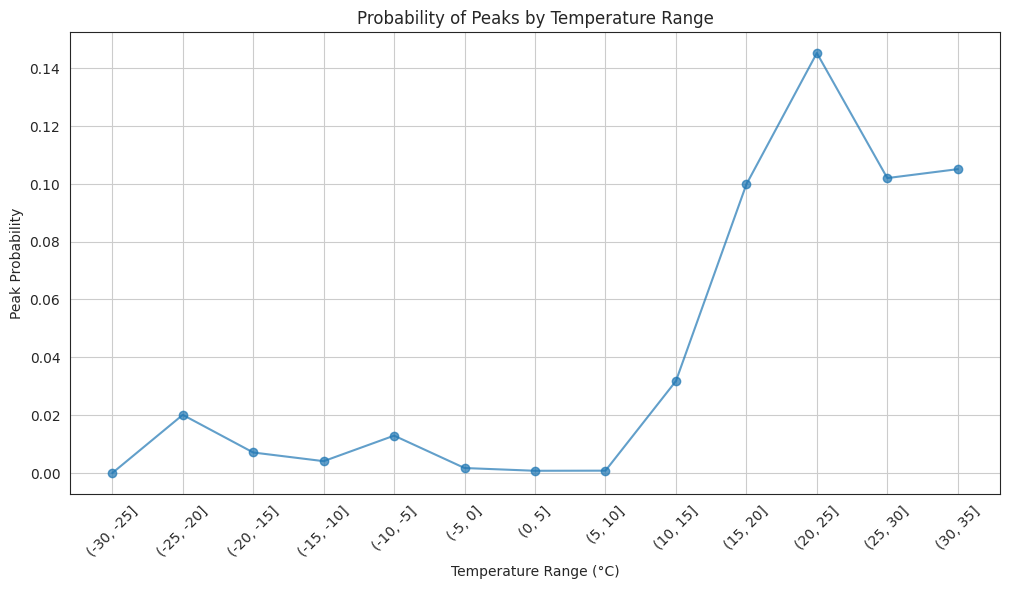

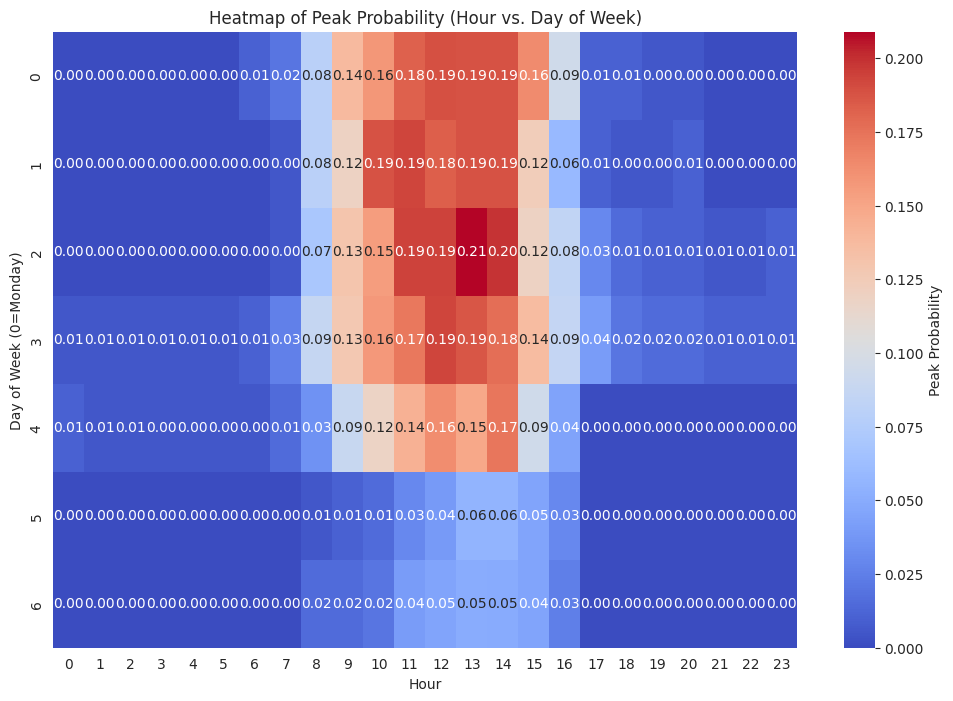

In [ ]:
# Line chart for hourly peaks with percentages added
plt.figure(figsize=(15, 10))
plt.plot(hourly_peaks['hour'], hourly_peaks['peakDayStatus'], marker='o', linestyle='-', alpha=0.7, label="Peak Probability")
plt.title("Probability of Peaks by Hour")
plt.xlabel("Hour")
plt.ylabel("Peak Probability")

# Ensure x-axis shows each hour
plt.xticks(hourly_peaks['hour'])

# Add percentages on the line
for x, y in zip(hourly_peaks['hour'], hourly_peaks['peakDayStatus']):
    plt.text(x, y + 0.005, f"{y*100:.1f}%", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()



# Bar chart for day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofw', y='peakDayStatus', data=dayofw_peaks, palette="viridis")
plt.title("Probability of Peaks by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Peak Probability")
plt.show()

# Line chart for temperature range
plt.figure(figsize=(12, 6))
plt.plot(temp_peaks['temp_bin'].astype(str), temp_peaks['peakDayStatus'], marker='o', linestyle='-', alpha=0.7)
plt.title("Probability of Peaks by Temperature Range")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Peak Probability")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Heatmap for hour x day of week
heatmap_data = df_g.pivot_table(index='dayofw', columns='hour', values='peakDayStatus', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Peak Probability'})
plt.title("Heatmap of Peak Probability (Hour vs. Day of Week)")
plt.xlabel("Hour")
plt.ylabel("Day of Week (0=Monday)")
plt.show()


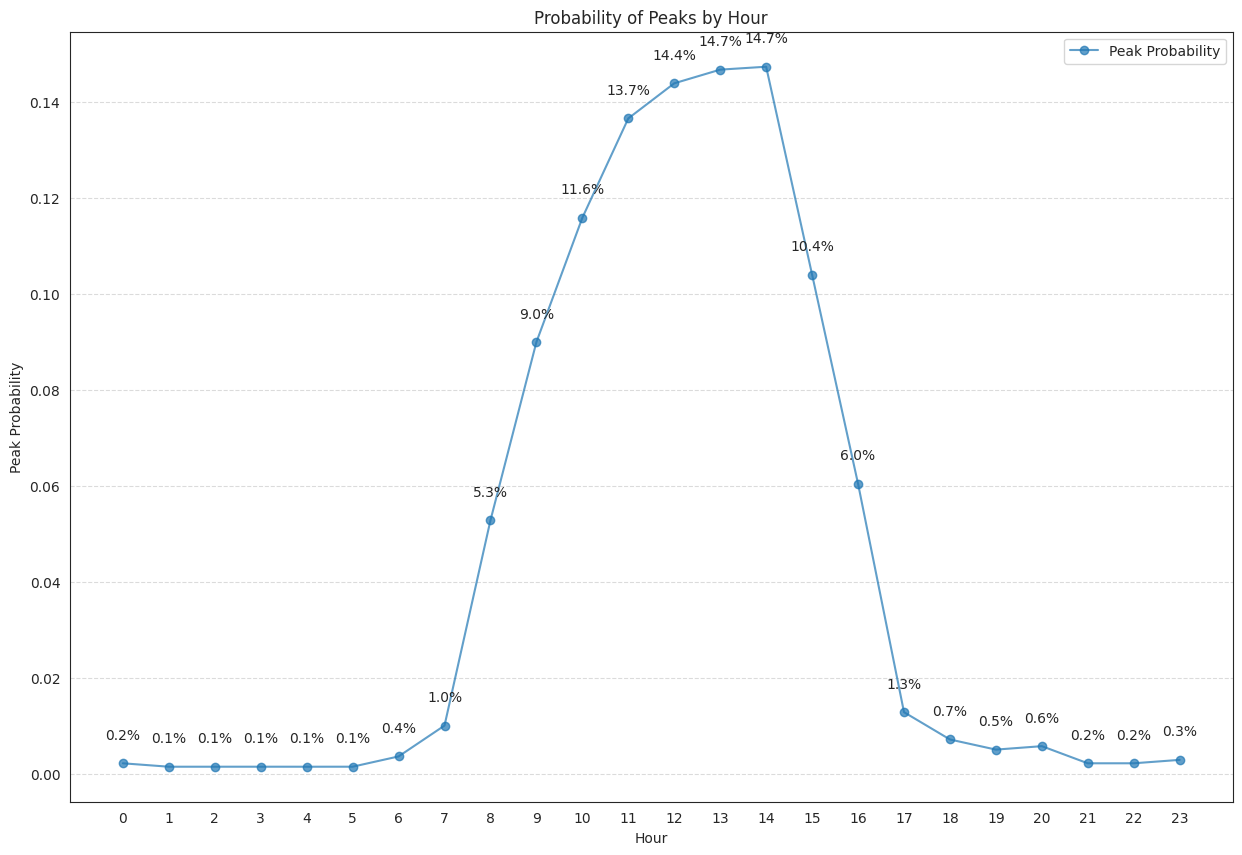

<ipython-input-74-402a516fbad4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofw', y='peakDayStatus', data=dayofw_peaks, palette="viridis")


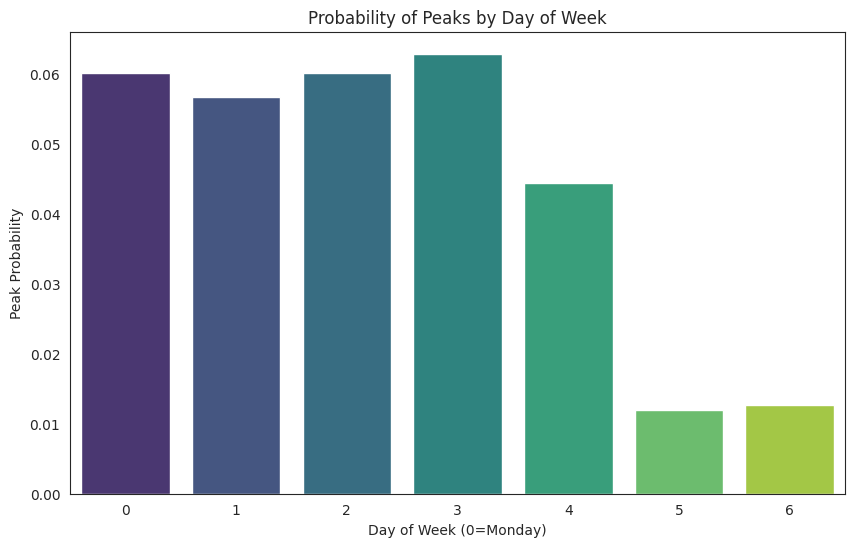

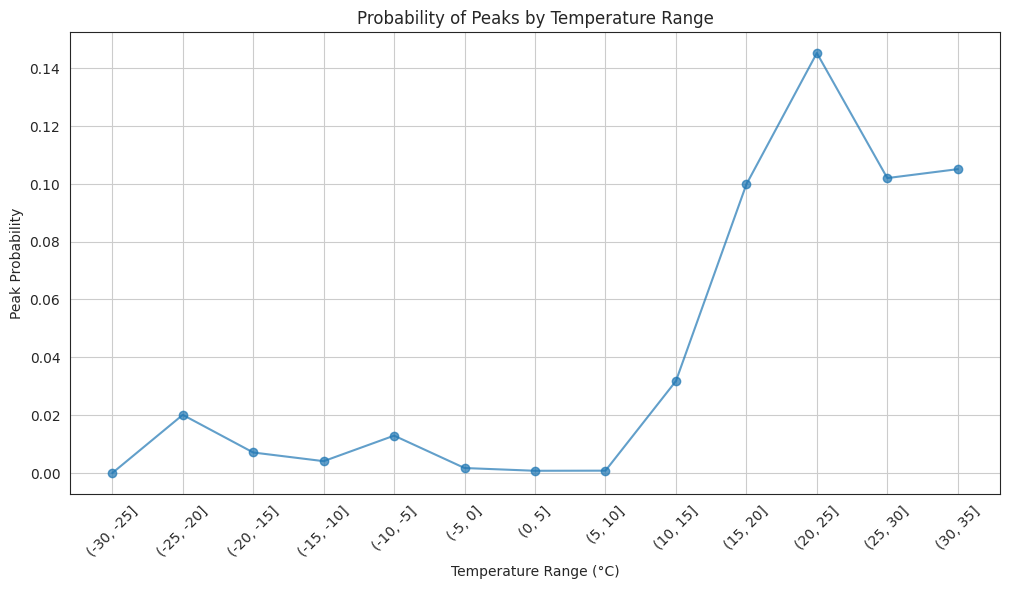

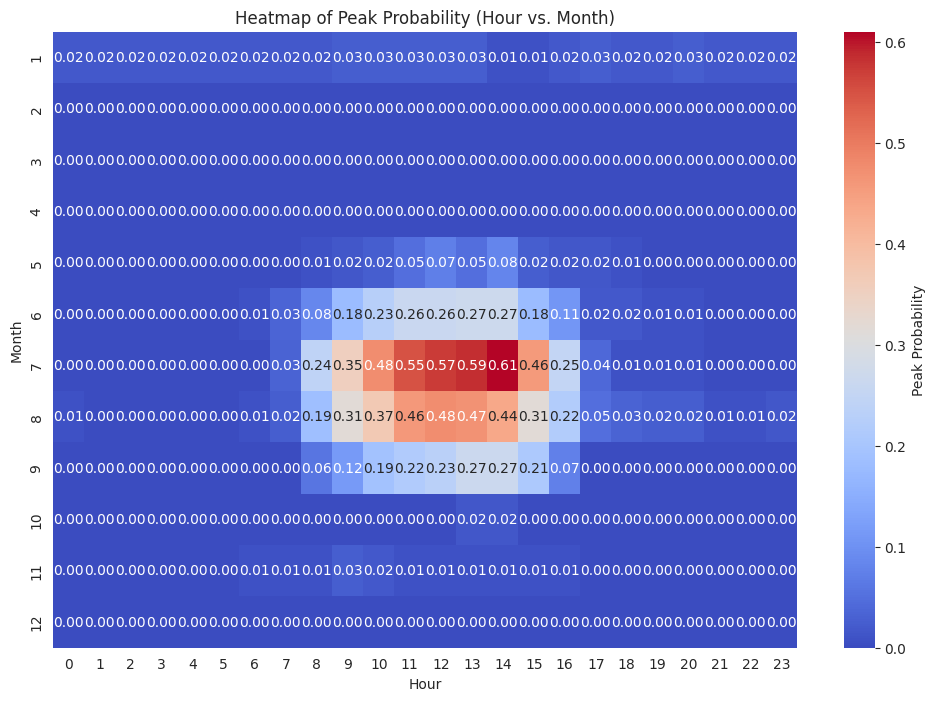

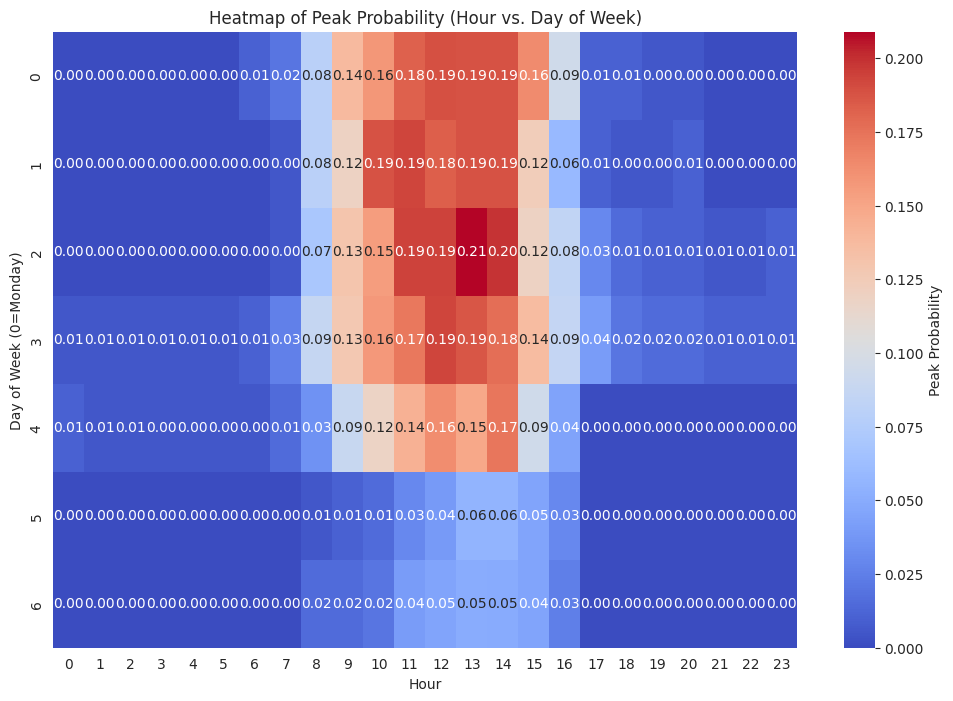

In [ ]:
# Line chart for hourly peaks with percentages added
plt.figure(figsize=(15, 10))
plt.plot(hourly_peaks['hour'], hourly_peaks['peakDayStatus'], marker='o', linestyle='-', alpha=0.7, label="Peak Probability")
plt.title("Probability of Peaks by Hour")
plt.xlabel("Hour")
plt.ylabel("Peak Probability")

# Ensure x-axis shows each hour
plt.xticks(hourly_peaks['hour'])

# Add percentages on the line
for x, y in zip(hourly_peaks['hour'], hourly_peaks['peakDayStatus']):
    plt.text(x, y + 0.005, f"{y*100:.1f}%", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Bar chart for day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofw', y='peakDayStatus', data=dayofw_peaks, palette="viridis")
plt.title("Probability of Peaks by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Peak Probability")
plt.show()

# Line chart for temperature range
plt.figure(figsize=(12, 6))
plt.plot(temp_peaks['temp_bin'].astype(str), temp_peaks['peakDayStatus'], marker='o', linestyle='-', alpha=0.7)
plt.title("Probability of Peaks by Temperature Range")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Peak Probability")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Heatmap for hour x month
heatmap_data_month = df_re.pivot_table(index='month', columns='hour', values='peakDayStatus', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_month, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Peak Probability'})
plt.title("Heatmap of Peak Probability (Hour vs. Month)")
plt.xlabel("Hour")
plt.ylabel("Month")
plt.show()

# Heatmap for hour x day of week
heatmap_data = df_re.pivot_table(index='dayofw', columns='hour', values='peakDayStatus', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Peak Probability'})
plt.title("Heatmap of Peak Probability (Hour vs. Day of Week)")
plt.xlabel("Hour")
plt.ylabel("Day of Week (0=Monday)")
plt.show()

# Running algorithm

In [ ]:
#df_re.to_csv('checkthedf_re.csv', index=False)

## Preparing data for algorithms ( data_scaled and data_scaled_load)

In [ ]:
df_N = df_re.copy()
df_Load = df_re.copy()

In [ ]:
df_N.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24', 'Date',
       'day', 'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', 'peakDayStatus',
       'Year', '1StewartSt_lag_2', '1StewartSt_lag_3', '1StewartSt_lag_4',
       '1StewartSt_lag_5', '1StewartSt_lag_6', '1StewartSt_lag_7',
       '1StewartSt_lag_17', '1StewartSt_lag_18', '1StewartSt_lag_19',
       '1StewartSt_lag_20', '1StewartSt_lag_21', '1StewartSt_lag_22',
       '1StewartSt_lag_23', '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
df_Load.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24', 'Date',
       'day', 'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', 'peakDayStatus',
       'Year', '1StewartSt_lag_2', '1StewartSt_lag_3', '1StewartSt_lag_4',
       '1StewartSt_lag_5', '1StewartSt_lag_6', '1StewartSt_lag_7',
       '1StewartSt_lag_17', '1StewartSt_lag_18', '1StewartSt_lag_19',
       '1StewartSt_lag_20', '1StewartSt_lag_21', '1StewartSt_lag_22',
       '1StewartSt_lag_23', '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
df_N = df_N.drop(columns=['Date', 'day','Year','1StewartSt'])  # forecasting peak
df_Load = df_re.drop(columns=['Date', 'day','Year','peakDayStatus']) # forecasting load then using post processing for peak

In [ ]:

# Filter dataframe for specific hours, months, and weekdays (Monday to Friday)
df_filtered = df_Load[(df_Load['hour'] >= 8) & (df_Load['hour'] <= 16) &
                   (df_Load['month'] >= 6) & (df_Load['month'] <= 9) &
                   (df_Load['dayofw'] >= 0) & (df_Load['dayofw'] <= 4)]  # 0=Monday, 4=Friday

In [ ]:
scaler1 = MinMaxScaler()
# Assume s_sc is your input series
categorical_col = 'peakDayStatus'

numerical = df_N.drop(columns=[categorical_col])
#categorical_col =s_sc['peakDayStatus']

data_scaled = pd.DataFrame(scaler1.fit_transform(numerical), columns=numerical.columns, index=numerical.index)
data_scaled['peakDayStatus'] = df_N['peakDayStatus']

In [ ]:
scaler2 = MinMaxScaler()
# Assume s_sc is your input series
#categorical_col = 'peakDayStatus'
#numerical = df_N.drop(columns=[categorical_col])
#categorical_col =s_sc['peakDayStatus']
data_scaled_load = pd.DataFrame(scaler2.fit_transform(df_Load),columns=df_Load.columns, index=df_Load.index)
#data_scaled_load['peakDayStatus'] = df_N['peakDayStatus']

In [ ]:
scaler3 = MinMaxScaler()

data_scaled_load_probable = pd.DataFrame(scaler3.fit_transform(df_filtered),columns=df_filtered.columns, index=df_filtered.index)

In [ ]:
data_scaled_load_probable

1StewartSt      temp      dwpt      rhum   hour  dayofw  month  \
3656     0.344727  0.269896  0.379447  0.643836  0.000     0.5    0.0   
3657     0.436630  0.249135  0.363636  0.657534  0.125     0.5    0.0   
3658     0.482183  0.238754  0.367589  0.684932  0.250     0.5    0.0   
3659     0.467554  0.273356  0.383399  0.643836  0.375     0.5    0.0   
3660     0.452569  0.342561  0.403162  0.547945  0.500     0.5    0.0   
...           ...       ...       ...       ...    ...     ...    ...   
32844    0.343475  0.093426  0.193676  0.657534  0.500     0.0    1.0   
32845    0.290167  0.114187  0.201581  0.630137  0.625     0.0    1.0   
32846    0.277046  0.141869  0.201581  0.575342  0.750     0.0    1.0   
32847    0.259869  0.197232  0.189723  0.465753  0.875     0.0    1.0   
32848    0.227665  0.256055  0.205534  0.397260  1.000     0.0    1.0   

       is_weekday  elec_rolling_mean_24  elec_rolling_std_24  ...  \
3656          0.0              0.523225             0.442205  ...   
3657          0.0              0.520845             0.434071  ...   
3658          0.0              0.518438             0.423888  ...   
3659          0.0              0.515222             0.410132  ...   
3660          0.0              0.512338             0.398254  ...   
...           ...                   ...                  ...  ...   
32844         0.0              0.423765             0.337987  ...   
32845         0.0              0.429604             0.345707  ...   
32846         0.0              0.436213             0.350962  ...   
32847         0.0              0.443574             0.352438  ...   
32848         0.0              0.449726             0.350866  ...   

       1StewartSt_lag_6  1StewartSt_lag_7  1StewartSt_lag_17  \
3656           0.187825          0.200397           0.557545   
3657           0.181679          0.193242           0.467992   
3658           0.211196          0.186919           0.335404   
3659           0.222092          0.217286           0.273362   
3660           0.242787          0.228496           0.241917   
...                 ...               ...                ...   
32844          0.434423          0.373595           0.124257   
32845          0.482482          0.446950           0.130416   
32846          0.436941          0.496395           0.116892   
32847          0.475905          0.449542           0.134151   
32848          0.500803          0.489629           0.144522   

       1StewartSt_lag_18  1StewartSt_lag_19  1StewartSt_lag_20  \
3656            0.576103           0.568074           0.580250   
3657            0.535058           0.573043           0.568074   
3658            0.449117           0.532216           0.573043   
3659            0.321876           0.446732           0.532216   
3660            0.262336           0.320167           0.446732   
...                  ...                ...                ...   
32844           0.111351           0.075989           0.199456   
32845           0.119245           0.110760           0.075989   
32846           0.125156           0.118612           0.110760   
32847           0.112177           0.124491           0.118612   
32848           0.128740           0.111582           0.124491   

       1StewartSt_lag_21  1StewartSt_lag_22  1StewartSt_lag_23  \
3656            0.594934           0.591751           0.546280   
3657            0.575145           0.594934           0.587361   
3658            0.563076           0.575145           0.590578   
3659            0.568002           0.563076           0.570576   
3660            0.527534           0.568002           0.558378   
...                  ...                ...                ...   
32844           0.202075           0.232129           0.250979   
32845           0.197702           0.202075           0.223870   
32846           0.075321           0.197702           0.193494   
32847           0.109785           0.075321           0.189073   
32848        

In [ ]:
data_scaled

temp      dwpt      rhum      hour    dayofw  month  is_weekday  \
0      0.425197  0.529118  0.882353  0.000000  0.666667    0.0         1.0   
1      0.426772  0.535774  0.905882  0.043478  0.666667    0.0         1.0   
2      0.411024  0.529118  0.952941  0.086957  0.666667    0.0         1.0   
3      0.417323  0.530782  0.929412  0.130435  0.666667    0.0         1.0   
4      0.412598  0.527454  0.941176  0.173913  0.666667    0.0         1.0   
...         ...       ...       ...       ...       ...    ...         ...   
35036  0.418898  0.519135  0.870588  0.869565  0.000000    1.0         1.0   
35037  0.422047  0.530782  0.905882  0.913043  0.000000    1.0         1.0   
35038  0.429921  0.539101  0.905882  0.956522  0.000000    1.0         1.0   
35039  0.425197  0.539101  0.929412  1.000000  0.000000    1.0         1.0   
35040  0.429921  0.544093  0.929412  0.000000  0.166667    1.0         1.0   

       elec_rolling_mean_24  elec_rolling_std_24  elec_rolling_mean_daily  \
0                       NaN                  NaN                 0.177217   
1                       NaN                  NaN                 0.176999   
2                       NaN                  NaN                 0.176566   
3                       NaN                  NaN                 0.176610   
4                       NaN                  NaN                 0.176573   
...                     ...                  ...                      ...   
35036              0.229812             0.018891                 0.217217   
35037              0.229933             0.018888                 0.217205   
35038              0.230193             0.018140                 0.216698   
35039              0.230402             0.017414                 0.216125   
35040              0.230380             0.017461                 0.206370   

       ...  1StewartSt_lag_7  1StewartSt_lag_17  1StewartSt_lag_18  \
0      ...               NaN                NaN                NaN   
1      ...               NaN                NaN                NaN   
2      ...               NaN                NaN                NaN   
3      ...               NaN                NaN                NaN   
4      ...               NaN                NaN                NaN   
...    ...               ...                ...                ...   
35036  ...          0.043816           0.026000           0.024933   
35037  ...          0.049142           0.025448           0.026000   
35038  ...          0.042651           0.031890           0.025448   
35039  ...          0.041264           0.037546           0.031890   
35040  ...          0.055019           0.044590           0.037546   

       1StewartSt_lag_19  1StewartSt_lag_20  1StewartSt_lag_21  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
35036           0.022945           0.029890           0.021559   
35037           0.024933           0.022945           0.029890   
35038           0.026000           0.024933           0.022945   
35039           0.025448           0.026000           0.024933   
35040           0.031890           0.025448           0.026000   

       1StewartSt_lag_22  1StewartSt_lag_23  1StewartSt_lag_24  peakDayStatus  
0                    NaN                NaN                NaN              0  
1                    NaN                NaN                NaN              0  
2                    NaN                NaN                NaN              0  
3                    NaN                NaN                NaN              0  
4                    NaN                NaN                NaN              0  
...                  ...           

In [ ]:
data_scaled_load

1StewartSt      temp      dwpt      rhum      hour    dayofw  month  \
0        0.002258  0.425197  0.529118  0.882353  0.000000  0.666667    0.0   
1        0.001853  0.426772  0.535774  0.905882  0.043478  0.666667    0.0   
2        0.000847  0.411024  0.529118  0.952941  0.086957  0.666667    0.0   
3        0.001816  0.417323  0.530782  0.929412  0.130435  0.666667    0.0   
4        0.001521  0.412598  0.527454  0.941176  0.173913  0.666667    0.0   
...           ...       ...       ...       ...       ...       ...    ...   
35036    0.038479  0.418898  0.519135  0.870588  0.869565  0.000000    1.0   
35037    0.039252  0.422047  0.530782  0.905882  0.913043  0.000000    1.0   
35038    0.028626  0.429921  0.539101  0.905882  0.956522  0.000000    1.0   
35039    0.026221  0.425197  0.539101  0.929412  1.000000  0.000000    1.0   
35040    0.029399  0.429921  0.544093  0.929412  0.000000  0.166667    1.0   

       is_weekday  elec_rolling_mean_24  elec_rolling_std_24  ...  \
0             1.0                   NaN                  NaN  ...   
1             1.0                   NaN                  NaN  ...   
2             1.0                   NaN                  NaN  ...   
3             1.0                   NaN                  NaN  ...   
4             1.0                   NaN                  NaN  ...   
...           ...                   ...                  ...  ...   
35036         1.0              0.229812             0.018891  ...   
35037         1.0              0.229933             0.018888  ...   
35038         1.0              0.230193             0.018140  ...   
35039         1.0              0.230402             0.017414  ...   
35040         1.0              0.230380             0.017461  ...   

       1StewartSt_lag_6  1StewartSt_lag_7  1StewartSt_lag_17  \
0                   NaN               NaN                NaN   
1                   NaN               NaN                NaN   
2                   NaN               NaN                NaN   
3                   NaN               NaN                NaN   
4                   NaN               NaN                NaN   
...                 ...               ...                ...   
35036          0.049142          0.043816           0.026000   
35037          0.042651          0.049142           0.025448   
35038          0.041264          0.042651           0.031890   
35039          0.055019          0.041264           0.037546   
35040          0.048442          0.055019           0.044590   

       1StewartSt_lag_18  1StewartSt_lag_19  1StewartSt_lag_20  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
35036           0.024933           0.022945           0.029890   
35037           0.026000           0.024933           0.022945   
35038           0.025448           0.026000           0.024933   
35039           0.031890           0.025448           0.026000   
35040           0.037546           0.031890           0.025448   

       1StewartSt_lag_21  1StewartSt_lag_22  1StewartSt_lag_23  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
35036           0.021559           0.022835           0.036553   
35037           0.029890           0.021559           0.022835   
35038           0.022945           0.029890           0.021559   
35039           0.0

In [ ]:
data_scaled = data_scaled.dropna()

In [ ]:
data_scaled_load = data_scaled_load.dropna()

In [ ]:
# Define a custom function to split data into training and testing sets
def split_dataset(X, y, train_ratio=0.8):
    """
    Splits the dataset into training and testing sets.

    Parameters:
        X (DataFrame): Features
        y (Series): Target variable
        train_ratio (float): Proportion of data to use for training (default is 0.8)

    Returns:
        X_train, X_test, y_train, y_test: Split datasets
    """
    # Calculate the split index
    split_index = int(len(X) * train_ratio)

    # Split the features and target
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    return X_train, X_test, y_train, y_test


In [ ]:
# Define features and target
X = data_scaled.drop(columns=['peakDayStatus']) # reference to papers that lag 1 is problamteic in forecatsing

y = data_scaled['peakDayStatus']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = split_dataset(X, y)

In [ ]:
# Define features and target
X_load = data_scaled_load.drop(columns=['1StewartSt']) # reference to papers that lag 1 is problamteic in forecatsing

y_load = data_scaled_load['1StewartSt']

# Split the data into train and test sets
X_train_L, X_test_L, y_train_L, y_test_L = split_dataset(X_load, y_load)

In [ ]:
X_train.head(20)

temp      dwpt      rhum      hour    dayofw  month  is_weekday  \
25  0.428346  0.502496  0.752941  0.043478  0.833333    0.0         0.0   
26  0.423622  0.497504  0.752941  0.086957  0.833333    0.0         0.0   
27  0.418898  0.504160  0.800000  0.130435  0.833333    0.0         0.0   
28  0.412598  0.505824  0.835294  0.173913  0.833333    0.0         0.0   
29  0.415748  0.495840  0.776471  0.217391  0.833333    0.0         0.0   
30  0.411024  0.487521  0.764706  0.260870  0.833333    0.0         0.0   
31  0.401575  0.477537  0.764706  0.304348  0.833333    0.0         0.0   
32  0.392126  0.474210  0.788235  0.347826  0.833333    0.0         0.0   
33  0.365354  0.449251  0.800000  0.391304  0.833333    0.0         0.0   
34  0.362205  0.452579  0.835294  0.434783  0.833333    0.0         0.0   
35  0.387402  0.470882  0.800000  0.478261  0.833333    0.0         0.0   
36  0.403150  0.500832  0.858824  0.521739  0.833333    0.0         0.0   
37  0.414173  0.504160  0.823529  0.565217  0.833333    0.0         0.0   
38  0.426772  0.500832  0.752941  0.608696  0.833333    0.0         0.0   
39  0.422047  0.499168  0.764706  0.652174  0.833333    0.0         0.0   
40  0.428346  0.497504  0.729412  0.695652  0.833333    0.0         0.0   
41  0.425197  0.505824  0.776471  0.739130  0.833333    0.0         0.0   
42  0.429921  0.510815  0.776471  0.782609  0.833333    0.0         0.0   
43  0.436220  0.519135  0.788235  0.826087  0.833333    0.0         0.0   
44  0.442520  0.522463  0.776471  0.869565  0.833333    0.0         0.0   

    elec_rolling_mean_24  elec_rolling_std_24  elec_rolling_mean_daily  ...  \
25              0.195826             0.005836                 0.178627  ...   
26              0.195871             0.005715                 0.178012  ...   
27              0.195935             0.005580                 0.178073  ...   
28              0.195942             0.005561                 0.177778  ...   
29              0.195907             0.005666                 0.177372  ...   
30              0.195986             0.005472                 0.177444  ...   
31              0.196072             0.005649                 0.178632  ...   
32              0.196030             0.005693                 0.178703  ...   
33              0.196091             0.005587                 0.178747  ...   
34              0.196169             0.005618                 0.179193  ...   
35              0.196198             0.005627                 0.179503  ...   
36              0.196367             0.005644                 0.179873  ...   
37              0.196431             0.005670                 0.180152  ...   
38              0.196429             0.005668                 0.180383  ...   
39              0.196616             0.005657                 0.180637  ...   
40              0.196722             0.006109                 0.181328  ...   
41              0.196653             0.005893                 0.181700  ...   
42              0.196645             0.005865                 0.182114  ...   
43              0.196665             0.005916                 0.182405  ...   
44              0.196617             0.005876                 0.182460  ...   

    1StewartSt_lag_6  1StewartSt_lag_7  1StewartSt_lag_17  1StewartSt_lag_18  \
25          0.011792          0.013914           0.005104           0.009411   
26          0.009239          0.011792           0.002699           0.005104   
27          0.008920          0.009239           0.006515           0.002699   
28          0.008920          0.008920           0.006896           0.006515   
29          0.002761          0.008920           0.005104           0.006896   
30          0.004160          0.002761           0.006933           0.005104   
31          0.002982          0.004160           0.008282           0.006933   
32          0.001853          0.002982           0.004822           0.008282   
33          0.003227          0.001853           0.0

In [ ]:
# Count rows where the value equals 1
count = (y_test == 1).sum()
print(f"Number of rows with value 1 in y_test: {count}")

Number of rows with value 1 in y_test: 83


## supervised learning algorithm ( shifting data + directly forecasting peaks = classification ), The accuarcy is very low
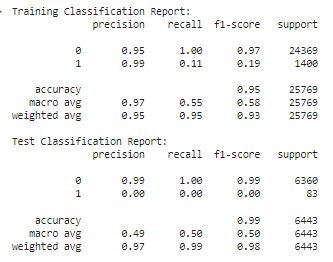

In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize and fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import numpy as np

def classification_metrics(y_true, y_pred, threshold=None):
    if threshold is not None:
        y_pred_binary = (y_pred >= threshold).astype(int)
    else:
        y_pred_binary = y_pred.astype(int)

    y_true_binary = y_true.astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) != 0 else 0  # F1 Score

    # Return all the metrics as a dictionary
    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }

In [ ]:
# Predictions from the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Define a threshold (e.g., 0.5 for binary classification)
threshold = 0.5

# Compute metrics for training data
train_metrics = classification_metrics(y_train, y_pred_train, threshold=threshold)
print("Training Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.2f}")

# Compute metrics for testing data
test_metrics = classification_metrics(y_test, y_pred_test, threshold=threshold)
print("\nTest Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")


'# Example usage of classification_metrics\n\n# Predictions from the model\ny_pred_train = model.predict(X_train)\ny_pred_test = model.predict(X_test)\n\n# Define a threshold (e.g., 0.5 for binary classification)\nthreshold = 0.5\n\n# Compute metrics for training data\ntrain_metrics = classification_metrics(y_train, y_pred_train, threshold=threshold)\nprint("Training Metrics:")\nfor key, value in train_metrics.items():\n    print(f"{key}: {value:.2f}")\n\n# Compute metrics for testing data\ntest_metrics = classification_metrics(y_test, y_pred_test, threshold=threshold)\nprint("\nTest Metrics:")\nfor key, value in test_metrics.items():\n    print(f"{key}: {value:.2f}")\n'

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     24369
           1       0.99      0.11      0.19      1400

    accuracy                           0.95     25769
   macro avg       0.97      0.55      0.58     25769
weighted avg       0.95      0.95      0.93     25769

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6360
           1       0.00      0.00      0.00        83

    accuracy                           0.99      6443
   macro avg       0.49      0.50      0.50      6443
weighted avg       0.97      0.99      0.98      6443

Confusion Matrix (Test Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


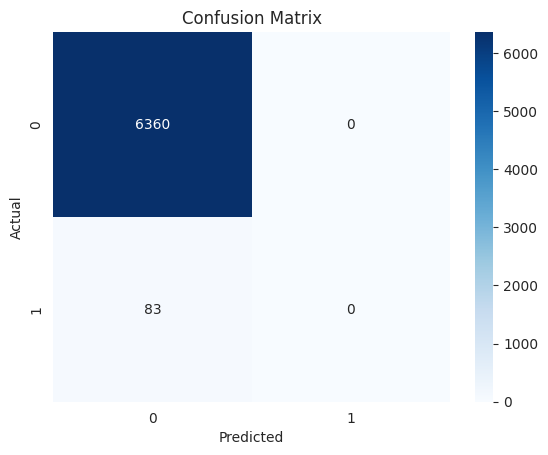

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# Define a threshold (e.g., 0.5 for binary classification)
threshold = 0.5

# Convert continuous predictions to binary predictions
y_pred_train_binary = (y_pred_train >= threshold).astype(int)
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Ensure the actual targets are also binary
y_train_binary = y_train.astype(int)
y_test_binary = y_test.astype(int)

# Use the binary predictions for classification metrics
print("Training Classification Report:")
print(classification_report(y_train_binary, y_pred_train_binary))

print("Test Classification Report:")
print(classification_report(y_test_binary, y_pred_test_binary))

# Plot confusion matrix
print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test_binary, y_pred_test_binary)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## MLP  ( shifting data + directly forecasting peaks = classification )

results:
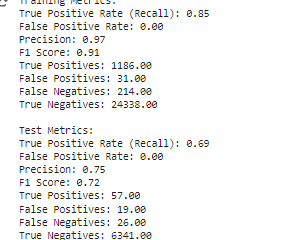


Training Metrics:
True Positive Rate (Recall): 0.85
False Positive Rate: 0.00
Precision: 0.97
F1 Score: 0.91
True Positives: 1186.00
False Positives: 31.00
False Negatives: 214.00
True Negatives: 24338.00

Test Metrics:
True Positive Rate (Recall): 0.69
False Positive Rate: 0.00
Precision: 0.75
F1 Score: 0.72
True Positives: 57.00
False Positives: 19.00
False Negatives: 26.00
True Negatives: 6341.00
Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24369
           1       0.97      0.85      0.91      1400

    accuracy                           0.99     25769
   macro avg       0.98      0.92      0.95     25769
weighted avg       0.99      0.99      0.99     25769

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6360
           1       0.75      0.69      0.72        83

    accuracy                           0.99   

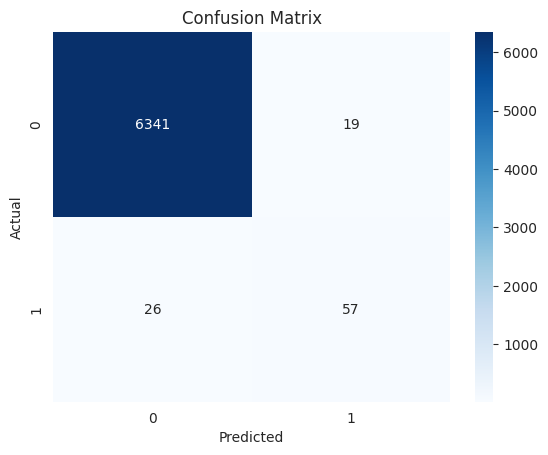

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize and fit a Multi-Layer Perceptron (MLP) classifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Custom classification metrics function
def classification_metrics(y_true, y_pred, threshold=None):
    if threshold is not None:
        y_pred_binary = (y_pred >= threshold).astype(int)
    else:
        y_pred_binary = y_pred.astype(int)

    y_true_binary = y_true.astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) != 0 else 0  # F1 Score

    # Return all the metrics as a dictionary
    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }

# Predictions from the model
y_pred_train = model.predict_proba(X_train)[:, 1]  # Use probabilities for binary classification
y_pred_test = model.predict_proba(X_test)[:, 1]

# Define a threshold (e.g., 0.5 for binary classification)
threshold = 0.5

# Compute metrics for training data
train_metrics = classification_metrics(y_train, y_pred_train, threshold=threshold)
print("Training Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.2f}")

# Compute metrics for testing data
test_metrics = classification_metrics(y_test, y_pred_test, threshold=threshold)
print("\nTest Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")

# Convert continuous predictions to binary predictions
y_pred_train_binary = (y_pred_train >= threshold).astype(int)
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Ensure the actual targets are also binary
y_train_binary = y_train.astype(int)
y_test_binary = y_test.astype(int)

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train_binary, y_pred_train_binary))

print("Test Classification Report:")
print(classification_report(y_test_binary, y_pred_test_binary))

# Plot confusion matrix for the test set
print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test_binary, y_pred_test_binary)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




## MLP with Hyperparameter optimization ( forecasting load then post precessing for peaks)

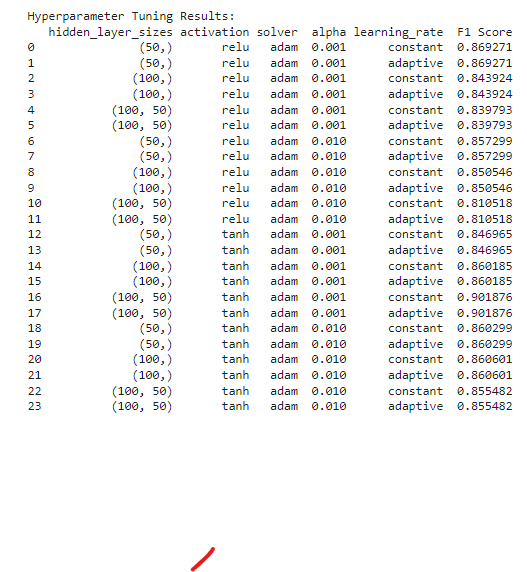

Range z score form 0.1 to 1:


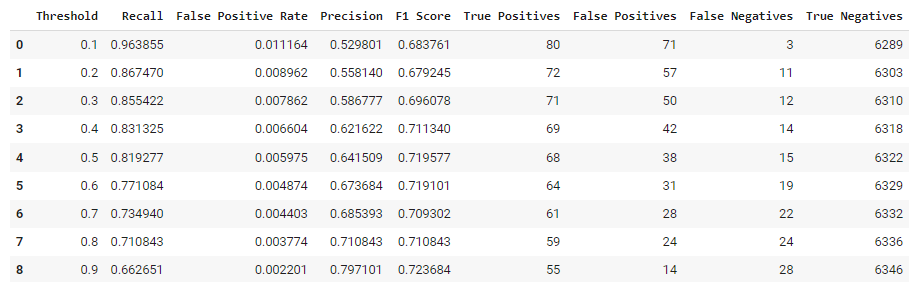

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Test different architectures
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam'],  # Optimization algorithms
    'alpha': [0.001, 0.01],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive']  # Learning rate strategies
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1 Score
    verbose=1,  # Print progress
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search
print("Performing hyperparameter optimization...")
grid_search.fit(X_train, y_train)  # Ensure this is called before accessing cv_results_

# Custom function to evaluate metrics
def evaluate_metrics(y_true, y_pred_binary):
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    accuracy = accuracy_score(y_true, y_pred_binary)
    return precision, recall, f1, accuracy

# Initialize an empty DataFrame for storing results
results_df = pd.DataFrame(columns=[
    'hidden_layer_sizes', 'activation', 'solver', 'alpha', 'learning_rate',
    'F1 Score', 'Std Dev'
])

# Iterate over grid search results and capture metrics
for i in range(len(grid_search.cv_results_['params'])):
    params = grid_search.cv_results_['params'][i]
    mean_test_score = grid_search.cv_results_['mean_test_score'][i]
    std_test_score = grid_search.cv_results_['std_test_score'][i]

    # Create a temporary DataFrame for the current row
    temp_df = pd.DataFrame([{
        'hidden_layer_sizes': params['hidden_layer_sizes'],
        'activation': params['activation'],
        'solver': params['solver'],
        'alpha': params['alpha'],
        'learning_rate': params['learning_rate'],
        'F1 Score': mean_test_score,
        'Std Dev': std_test_score
    }])

    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Display results DataFrame
print("\nHyperparameter Tuning Results:")
print(results_df)

# Save results to CSV for further analysis if needed
results_df.to_csv('hyperparameter_tuning_results.csv', index=False)


Performing hyperparameter optimization...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Hyperparameter Tuning Results:
   hidden_layer_sizes activation solver  alpha learning_rate  F1 Score  \
0               (50,)       relu   adam  0.001      constant  0.869271   
1               (50,)       relu   adam  0.001      adaptive  0.869271   
2              (100,)       relu   adam  0.001      constant  0.843924   
3              (100,)       relu   adam  0.001      adaptive  0.843924   
4           (100, 50)       relu   adam  0.001      constant  0.839793   
5           (100, 50)       relu   adam  0.001      adaptive  0.839793   
6               (50,)       relu   adam  0.010      constant  0.857299   
7               (50,)       relu   adam  0.010      adaptive  0.857299   
8              (100,)       relu   adam  0.010      constant  0.850546   
9              (100,)       relu   adam  0.010      adaptive  0.850546   
10          (100, 50)       relu   adam  0.010    

<ipython-input-86-94deb7eb0361>:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Test different architectures
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam'],  # Optimization algorithms
    'alpha': [0.001, 0.01],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive']  # Learning rate strategies
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Print progress
    n_jobs=-1  # Use all available CPU cores
)

# Custom classification metrics function
def classification_metrics(y_true, y_pred, threshold=None):
    if threshold is not None:
        y_pred_binary = (y_pred >= threshold).astype(int)
    else:
        y_pred_binary = y_pred.astype(int)

    y_true_binary = y_true.astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) != 0 else 0  # F1 Score

    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }

# Fit the grid search
print("Performing hyperparameter optimization...")
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions from the best model
y_pred_test = best_model.predict_proba(X_test)[:, 1]

# Experiment with different thresholds
print("\nThreshold Adjustment Experiment:")
thresholds = np.arange(0.1, 1.0, 0.1)
threshold_results = pd.DataFrame(columns=[
    'Threshold', 'Recall', 'False Positive Rate', 'Precision', 'F1 Score',
    'True Positives', 'False Positives', 'False Negatives', 'True Negatives'
])

for t in thresholds:
    y_pred_test_binary = (y_pred_test >= t).astype(int)
    metrics = classification_metrics(y_test, y_pred_test_binary)

    # Create a temporary DataFrame for the current threshold
    temp_df = pd.DataFrame([{
        'Threshold': t,
        'Recall': metrics["True Positive Rate (Recall)"],
        'False Positive Rate': metrics["False Positive Rate"],
        'Precision': metrics["Precision"],
        'F1 Score': metrics["F1 Score"],
        'True Positives': metrics["True Positives"],
        'False Positives': metrics["False Positives"],
        'False Negatives': metrics["False Negatives"],
        'True Negatives': metrics["True Negatives"]
    }])

    # Concatenate the temporary DataFrame with the results DataFrame
    threshold_results = pd.concat([threshold_results, temp_df], ignore_index=True)

# Display threshold results
print("\nThreshold Results:")
print(threshold_results)

# Save the threshold results to a CSV for further analysis
threshold_results.to_csv('threshold_adjustment_results.csv', index=False)


Performing hyperparameter optimization...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Threshold Adjustment Experiment:

Threshold Results:
   Threshold    Recall  False Positive Rate  Precision  F1 Score  \
0        0.1  0.963855             0.011164   0.529801  0.683761   
1        0.2  0.867470             0.008962   0.558140  0.679245   
2        0.3  0.855422             0.007862   0.586777  0.696078   
3        0.4  0.831325             0.006604   0.621622  0.711340   
4        0.5  0.819277             0.005975   0.641509  0.719577   
5        0.6  0.771084             0.004874   0.673684  0.719101   
6        0.7  0.734940             0.004403   0.685393  0.709302   
7        0.8  0.710843             0.003774   0.710843  0.710843   
8        0.9  0.662651             0.002201   0.797101  0.723684   

  True Positives False Positives False Negatives True Negatives  
0             80              71               3           6289  
1             72             

<ipython-input-87-b71b0acf2c96>:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_results = pd.concat([threshold_results, temp_df], ignore_index=True)


In [ ]:
threshold_results

Threshold    Recall  False Positive Rate  Precision  F1 Score  \
0        0.1  0.963855             0.011164   0.529801  0.683761   
1        0.2  0.867470             0.008962   0.558140  0.679245   
2        0.3  0.855422             0.007862   0.586777  0.696078   
3        0.4  0.831325             0.006604   0.621622  0.711340   
4        0.5  0.819277             0.005975   0.641509  0.719577   
5        0.6  0.771084             0.004874   0.673684  0.719101   
6        0.7  0.734940             0.004403   0.685393  0.709302   
7        0.8  0.710843             0.003774   0.710843  0.710843   
8        0.9  0.662651             0.002201   0.797101  0.723684   

  True Positives False Positives False Negatives True Negatives  
0             80              71               3           6289  
1             72              57              11           6303  
2             71              50              12           6310  
3             69              42              14           6318  
4             68              38              15           6322  
5             64              31              19           6329  
6             61              28              22           6332  
7             59              24              24           6336  
8             55              14              28           6346

Threshold 0.1:

Recall (95.18%): High recall, meaning the model captures most of the 1s in the test set (79 out of 83 True Positives).
Precision (40.93%): Low precision, indicating a high number of False Positives (114).
Interpretation: The model is overly inclusive, predicting many 1s, which leads to capturing most actual 1s (high recall) but with many incorrect predictions (low precision).
Threshold 0.5 (Default):

Recall (74.70%): The model captures 62 out of 83 1s, missing 21 (False Negatives).
Precision (70.45%): Better precision than lower thresholds, with only 26 False Positives.
F1 Score (72.51%): Balanced trade-off between precision and recall.
Interpretation: This threshold offers a middle ground, balancing False Positives and False Negatives.
Threshold 0.9:

Recall (37.35%): Very low recall, capturing only 31 out of 83 1s, and missing 52.
Precision (86.11%): High precision, as False Positives are minimized (only 5).
Interpretation: The model is very selective, predicting 1s only when it is highly confident, resulting in many missed 1s (low recall).

1. Recall and Precision Trade-Off:
Lower thresholds prioritize recall, capturing most 1s but at the cost of precision (more False Positives).
Higher thresholds prioritize precision, reducing False Positives but missing many 1s (lower recall).
2. True Positives (TP):
The maximum achievable TP is 83 (all 1s in the test set).
At a threshold of 0.1, the model achieves 79 TP.
As the threshold increases, the TP decreases due to higher confidence requirements.
3. False Positives (FP):
False Positives drop significantly as the threshold increases:
From 114 (threshold 0.1) to just 5 (threshold 0.9).
This improvement comes at the expense of recall.
4. F1 Score:
The highest F1 Score is 73.29% at threshold 0.6, indicating the best balance between precision and recall.

Training the ensemble model...

Ensemble Model Evaluation:
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6360
           1       0.73      0.75      0.74        83

    accuracy                           0.99      6443
   macro avg       0.86      0.87      0.87      6443
weighted avg       0.99      0.99      0.99      6443



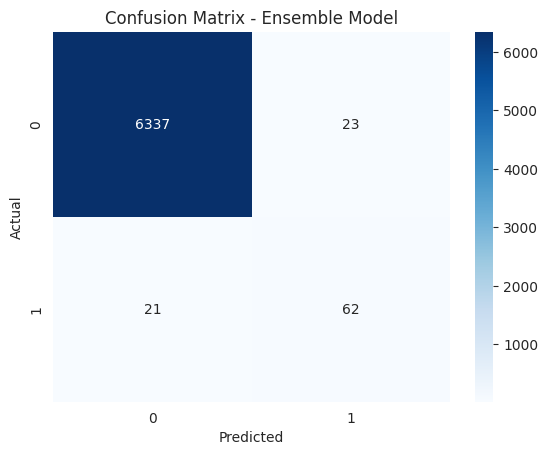


Threshold Adjustment Experiment:

Threshold Results:
   Threshold    Recall  False Positive Rate  Precision  F1 Score  \
0        0.1  1.000000             0.018711   0.410891  0.582456   
1        0.2  0.951807             0.013994   0.470238  0.629482   
2        0.3  0.891566             0.011792   0.496644  0.637931   
3        0.4  0.819277             0.008019   0.571429  0.673267   
4        0.5  0.746988             0.003616   0.729412  0.738095   
5        0.6  0.698795             0.001730   0.840580  0.763158   
6        0.7  0.566265             0.000629   0.921569  0.701493   
7        0.8  0.445783             0.000314   0.948718  0.606557   
8        0.9  0.289157             0.000157   0.960000  0.444444   

  True Positives False Positives False Negatives True Negatives  
0             83             119               0           6241  
1             79              89               4           6271  
2             74              75               9           6285  
3

<ipython-input-80-70f0f5fdf320>:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_results = pd.concat([threshold_results, temp_df], ignore_index=True)


In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define base models
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Create an ensemble model
ensemble = VotingClassifier(estimators=[('mlp', mlp), ('rf', rf), ('dt', dt)], voting='soft')

# Train the ensemble model
print("Training the ensemble model...")
ensemble.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_test = ensemble.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Define a threshold (default = 0.5)
threshold = 0.5
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Evaluate the ensemble model
print("\nEnsemble Model Evaluation:")
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_binary))

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_binary)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

# Experiment with Different Thresholds
print("\nThreshold Adjustment Experiment:")
thresholds = np.arange(0.1, 1.0, 0.1)
threshold_results = pd.DataFrame(columns=[
    'Threshold', 'Recall', 'False Positive Rate', 'Precision', 'F1 Score',
    'True Positives', 'False Positives', 'False Negatives', 'True Negatives'
])

for t in thresholds:
    y_pred_test_binary = (y_pred_test >= t).astype(int)
    metrics = classification_metrics(y_test, y_pred_test_binary)

    # Create a temporary DataFrame for the current threshold
    temp_df = pd.DataFrame([{
        'Threshold': t,
        'Recall': metrics["True Positive Rate (Recall)"],
        'False Positive Rate': metrics["False Positive Rate"],
        'Precision': metrics["Precision"],
        'F1 Score': metrics["F1 Score"],
        'True Positives': metrics["True Positives"],
        'False Positives': metrics["False Positives"],
        'False Negatives': metrics["False Negatives"],
        'True Negatives': metrics["True Negatives"]
    }])

    # Concatenate the temporary DataFrame with the results DataFrame
    threshold_results = pd.concat([threshold_results, temp_df], ignore_index=True)

# Display threshold results
print("\nThreshold Results:")
print(threshold_results)



In [ ]:
threshold_results

Threshold    Recall  False Positive Rate  Precision  F1 Score  \
0        0.1  1.000000             0.018711   0.410891  0.582456   
1        0.2  0.951807             0.013994   0.470238  0.629482   
2        0.3  0.891566             0.011792   0.496644  0.637931   
3        0.4  0.819277             0.008019   0.571429  0.673267   
4        0.5  0.746988             0.003616   0.729412  0.738095   
5        0.6  0.698795             0.001730   0.840580  0.763158   
6        0.7  0.566265             0.000629   0.921569  0.701493   
7        0.8  0.445783             0.000314   0.948718  0.606557   
8        0.9  0.289157             0.000157   0.960000  0.444444   

  True Positives False Positives False Negatives True Negatives  
0             83             119               0           6241  
1             79              89               4           6271  
2             74              75               9           6285  
3             68              51              15           6309  
4             62              23              21           6337  
5             58              11              25           6349  
6             47               4              36           6356  
7             37               2              46           6358  
8             24               1              59           6359

## Adding imbalance method ( oversampling)

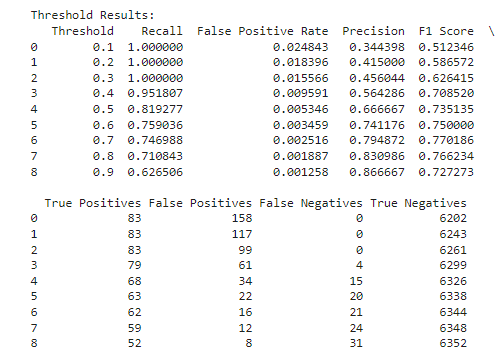

In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.4 MB/s eta 0:00:00


Applying ADASYN for oversampling...

Class distribution after ADASYN oversampling:
peakDayStatus
0    24369
1    24228
Name: count, dtype: int64

Training the ensemble model...

Ensemble Model Evaluation with ADASYN Oversampling:
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6360
           1       0.67      0.82      0.74        83

    accuracy                           0.99      6443
   macro avg       0.83      0.91      0.87      6443
weighted avg       0.99      0.99      0.99      6443



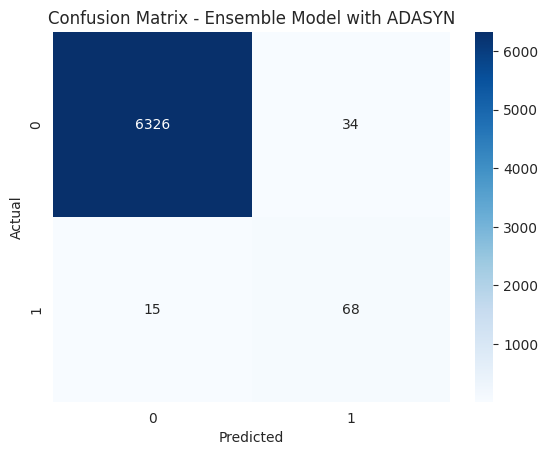


Threshold Adjustment Experiment:

Threshold Results:
   Threshold    Recall  False Positive Rate  Precision  F1 Score  \
0        0.1  1.000000             0.024843   0.344398  0.512346   
1        0.2  1.000000             0.018396   0.415000  0.586572   
2        0.3  1.000000             0.015566   0.456044  0.626415   
3        0.4  0.951807             0.009591   0.564286  0.708520   
4        0.5  0.819277             0.005346   0.666667  0.735135   
5        0.6  0.759036             0.003459   0.741176  0.750000   
6        0.7  0.746988             0.002516   0.794872  0.770186   
7        0.8  0.710843             0.001887   0.830986  0.766234   
8        0.9  0.626506             0.001258   0.866667  0.727273   

  True Positives False Positives False Negatives True Negatives  
0             83             158               0           6202  
1             83             117               0           6243  
2             83              99               0           6261  
3

<ipython-input-84-04940956eb00>:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_results = pd.concat([threshold_results, temp_df], ignore_index=True)


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Perform advanced oversampling with ADASYN
print("Applying ADASYN for oversampling...")
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after ADASYN oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Define base models
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Create an ensemble model
ensemble = VotingClassifier(estimators=[('mlp', mlp), ('rf', rf), ('dt', dt)], voting='soft')

# Train the ensemble model
print("\nTraining the ensemble model...")
ensemble.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for the test set
y_pred_test = ensemble.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Define a threshold (default = 0.5)
threshold = 0.5
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Evaluate the ensemble model
print("\nEnsemble Model Evaluation with ADASYN Oversampling:")
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_binary))

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_binary)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Model with ADASYN')
plt.show()

# Experiment with Different Thresholds
print("\nThreshold Adjustment Experiment:")
thresholds = np.arange(0.1, 1.0, 0.1)
threshold_results = pd.DataFrame(columns=[
    'Threshold', 'Recall', 'False Positive Rate', 'Precision', 'F1 Score',
    'True Positives', 'False Positives', 'False Negatives', 'True Negatives'
])

for t in thresholds:
    y_pred_test_binary = (y_pred_test >= t).astype(int)
    metrics = classification_metrics(y_test, y_pred_test_binary)

    # Create a temporary DataFrame for the current threshold
    temp_df = pd.DataFrame([{
        'Threshold': t,
        'Recall': metrics["True Positive Rate (Recall)"],
        'False Positive Rate': metrics["False Positive Rate"],
        'Precision': metrics["Precision"],
        'F1 Score': metrics["F1 Score"],
        'True Positives': metrics["True Positives"],
        'False Positives': metrics["False Positives"],
        'False Negatives': metrics["False Negatives"],
        'True Negatives': metrics["True Negatives"]
    }])

    # Concatenate the temporary DataFrame with the results DataFrame
    threshold_results = pd.concat([threshold_results, temp_df], ignore_index=True)

# Display threshold results
print("\nThreshold Results:")
print(threshold_results)

# Save the threshold results to a CSV for further analysis
threshold_results.to_csv('ensemble_with_adasyn_threshold_results.csv', index=False)

False Negatives (FN): Missing a peak (FN) is critical, as these are the periods where the highest costs occur. Minimizing FN is essential.
False Positives (FP): While less critical than FN, excessive FP leads to unnecessary action during non-peak periods, which can waste resources and disrupt operations.
True Positives (TP): Accurately identifying true peaks is the primary goal.
Aggressiveness: The model should err on the side of caution by being more aggressive in predicting potential peaks, especially when FN is near-zero.



Model 0:
FN = 0 (perfect recall), but FP = 158, meaning a high rate of false alarms.
Aggressive but resource-intensive due to excessive FP.
Model 1:
FN = 0, FP = 117. A balance of perfect recall with fewer FP than Model 0.
Model 3:
FN = 4, FP = 61. Reduced FP significantly but introduces a few FN, which could miss some critical peaks.
Model 4:
FN = 15, FP = 34. FN starts becoming significant, which is risky for peak shaving purposes.
Model 8:
FN = 31, FP = 8. FN is high, meaning the model misses many peaks, making it less reliable for this task.

Primary Choice: Model 1

FN = 0 ensures no missed peaks.
FP = 117 is tolerable for a proactive strategy in peak shaving, where avoiding missed peaks is more critical than reducing FP.
Perfect recall (all TP) makes it a safer choice for minimizing costs.
Secondary Choice: Model 3

FN = 4 introduces slight risk but significantly reduces FP (61), which is advantageous for balancing accuracy and operational costs.
If operational resources are a concern, this model might be preferred.

In [ ]:
threshold_results

Threshold    Recall  False Positive Rate  Precision  F1 Score  \
0        0.1  1.000000             0.024843   0.344398  0.512346   
1        0.2  1.000000             0.018396   0.415000  0.586572   
2        0.3  1.000000             0.015566   0.456044  0.626415   
3        0.4  0.951807             0.009591   0.564286  0.708520   
4        0.5  0.819277             0.005346   0.666667  0.735135   
5        0.6  0.759036             0.003459   0.741176  0.750000   
6        0.7  0.746988             0.002516   0.794872  0.770186   
7        0.8  0.710843             0.001887   0.830986  0.766234   
8        0.9  0.626506             0.001258   0.866667  0.727273   

  True Positives False Positives False Negatives True Negatives  
0             83             158               0           6202  
1             83             117               0           6243  
2             83              99               0           6261  
3             79              61               4           6299  
4             68              34              15           6326  
5             63              22              20           6338  
6             62              16              21           6344  
7             59              12              24           6348  
8             52               8              31           6352

In [ ]:
from imblearn.combine import SMOTEENN

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution before oversampling:
peakDayStatus
0    24369
1     1400
Name: count, dtype: int64

Class distribution after oversampling:
[24369 24369]
Training Metrics:
True Positive Rate (Recall): 0.99
False Positive Rate: 0.01
Precision: 0.86
F1 Score: 0.92
True Positives: 1391.00
False Positives: 234.00
False Negatives: 9.00
True Negatives: 24135.00

Test Metrics:
True Positive Rate (Recall): 1.00
False Positive Rate: 0.01
Precision: 0.60
F1 Score: 0.75
True Positives: 83.00
False Positives: 55.00
False Negatives: 0.00
True Negatives: 6305.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24369
           1       0.86      0.99      0.92      1400

    accuracy                           0.99     25769
   macro avg       0.93      0.99      0.96     25769
weighted avg       0.99      0.99      0.99     25769

Test Classification Report:
              precision    recall  f1-score   support

 

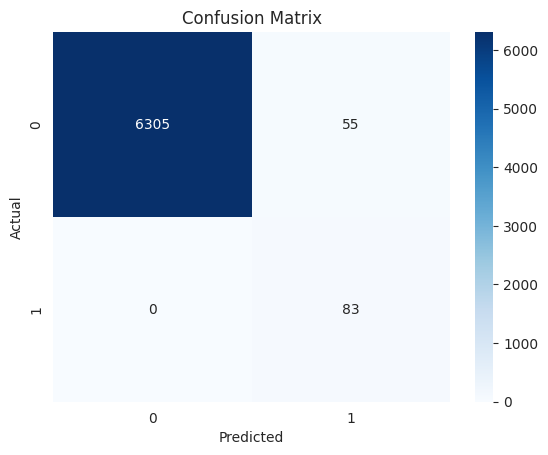

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("Class distribution before oversampling:")
print(y_train.value_counts())
print("\nClass distribution after oversampling:")
print(np.bincount(y_train_resampled))

# Initialize and fit a Multi-Layer Perceptron (MLP) classifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_resampled, y_train_resampled)


# Predictions from the model
y_pred_train = model.predict_proba(X_train)[:, 1]  # Use probabilities for binary classification
y_pred_test = model.predict_proba(X_test)[:, 1]

# Define a threshold (e.g., 0.5 for binary classification)
threshold = 0.5

# Compute metrics for training data
train_metrics = classification_metrics(y_train, y_pred_train, threshold=threshold)
print("Training Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.2f}")

# Compute metrics for testing data
test_metrics = classification_metrics(y_test, y_pred_test, threshold=threshold)
print("\nTest Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")

# Convert continuous predictions to binary predictions
y_pred_train_binary = (y_pred_train >= threshold).astype(int)
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Ensure the actual targets are also binary
y_train_binary = y_train.astype(int)
y_test_binary = y_test.astype(int)

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train_binary, y_pred_train_binary))

print("Test Classification Report:")
print(classification_report(y_test_binary, y_pred_test_binary))

# Plot confusion matrix for the test set
print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test_binary, y_pred_test_binary)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## forecasting load then using post processing for knowing if  its a peak

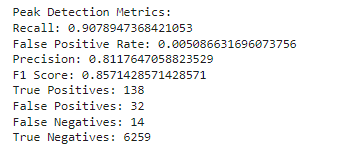

In [ ]:
data_scaled_load

1StewartSt      temp      dwpt      rhum      hour    dayofw  month  \
25       0.002982  0.428346  0.502496  0.752941  0.043478  0.833333    0.0   
26       0.001853  0.423622  0.497504  0.752941  0.086957  0.833333    0.0   
27       0.003227  0.418898  0.504160  0.800000  0.130435  0.833333    0.0   
28       0.001681  0.412598  0.505824  0.835294  0.173913  0.833333    0.0   
29       0.000515  0.415748  0.495840  0.776471  0.217391  0.833333    0.0   
...           ...       ...       ...       ...       ...       ...    ...   
35035    0.047841  0.429921  0.524126  0.835294  0.826087  0.000000    1.0   
35036    0.038479  0.418898  0.519135  0.870588  0.869565  0.000000    1.0   
35037    0.039252  0.422047  0.530782  0.905882  0.913043  0.000000    1.0   
35038    0.028626  0.429921  0.539101  0.905882  0.956522  0.000000    1.0   
35039    0.026221  0.425197  0.539101  0.929412  1.000000  0.000000    1.0   

       is_weekday  elec_rolling_mean_24  elec_rolling_std_24  ...  \
25            0.0              0.195826             0.005836  ...   
26            0.0              0.195871             0.005715  ...   
27            0.0              0.195935             0.005580  ...   
28            0.0              0.195942             0.005561  ...   
29            0.0              0.195907             0.005666  ...   
...           ...                   ...                  ...  ...   
35035         1.0              0.229546             0.019029  ...   
35036         1.0              0.229812             0.018891  ...   
35037         1.0              0.229933             0.018888  ...   
35038         1.0              0.230193             0.018140  ...   
35039         1.0              0.230402             0.017414  ...   

       1StewartSt_lag_6  1StewartSt_lag_7  1StewartSt_lag_17  \
25             0.011792          0.013914           0.005104   
26             0.009239          0.011792           0.002699   
27             0.008920          0.009239           0.006515   
28             0.008920          0.008920           0.006896   
29             0.002761          0.008920           0.005104   
...                 ...               ...                ...   
35035          0.043816          0.045436           0.024933   
35036          0.049142          0.043816           0.026000   
35037          0.042651          0.049142           0.025448   
35038          0.041264          0.042651           0.031890   
35039          0.055019          0.041264           0.037546   

       1StewartSt_lag_18  1StewartSt_lag_19  1StewartSt_lag_20  \
25              0.009411           0.001104           0.001288   
26              0.005104           0.009411           0.001104   
27              0.002699           0.005104           0.009411   
28              0.006515           0.002699           0.005104   
29              0.006896           0.006515           0.002699   
...                  ...                ...                ...   
35035           0.022945           0.029890           0.021559   
35036           0.024933           0.022945           0.029890   
35037           0.026000           0.024933           0.022945   
35038           0.025448           0.026000           0.024933   
35039           0.031890           0.025448           0.026000   

       1StewartSt_lag_21  1StewartSt_lag_22  1StewartSt_lag_23  \
25              0.001521           0.001816           0.000847   
26              0.001288           0.001521           0.001816   
27              0.001104           0.001288           0.001521   
28              0.009411           0.001104           0.001288   
29              0.005104           0.009411           0.001104   
...                  ...                ...                ...   
35035           0.022835           0.036553           0.032553   
35036           0.021559           0.022835           0.036553   
35037           0.029890           0.021559           0.022835   
35038           0.0

Training the MLP Regressor for Load Forecasting...
Testing RMSE: 0.02, R²: 0.98

Identifying Peaks Using Z-Score Post-Processing...

Peak Detection Metrics:
Recall: 0.9078947368421053
False Positive Rate: 0.005086631696073756
Precision: 0.8117647058823529
F1 Score: 0.8571428571428571
True Positives: 138
False Positives: 32
False Negatives: 14
True Negatives: 6259


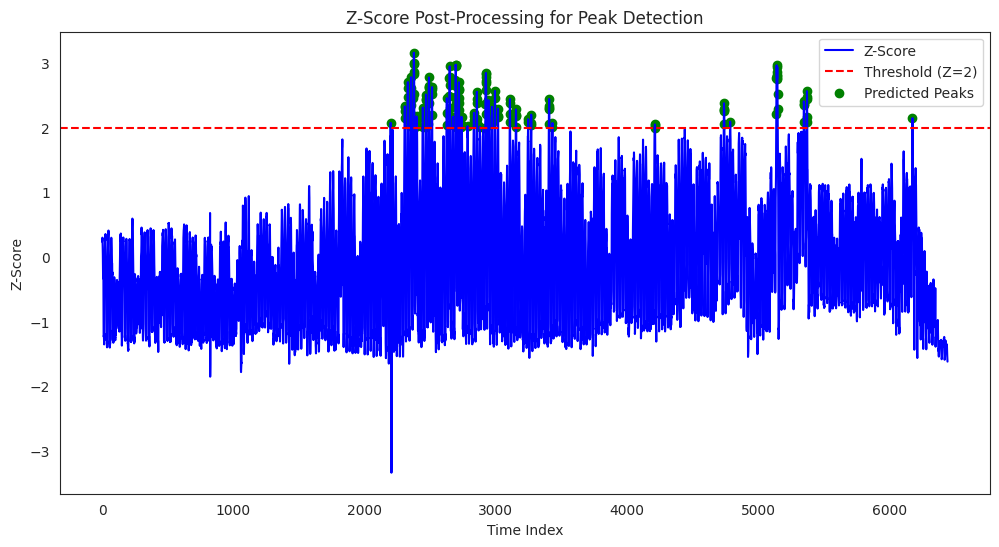

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define classification metrics function
def classification_metrics(y_true, y_pred):
    y_true_binary = y_true.astype(int)
    y_pred_binary = y_pred.astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) != 0 else 0  # F1 Score

    return {
        "Recall": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }

# Define features and target
X_load = data_scaled_load.drop(columns=['1StewartSt'])  # Drop the target column
y_load = data_scaled_load['1StewartSt']  # Target column

# Split the data into train and test sets
X_train_L, X_test_L, y_train_L, y_test_L = split_dataset(X_load, y_load)

# Train the MLPRegressor
print("Training the MLP Regressor for Load Forecasting...")
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_regressor.fit(X_train_L, y_train_L)

# Predict load for train and test sets
y_test_pred_L = mlp_regressor.predict(X_test_L)

# Calculate performance metrics for load forecasting
test_rmse = np.sqrt(mean_squared_error(y_test_L, y_test_pred_L))
test_r2 = r2_score(y_test_L, y_test_pred_L)

print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Apply Z-score Post-Processing to Identify Peaks
print("\nIdentifying Peaks Using Z-Score Post-Processing...")
mean_load = np.mean(y_test_pred_L)
std_load = np.std(y_test_pred_L)

# Calculate Z-scores
z_scores = (y_test_pred_L - mean_load) / std_load

# Identify peaks based on Z-score threshold
z_score_threshold = 2  # Z-score threshold for peaks
predicted_peaks = (z_scores > z_score_threshold).astype(int)

# Identify actual peaks in the ground truth
actual_peaks = (y_test_L > (mean_load + 2 * std_load)).astype(int)

# Evaluate peak detection using classification metrics
metrics = classification_metrics(actual_peaks, predicted_peaks)

print("\nPeak Detection Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value}")

# Plot Z-scores and predicted peaks
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Z-Score', color='blue')
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Post-Processing for Peak Detection')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


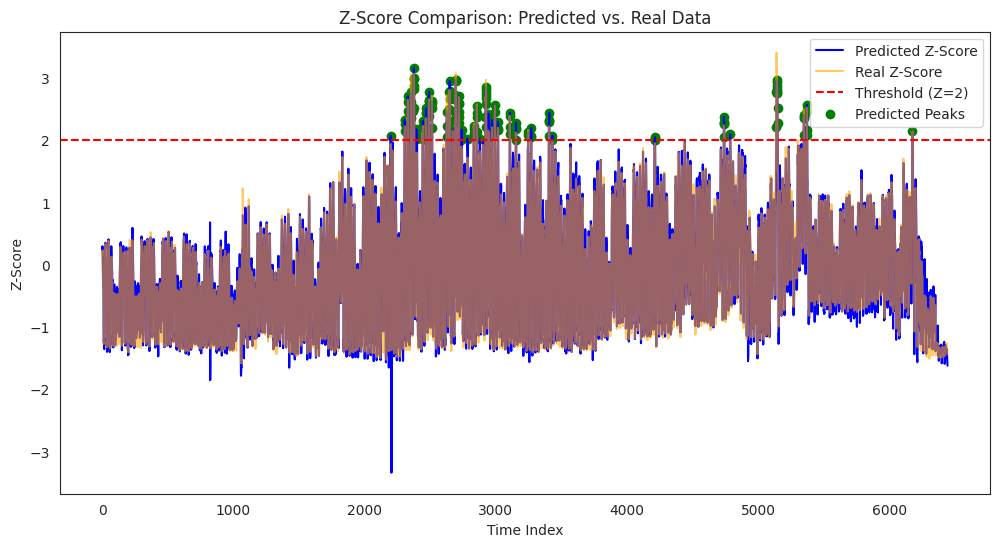

In [ ]:
# Calculate Z-scores for real data
z_scores_real = (y_test_L - mean_load) / std_load

# Plot Z-scores for predicted and real data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Predicted Z-Score', color='blue')
plt.plot(range(len(y_test_L)), z_scores_real, label='Real Z-Score', color='orange', alpha=0.6)
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Comparison: Predicted vs. Real Data')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


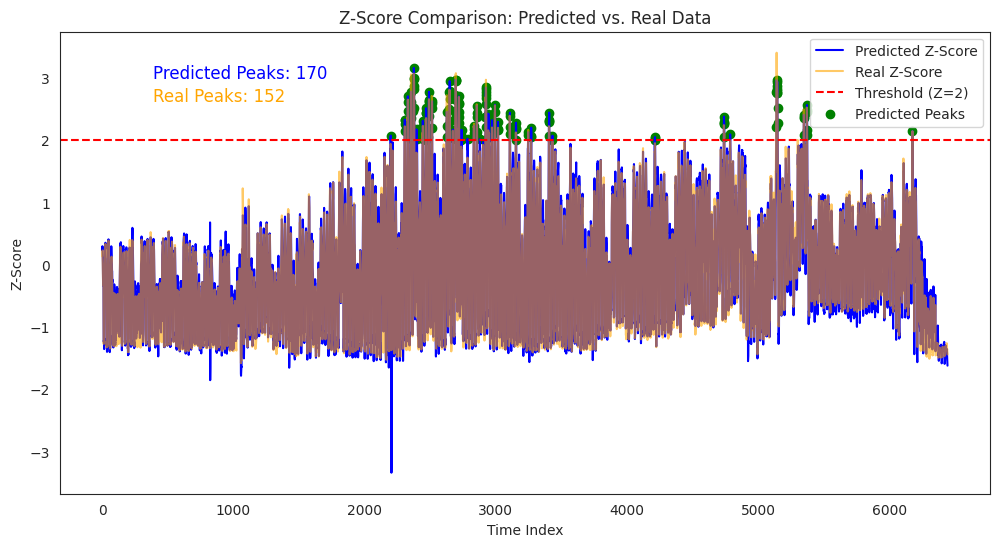

Number of Predicted Peaks: 170
Number of Real Peaks: 152


In [ ]:
# Calculate Z-scores for real data
z_scores_real = (y_test_L - mean_load) / std_load

# Count peaks in predicted and real data
num_predicted_peaks = np.sum(predicted_peaks)
num_real_peaks = np.sum(actual_peaks)

# Plot Z-scores for predicted and real data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Predicted Z-Score', color='blue')
plt.plot(range(len(y_test_L)), z_scores_real, label='Real Z-Score', color='orange', alpha=0.6)
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Comparison: Predicted vs. Real Data')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')

# Annotate the number of peaks
plt.text(0.1, 0.9, f"Predicted Peaks: {num_predicted_peaks}", transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.1, 0.85, f"Real Peaks: {num_real_peaks}", transform=plt.gca().transAxes, fontsize=12, color='orange')

plt.legend()
plt.show()

# Display the counts in text format as well
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Real Peaks: {num_real_peaks}")


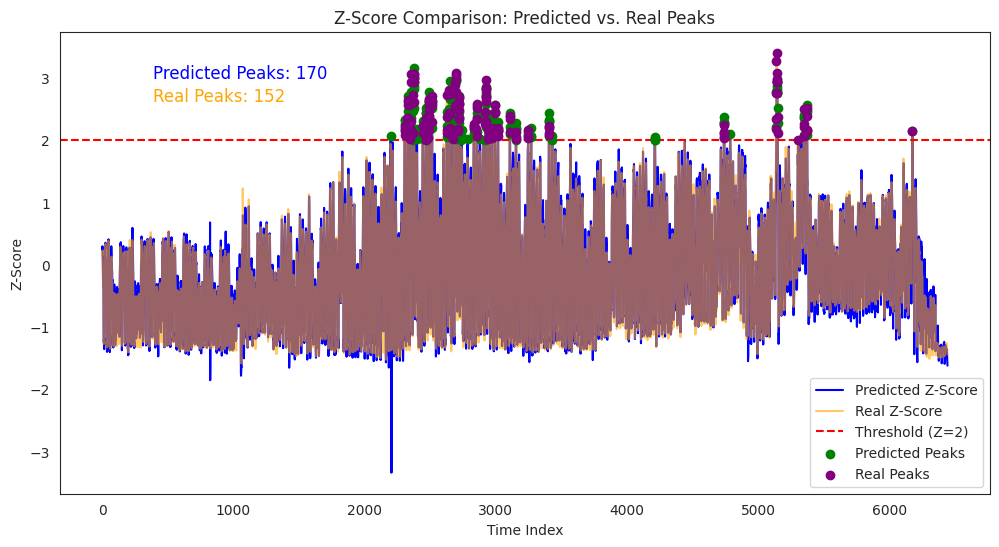

Number of Predicted Peaks: 170
Number of Real Peaks: 152


In [ ]:
# Calculate Z-scores for real data
z_scores_real = (y_test_L - mean_load) / std_load

# Count peaks in predicted and real data
num_predicted_peaks = np.sum(predicted_peaks)
num_real_peaks = np.sum(actual_peaks)

# Plot Z-scores for predicted and real data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Predicted Z-Score', color='blue')
plt.plot(range(len(y_test_L)), z_scores_real, label='Real Z-Score', color='orange', alpha=0.6)
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')

# Add scatter points for predicted and real peaks
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1],
            color='green', label='Predicted Peaks', zorder=5)
plt.scatter(np.where(actual_peaks == 1), z_scores_real[actual_peaks == 1],
            color='purple', label='Real Peaks', zorder=5)

# Annotate the number of peaks
plt.text(0.1, 0.9, f"Predicted Peaks: {num_predicted_peaks}", transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.1, 0.85, f"Real Peaks: {num_real_peaks}", transform=plt.gca().transAxes, fontsize=12, color='orange')

# Add title, labels, and legend
plt.title('Z-Score Comparison: Predicted vs. Real Peaks')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

# Display the counts in text format as well
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Real Peaks: {num_real_peaks}")


##  forecasting load then using post processing, using probbale peak times

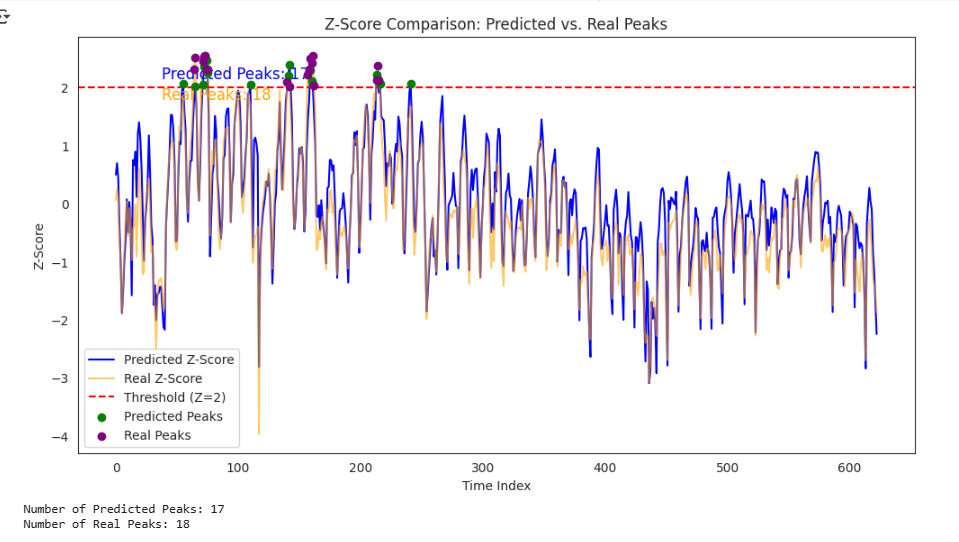

In [ ]:
data_scaled_load_probable

1StewartSt      temp      dwpt      rhum   hour  dayofw  month  \
3656     0.344727  0.269896  0.379447  0.643836  0.000     0.5    0.0   
3657     0.436630  0.249135  0.363636  0.657534  0.125     0.5    0.0   
3658     0.482183  0.238754  0.367589  0.684932  0.250     0.5    0.0   
3659     0.467554  0.273356  0.383399  0.643836  0.375     0.5    0.0   
3660     0.452569  0.342561  0.403162  0.547945  0.500     0.5    0.0   
...           ...       ...       ...       ...    ...     ...    ...   
32844    0.343475  0.093426  0.193676  0.657534  0.500     0.0    1.0   
32845    0.290167  0.114187  0.201581  0.630137  0.625     0.0    1.0   
32846    0.277046  0.141869  0.201581  0.575342  0.750     0.0    1.0   
32847    0.259869  0.197232  0.189723  0.465753  0.875     0.0    1.0   
32848    0.227665  0.256055  0.205534  0.397260  1.000     0.0    1.0   

       is_weekday  elec_rolling_mean_24  elec_rolling_std_24  ...  \
3656          0.0              0.523225             0.442205  ...   
3657          0.0              0.520845             0.434071  ...   
3658          0.0              0.518438             0.423888  ...   
3659          0.0              0.515222             0.410132  ...   
3660          0.0              0.512338             0.398254  ...   
...           ...                   ...                  ...  ...   
32844         0.0              0.423765             0.337987  ...   
32845         0.0              0.429604             0.345707  ...   
32846         0.0              0.436213             0.350962  ...   
32847         0.0              0.443574             0.352438  ...   
32848         0.0              0.449726             0.350866  ...   

       1StewartSt_lag_6  1StewartSt_lag_7  1StewartSt_lag_17  \
3656           0.187825          0.200397           0.557545   
3657           0.181679          0.193242           0.467992   
3658           0.211196          0.186919           0.335404   
3659           0.222092          0.217286           0.273362   
3660           0.242787          0.228496           0.241917   
...                 ...               ...                ...   
32844          0.434423          0.373595           0.124257   
32845          0.482482          0.446950           0.130416   
32846          0.436941          0.496395           0.116892   
32847          0.475905          0.449542           0.134151   
32848          0.500803          0.489629           0.144522   

       1StewartSt_lag_18  1StewartSt_lag_19  1StewartSt_lag_20  \
3656            0.576103           0.568074           0.580250   
3657            0.535058           0.573043           0.568074   
3658            0.449117           0.532216           0.573043   
3659            0.321876           0.446732           0.532216   
3660            0.262336           0.320167           0.446732   
...                  ...                ...                ...   
32844           0.111351           0.075989           0.199456   
32845           0.119245           0.110760           0.075989   
32846           0.125156           0.118612           0.110760   
32847           0.112177           0.124491           0.118612   
32848           0.128740           0.111582           0.124491   

       1StewartSt_lag_21  1StewartSt_lag_22  1StewartSt_lag_23  \
3656            0.594934           0.591751           0.546280   
3657            0.575145           0.594934           0.587361   
3658            0.563076           0.575145           0.590578   
3659            0.568002           0.563076           0.570576   
3660            0.527534           0.568002           0.558378   
...                  ...                ...                ...   
32844           0.202075           0.232129           0.250979   
32845           0.197702           0.202075           0.223870   
32846           0.075321           0.197702           0.193494   
32847           0.109785           0.075321           0.189073   
32848        

Training the MLP Regressor for Load Forecasting...
Testing RMSE: 0.04, R²: 0.84

Identifying Peaks Using Z-Score Post-Processing...

Peak Detection Metrics:
Recall: 0.6666666666666666
False Positive Rate: 0.008264462809917356
Precision: 0.7058823529411765
F1 Score: 0.6857142857142857
True Positives: 12
False Positives: 5
False Negatives: 6
True Negatives: 600


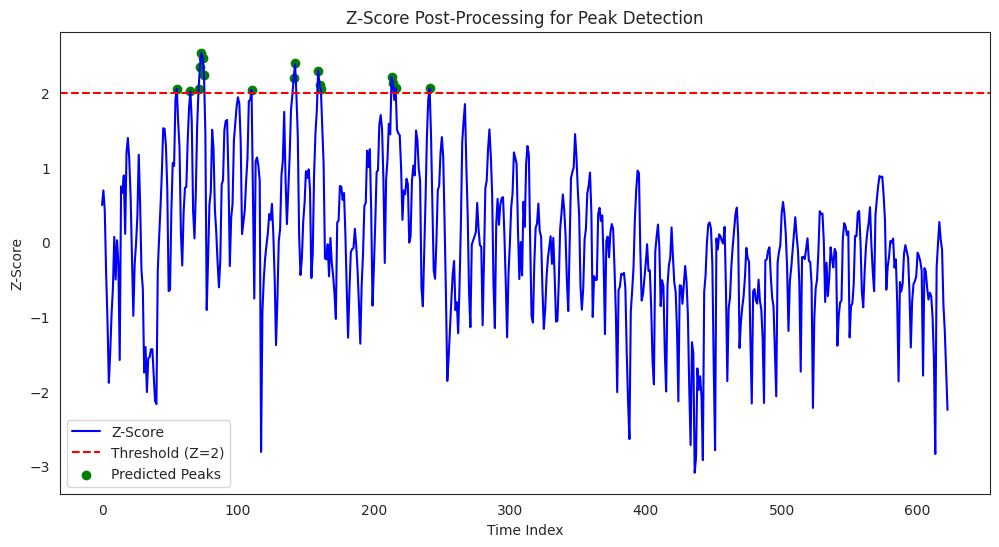

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define classification metrics function
def classification_metrics(y_true, y_pred):
    y_true_binary = y_true.astype(int)
    y_pred_binary = y_pred.astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) != 0 else 0  # F1 Score

    return {
        "Recall": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }

# Define features and target
X_load = data_scaled_load_probable.drop(columns=['1StewartSt'])  # Drop the target column
y_load = data_scaled_load_probable['1StewartSt']  # Target column

# Split the data into train and test sets
X_train_L, X_test_L, y_train_L, y_test_L = split_dataset(X_load, y_load)

# Train the MLPRegressor
print("Training the MLP Regressor for Load Forecasting...")
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_regressor.fit(X_train_L, y_train_L)

# Predict load for train and test sets
y_test_pred_L = mlp_regressor.predict(X_test_L)

# Calculate performance metrics for load forecasting
test_rmse = np.sqrt(mean_squared_error(y_test_L, y_test_pred_L))
test_r2 = r2_score(y_test_L, y_test_pred_L)

print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Apply Z-score Post-Processing to Identify Peaks
print("\nIdentifying Peaks Using Z-Score Post-Processing...")
mean_load = np.mean(y_test_pred_L)
std_load = np.std(y_test_pred_L)

# Calculate Z-scores
z_scores = (y_test_pred_L - mean_load) / std_load

# Identify peaks based on Z-score threshold
z_score_threshold = 2  # Z-score threshold for peaks
predicted_peaks = (z_scores > z_score_threshold).astype(int)

# Identify actual peaks in the ground truth
actual_peaks = (y_test_L > (mean_load + 2 * std_load)).astype(int)

# Evaluate peak detection using classification metrics
metrics = classification_metrics(actual_peaks, predicted_peaks)

print("\nPeak Detection Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value}")

# Plot Z-scores and predicted peaks
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Z-Score', color='blue')
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Post-Processing for Peak Detection')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


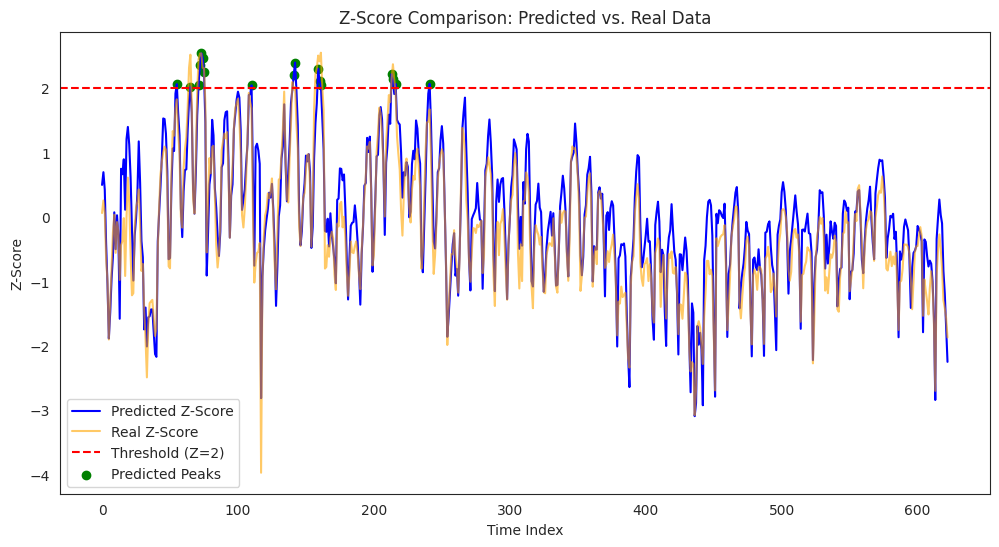

In [ ]:
# Calculate Z-scores for real data
z_scores_real = (y_test_L - mean_load) / std_load

# Plot Z-scores for predicted and real data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Predicted Z-Score', color='blue')
plt.plot(range(len(y_test_L)), z_scores_real, label='Real Z-Score', color='orange', alpha=0.6)
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Comparison: Predicted vs. Real Data')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


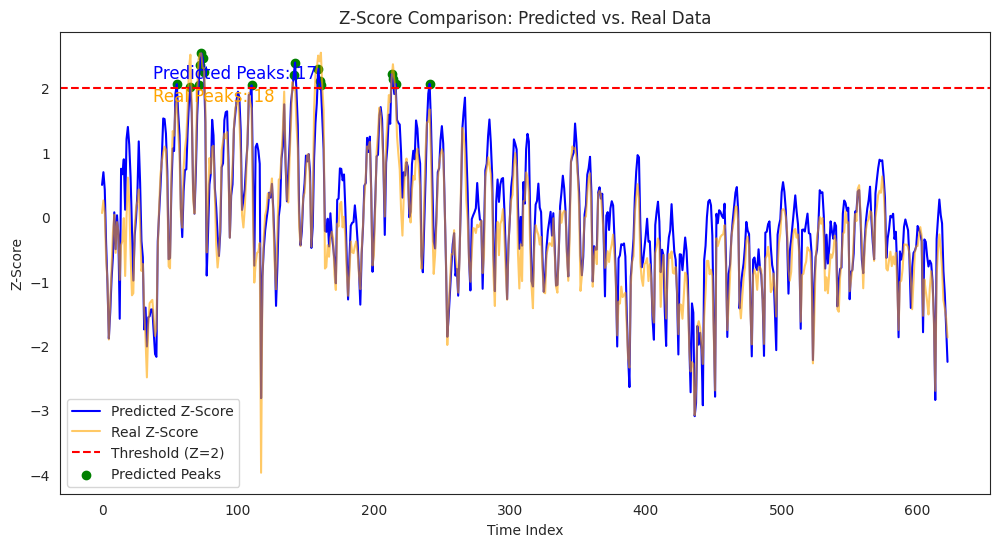

Number of Predicted Peaks: 17
Number of Real Peaks: 18


In [ ]:
# Calculate Z-scores for real data
z_scores_real = (y_test_L - mean_load) / std_load

# Count peaks in predicted and real data
num_predicted_peaks = np.sum(predicted_peaks)
num_real_peaks = np.sum(actual_peaks)

# Plot Z-scores for predicted and real data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Predicted Z-Score', color='blue')
plt.plot(range(len(y_test_L)), z_scores_real, label='Real Z-Score', color='orange', alpha=0.6)
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Comparison: Predicted vs. Real Data')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')

# Annotate the number of peaks
plt.text(0.1, 0.9, f"Predicted Peaks: {num_predicted_peaks}", transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.1, 0.85, f"Real Peaks: {num_real_peaks}", transform=plt.gca().transAxes, fontsize=12, color='orange')

plt.legend()
plt.show()

# Display the counts in text format as well
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Real Peaks: {num_real_peaks}")


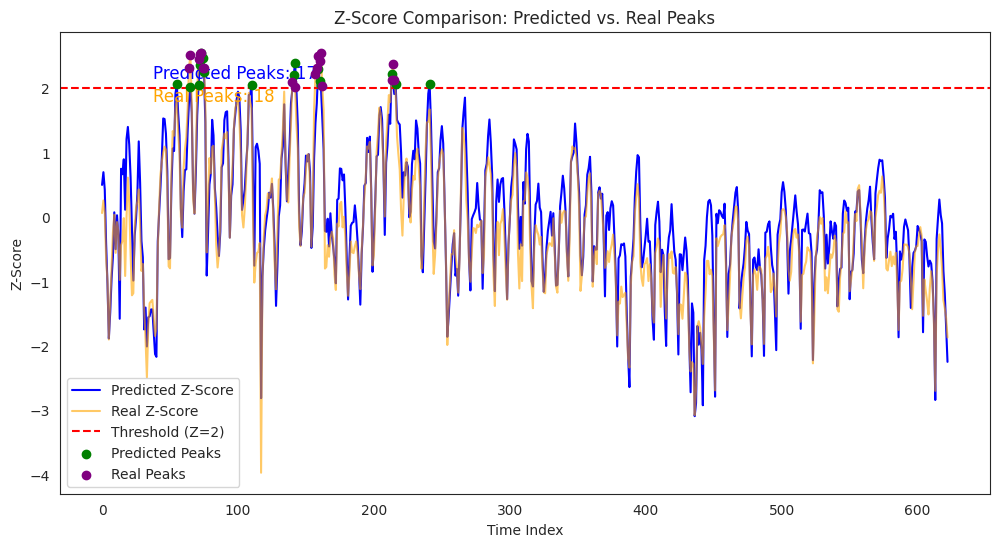

Number of Predicted Peaks: 17
Number of Real Peaks: 18


In [ ]:
# Calculate Z-scores for real data
z_scores_real = (y_test_L - mean_load) / std_load

# Count peaks in predicted and real data
num_predicted_peaks = np.sum(predicted_peaks)
num_real_peaks = np.sum(actual_peaks)

# Plot Z-scores for predicted and real data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred_L)), z_scores, label='Predicted Z-Score', color='blue')
plt.plot(range(len(y_test_L)), z_scores_real, label='Real Z-Score', color='orange', alpha=0.6)
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')

# Add scatter points for predicted and real peaks
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1],
            color='green', label='Predicted Peaks', zorder=5)
plt.scatter(np.where(actual_peaks == 1), z_scores_real[actual_peaks == 1],
            color='purple', label='Real Peaks', zorder=5)

# Annotate the number of peaks
plt.text(0.1, 0.9, f"Predicted Peaks: {num_predicted_peaks}", transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.1, 0.85, f"Real Peaks: {num_real_peaks}", transform=plt.gca().transAxes, fontsize=12, color='orange')

# Add title, labels, and legend
plt.title('Z-Score Comparison: Predicted vs. Real Peaks')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

# Display the counts in text format as well
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Real Peaks: {num_real_peaks}")


## Using seq2seq ideas, Mlp

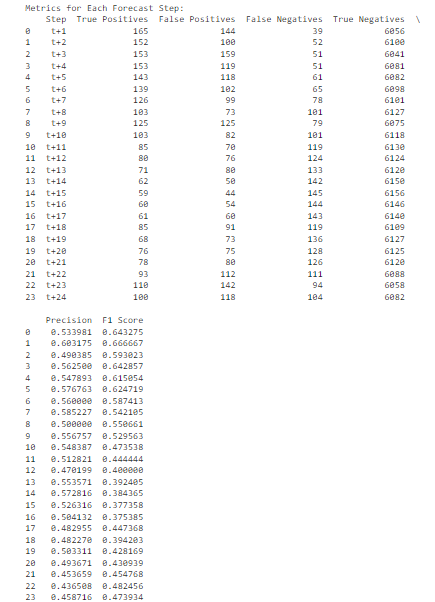

In [ ]:
data_scaled_load.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24',
       'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', '1StewartSt_lag_2',
       '1StewartSt_lag_3', '1StewartSt_lag_4', '1StewartSt_lag_5',
       '1StewartSt_lag_6', '1StewartSt_lag_7', '1StewartSt_lag_17',
       '1StewartSt_lag_18', '1StewartSt_lag_19', '1StewartSt_lag_20',
       '1StewartSt_lag_21', '1StewartSt_lag_22', '1StewartSt_lag_23',
       '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
data_scaled_load

1StewartSt      temp      dwpt      rhum      hour    dayofw  month  \
25       0.002982  0.428346  0.502496  0.752941  0.043478  0.833333    0.0   
26       0.001853  0.423622  0.497504  0.752941  0.086957  0.833333    0.0   
27       0.003227  0.418898  0.504160  0.800000  0.130435  0.833333    0.0   
28       0.001681  0.412598  0.505824  0.835294  0.173913  0.833333    0.0   
29       0.000515  0.415748  0.495840  0.776471  0.217391  0.833333    0.0   
...           ...       ...       ...       ...       ...       ...    ...   
35035    0.047841  0.429921  0.524126  0.835294  0.826087  0.000000    1.0   
35036    0.038479  0.418898  0.519135  0.870588  0.869565  0.000000    1.0   
35037    0.039252  0.422047  0.530782  0.905882  0.913043  0.000000    1.0   
35038    0.028626  0.429921  0.539101  0.905882  0.956522  0.000000    1.0   
35039    0.026221  0.425197  0.539101  0.929412  1.000000  0.000000    1.0   

       is_weekday  elec_rolling_mean_24  elec_rolling_std_24  ...  \
25            0.0              0.195826             0.005836  ...   
26            0.0              0.195871             0.005715  ...   
27            0.0              0.195935             0.005580  ...   
28            0.0              0.195942             0.005561  ...   
29            0.0              0.195907             0.005666  ...   
...           ...                   ...                  ...  ...   
35035         1.0              0.229546             0.019029  ...   
35036         1.0              0.229812             0.018891  ...   
35037         1.0              0.229933             0.018888  ...   
35038         1.0              0.230193             0.018140  ...   
35039         1.0              0.230402             0.017414  ...   

       1StewartSt_lag_6  1StewartSt_lag_7  1StewartSt_lag_17  \
25             0.011792          0.013914           0.005104   
26             0.009239          0.011792           0.002699   
27             0.008920          0.009239           0.006515   
28             0.008920          0.008920           0.006896   
29             0.002761          0.008920           0.005104   
...                 ...               ...                ...   
35035          0.043816          0.045436           0.024933   
35036          0.049142          0.043816           0.026000   
35037          0.042651          0.049142           0.025448   
35038          0.041264          0.042651           0.031890   
35039          0.055019          0.041264           0.037546   

       1StewartSt_lag_18  1StewartSt_lag_19  1StewartSt_lag_20  \
25              0.009411           0.001104           0.001288   
26              0.005104           0.009411           0.001104   
27              0.002699           0.005104           0.009411   
28              0.006515           0.002699           0.005104   
29              0.006896           0.006515           0.002699   
...                  ...                ...                ...   
35035           0.022945           0.029890           0.021559   
35036           0.024933           0.022945           0.029890   
35037           0.026000           0.024933           0.022945   
35038           0.025448           0.026000           0.024933   
35039           0.031890           0.025448           0.026000   

       1StewartSt_lag_21  1StewartSt_lag_22  1StewartSt_lag_23  \
25              0.001521           0.001816           0.000847   
26              0.001288           0.001521           0.001816   
27              0.001104           0.001288           0.001521   
28              0.009411           0.001104           0.001288   
29              0.005104           0.009411           0.001104   
...                  ...                ...                ...   
35035           0.022835           0.036553           0.032553   
35036           0.021559           0.022835           0.036553   
35037           0.029890           0.021559           0.022835   
35038           0.0

In [ ]:
normalized_data = data_scaled_load.copy()

In [ ]:
normalized_data.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24',
       'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', '1StewartSt_lag_2',
       '1StewartSt_lag_3', '1StewartSt_lag_4', '1StewartSt_lag_5',
       '1StewartSt_lag_6', '1StewartSt_lag_7', '1StewartSt_lag_17',
       '1StewartSt_lag_18', '1StewartSt_lag_19', '1StewartSt_lag_20',
       '1StewartSt_lag_21', '1StewartSt_lag_22', '1StewartSt_lag_23',
       '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
# Ensure no missing values in normalized_data
normalized_data = normalized_data.dropna()

# Function to split data into train and test
def split_data(series, split_index=25769):
    """Splits input series into train and test sets."""
    train_data = series[:split_index]  # Train set
    test_data = series[split_index:]  # Test set
    return train_data, test_data

# Define features and target for splitting
input_features = [
    'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month', 'is_weekday',
    'elec_rolling_mean_24', 'elec_rolling_std_24', 'elec_rolling_mean_daily',
    'elec_rolling_std_daily', 'skewness_1StewartSt', 'kurtosis_1StewartSt',
    'PAR_1StewartSt', 'CV_1StewartSt', 'relative_delta', 'shape_factor'
]

# Split normalized data into train and test
train_multi = normalized_data[:25769] #80%
test_multi = normalized_data[25769:] #20%

# Dynamically split data and reshape for each feature
dynamic_vars = {}
for feature in input_features:
    if feature in normalized_data.columns:
        train_data, test_data = split_data(normalized_data[feature])
        dynamic_vars[f"in_seqt{feature}"] = train_data.values.reshape(-1, 1)
        dynamic_vars[f"in_seqt_test{feature}"] = test_data.values.reshape(-1, 1)
    else:
        print(f"Feature missing in normalized_data: {feature}")

# Debugging: Check array sizes
for feature in input_features:
    print(f"{feature}: train size = {len(dynamic_vars.get(f'in_seqt{feature}', []))}, "
          f"test size = {len(dynamic_vars.get(f'in_seqt_test{feature}', []))}")

# Combine features into datasets for training
out_seqt = train_multi['1StewartSt'].values.reshape(-1, 1)  # Target for training
dataset = np.hstack((
    *[dynamic_vars[f"in_seqt{feature}"] for feature in input_features if f"in_seqt{feature}" in dynamic_vars],
    out_seqt
))

# Combine features into datasets for testing
out_seqt_test = test_multi['1StewartSt'].values.reshape(-1, 1)  # Target for testing
dataset_test = np.hstack((
    *[dynamic_vars[f"in_seqt_test{feature}"] for feature in input_features if f"in_seqt_test{feature}" in dynamic_vars],
    out_seqt_test
))


temp: train size = 25769, test size = 6443
dwpt: train size = 25769, test size = 6443
rhum: train size = 25769, test size = 6443
hour: train size = 25769, test size = 6443
dayofw: train size = 25769, test size = 6443
month: train size = 25769, test size = 6443
is_weekday: train size = 25769, test size = 6443
elec_rolling_mean_24: train size = 25769, test size = 6443
elec_rolling_std_24: train size = 25769, test size = 6443
elec_rolling_mean_daily: train size = 25769, test size = 6443
elec_rolling_std_daily: train size = 25769, test size = 6443
skewness_1StewartSt: train size = 25769, test size = 6443
kurtosis_1StewartSt: train size = 25769, test size = 6443
PAR_1StewartSt: train size = 25769, test size = 6443
CV_1StewartSt: train size = 25769, test size = 6443
relative_delta: train size = 25769, test size = 6443
shape_factor: train size = 25769, test size = 6443


In [ ]:
# Prepare supervised learning sequences
n_steps_in, n_steps_out = 16, 24
X, y = split_sequences(dataset, n_steps_in, n_steps_out)  # Training sequences
X_test, y_test = split_sequences(dataset_test, n_steps_in, n_steps_out)  # Testing sequences

# Debugging: Check data dimensions after splitting
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Train the MLP Regressor
print("Training the MLP Regressor for Load Forecasting...")
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_regressor.fit(X.reshape(X.shape[0], -1), y.reshape(y.shape[0], -1))

# Predict load for the test set
y_test_pred = mlp_regressor.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluate performance
test_rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_test_pred.flatten()))
test_r2 = r2_score(y_test.flatten(), y_test_pred.flatten())
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")


X_train shape: (25730, 16, 17)
y_train shape: (25730, 24)
X_test shape: (6404, 16, 17)
y_test shape: (6404, 24)
Training the MLP Regressor for Load Forecasting...
Testing RMSE: 0.07, R²: 0.78


Testing RMSE: 0.07, R²: 0.78

Metrics for Each Forecast Step:
    Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             165              144               39            6056   
1    t+2             152              100               52            6100   
2    t+3             153              159               51            6041   
3    t+4             153              119               51            6081   
4    t+5             143              118               61            6082   
5    t+6             139              102               65            6098   
6    t+7             126               99               78            6101   
7    t+8             103               73              101            6127   
8    t+9             125              125               79            6075   
9   t+10             103               82              101            6118   
10  t+11              85               70              119            6130   
11

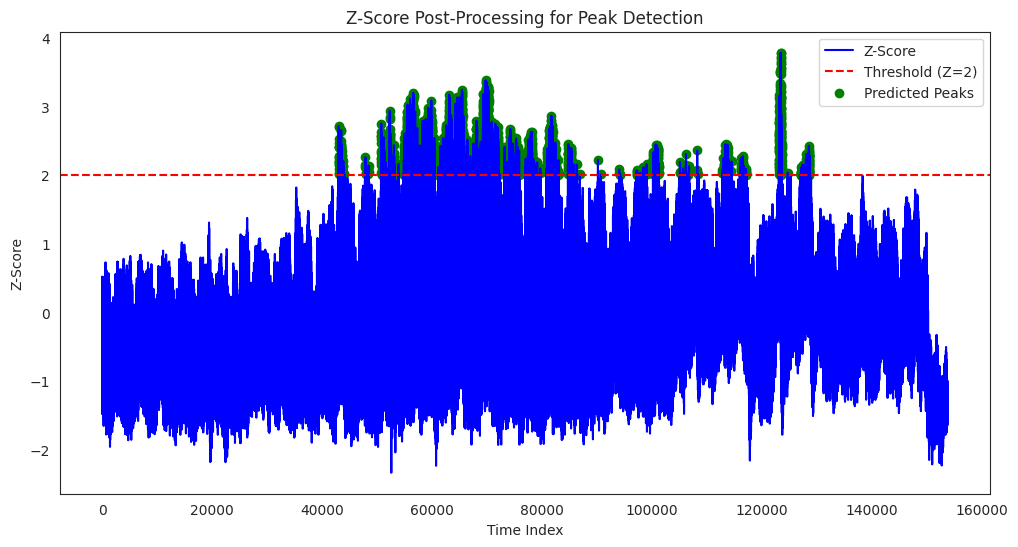

Number of Predicted Peaks: 4696
Number of Actual Peaks: 4896


In [ ]:
# Calculate RMSE and R² for load forecasting
test_rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_test_pred.flatten()))
test_r2 = r2_score(y_test.flatten(), y_test_pred.flatten())
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Post-processing: Identify peaks using Z-score
mean_load = np.mean(y_test_pred.flatten())
std_load = np.std(y_test_pred.flatten())
z_score_threshold = 2
z_scores = (y_test_pred.flatten() - mean_load) / std_load
predicted_peaks = (z_scores > z_score_threshold).astype(int)
actual_peaks = (y_test.flatten() > (mean_load + z_score_threshold * std_load)).astype(int)

# Calculate metrics for each forecast step
results = {'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [],
                    'true_negatives': [], 'precision': [], 'f1_score': []}}
for step in range(n_steps_out):
    y_true_step = actual_peaks[step::n_steps_out]
    y_pred_step = predicted_peaks[step::n_steps_out]
    metrics = calculate_metrics(y_true_step, y_pred_step)
    results['test']['true_positives'].append(metrics['TP'])
    results['test']['false_positives'].append(metrics['FP'])
    results['test']['false_negatives'].append(metrics['FN'])
    results['test']['true_negatives'].append(metrics['TN'])
    results['test']['precision'].append(metrics['Precision'])
    results['test']['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrame
test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, n_steps_out + 1)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})
print("\nMetrics for Each Forecast Step:")
print(test_results_df)

# Save metrics to CSV
test_results_df.to_csv('step_metrics.csv', index=False)

# Plot Z-scores and predicted peaks
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred.flatten())), z_scores, label='Z-Score', color='blue')
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Post-Processing for Peak Detection')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

# Annotate total peaks
num_predicted_peaks = np.sum(predicted_peaks)
num_actual_peaks = np.sum(actual_peaks)
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Actual Peaks: {num_actual_peaks}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R² for load forecasting
test_rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_test_pred.flatten()))
test_r2 = r2_score(y_test.flatten(), y_test_pred.flatten())
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Post-processing: Identify peaks using Z-score
mean_load = np.mean(y_test_pred.flatten())
std_load = np.std(y_test_pred.flatten())
z_score_threshold = 2
z_scores = (y_test_pred.flatten() - mean_load) / std_load
predicted_peaks = (z_scores > z_score_threshold).astype(int)
actual_peaks = (y_test.flatten() > (mean_load + z_score_threshold * std_load)).astype(int)

# Threshold adjustment experiment
print("\nThreshold Adjustment Experiment:")
thresholds = np.arange(0.1, 1.0, 0.1)
threshold_results = pd.DataFrame(columns=[
    'Threshold', 'Recall', 'False Positive Rate', 'Precision', 'F1 Score',
    'True Positives', 'False Positives', 'False Negatives', 'True Negatives'
])

for t in thresholds:
    threshold_predicted_peaks = (z_scores > t).astype(int)
    tp = np.sum((actual_peaks == 1) & (threshold_predicted_peaks == 1))
    fp = np.sum((actual_peaks == 0) & (threshold_predicted_peaks == 1))
    fn = np.sum((actual_peaks == 1) & (threshold_predicted_peaks == 0))
    tn = np.sum((actual_peaks == 0) & (threshold_predicted_peaks == 0))
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    threshold_results = threshold_results.append({
        'Threshold': t,
        'Recall': recall,
        'False Positive Rate': fp / (fp + tn) if (fp + tn) != 0 else 0,
        'Precision': precision,
        'F1 Score': f1,
        'True Positives': tp,
        'False Positives': fp,
        'False Negatives': fn,
        'True Negatives': tn
    }, ignore_index=True)

print("\nThreshold Results:")
print(threshold_results)

# Save threshold results to CSV
threshold_results.to_csv('threshold_results.csv', index=False)

# Metrics for each forecast step
results = {'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [],
                    'true_negatives': [], 'precision': [], 'f1_score': []}}
for step in range(n_steps_out):
    y_true_step = actual_peaks[step::n_steps_out]
    y_pred_step = predicted_peaks[step::n_steps_out]
    tp = np.sum((y_true_step == 1) & (y_pred_step == 1))
    fp = np.sum((y_true_step == 0) & (y_pred_step == 1))
    fn = np.sum((y_true_step == 1) & (y_pred_step == 0))
    tn = np.sum((y_true_step == 0) & (y_pred_step == 0))
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    results['test']['true_positives'].append(tp)
    results['test']['false_positives'].append(fp)
    results['test']['false_negatives'].append(fn)
    results['test']['true_negatives'].append(tn)
    results['test']['precision'].append(precision)
    results['test']['f1_score'].append(f1)

# Convert step-by-step results to DataFrame
test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, n_steps_out + 1)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})
print("\nMetrics for Each Forecast Step:")
print(test_results_df)

# Save step metrics to CSV
test_results_df.to_csv('step_metrics.csv', index=False)

# Plot Z-scores and predicted peaks
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred.flatten())), z_scores, label='Z-Score', color='blue')
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Post-Processing for Peak Detection')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

# Annotate total peaks
num_predicted_peaks = np.sum(predicted_peaks)
num_actual_peaks = np.sum(actual_peaks)
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Actual Peaks: {num_actual_peaks}")


NameError: name 'y_test' is not defined

## seq2seq using RNN


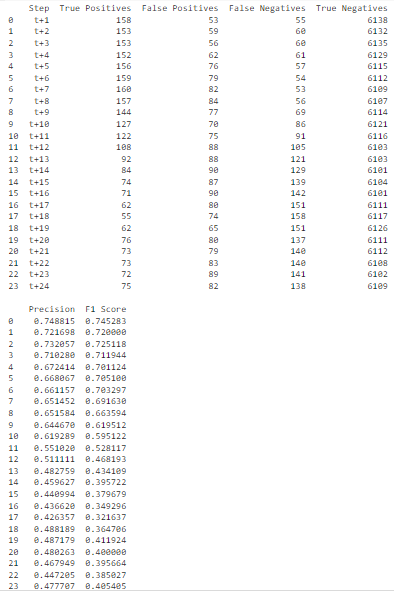

In [ ]:
data_scaled_load.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24',
       'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', '1StewartSt_lag_2',
       '1StewartSt_lag_3', '1StewartSt_lag_4', '1StewartSt_lag_5',
       '1StewartSt_lag_6', '1StewartSt_lag_7', '1StewartSt_lag_17',
       '1StewartSt_lag_18', '1StewartSt_lag_19', '1StewartSt_lag_20',
       '1StewartSt_lag_21', '1StewartSt_lag_22', '1StewartSt_lag_23',
       '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
data_scaled_load

1StewartSt      temp      dwpt      rhum      hour    dayofw  month  \
25       0.002982  0.428346  0.502496  0.752941  0.043478  0.833333    0.0   
26       0.001853  0.423622  0.497504  0.752941  0.086957  0.833333    0.0   
27       0.003227  0.418898  0.504160  0.800000  0.130435  0.833333    0.0   
28       0.001681  0.412598  0.505824  0.835294  0.173913  0.833333    0.0   
29       0.000515  0.415748  0.495840  0.776471  0.217391  0.833333    0.0   
...           ...       ...       ...       ...       ...       ...    ...   
35035    0.047841  0.429921  0.524126  0.835294  0.826087  0.000000    1.0   
35036    0.038479  0.418898  0.519135  0.870588  0.869565  0.000000    1.0   
35037    0.039252  0.422047  0.530782  0.905882  0.913043  0.000000    1.0   
35038    0.028626  0.429921  0.539101  0.905882  0.956522  0.000000    1.0   
35039    0.026221  0.425197  0.539101  0.929412  1.000000  0.000000    1.0   

       is_weekday  elec_rolling_mean_24  elec_rolling_std_24  ...  \
25            0.0              0.195826             0.005836  ...   
26            0.0              0.195871             0.005715  ...   
27            0.0              0.195935             0.005580  ...   
28            0.0              0.195942             0.005561  ...   
29            0.0              0.195907             0.005666  ...   
...           ...                   ...                  ...  ...   
35035         1.0              0.229546             0.019029  ...   
35036         1.0              0.229812             0.018891  ...   
35037         1.0              0.229933             0.018888  ...   
35038         1.0              0.230193             0.018140  ...   
35039         1.0              0.230402             0.017414  ...   

       1StewartSt_lag_6  1StewartSt_lag_7  1StewartSt_lag_17  \
25             0.011792          0.013914           0.005104   
26             0.009239          0.011792           0.002699   
27             0.008920          0.009239           0.006515   
28             0.008920          0.008920           0.006896   
29             0.002761          0.008920           0.005104   
...                 ...               ...                ...   
35035          0.043816          0.045436           0.024933   
35036          0.049142          0.043816           0.026000   
35037          0.042651          0.049142           0.025448   
35038          0.041264          0.042651           0.031890   
35039          0.055019          0.041264           0.037546   

       1StewartSt_lag_18  1StewartSt_lag_19  1StewartSt_lag_20  \
25              0.009411           0.001104           0.001288   
26              0.005104           0.009411           0.001104   
27              0.002699           0.005104           0.009411   
28              0.006515           0.002699           0.005104   
29              0.006896           0.006515           0.002699   
...                  ...                ...                ...   
35035           0.022945           0.029890           0.021559   
35036           0.024933           0.022945           0.029890   
35037           0.026000           0.024933           0.022945   
35038           0.025448           0.026000           0.024933   
35039           0.031890           0.025448           0.026000   

       1StewartSt_lag_21  1StewartSt_lag_22  1StewartSt_lag_23  \
25              0.001521           0.001816           0.000847   
26              0.001288           0.001521           0.001816   
27              0.001104           0.001288           0.001521   
28              0.009411           0.001104           0.001288   
29              0.005104           0.009411           0.001104   
...                  ...                ...                ...   
35035           0.022835           0.036553           0.032553   
35036           0.021559           0.022835           0.036553   
35037           0.029890           0.021559           0.022835   
35038           0.0

In [ ]:
normalized_data = data_scaled_load.copy()

In [ ]:
normalized_data.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24',
       'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', '1StewartSt_lag_2',
       '1StewartSt_lag_3', '1StewartSt_lag_4', '1StewartSt_lag_5',
       '1StewartSt_lag_6', '1StewartSt_lag_7', '1StewartSt_lag_17',
       '1StewartSt_lag_18', '1StewartSt_lag_19', '1StewartSt_lag_20',
       '1StewartSt_lag_21', '1StewartSt_lag_22', '1StewartSt_lag_23',
       '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
# Ensure no missing values in normalized_data
normalized_data = normalized_data.dropna()

# Function to split data into train and test
def split_data(series, split_index=25769):
    """Splits input series into train and test sets."""
    train_data = series[:split_index]  # Train set
    test_data = series[split_index:]  # Test set
    return train_data, test_data

# Define features and target for splitting
input_features = [
    'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month', 'is_weekday',
    'elec_rolling_mean_24', 'elec_rolling_std_24', 'elec_rolling_mean_daily',
    'elec_rolling_std_daily', 'skewness_1StewartSt', 'kurtosis_1StewartSt',
    'PAR_1StewartSt', 'CV_1StewartSt', 'relative_delta', 'shape_factor'
]

# Split normalized data into train and test
train_multi = normalized_data[:25769] #80%
test_multi = normalized_data[25769:] #20%

# Dynamically split data and reshape for each feature
dynamic_vars = {}
for feature in input_features:
    if feature in normalized_data.columns:
        train_data, test_data = split_data(normalized_data[feature])
        dynamic_vars[f"in_seqt{feature}"] = train_data.values.reshape(-1, 1)
        dynamic_vars[f"in_seqt_test{feature}"] = test_data.values.reshape(-1, 1)
    else:
        print(f"Feature missing in normalized_data: {feature}")

# Debugging: Check array sizes
for feature in input_features:
    print(f"{feature}: train size = {len(dynamic_vars.get(f'in_seqt{feature}', []))}, "
          f"test size = {len(dynamic_vars.get(f'in_seqt_test{feature}', []))}")

# Combine features into datasets for training
out_seqt = train_multi['1StewartSt'].values.reshape(-1, 1)  # Target for training
dataset = np.hstack((
    *[dynamic_vars[f"in_seqt{feature}"] for feature in input_features if f"in_seqt{feature}" in dynamic_vars],
    out_seqt
))

# Combine features into datasets for testing
out_seqt_test = test_multi['1StewartSt'].values.reshape(-1, 1)  # Target for testing
dataset_test = np.hstack((
    *[dynamic_vars[f"in_seqt_test{feature}"] for feature in input_features if f"in_seqt_test{feature}" in dynamic_vars],
    out_seqt_test
))


temp: train size = 25769, test size = 6443
dwpt: train size = 25769, test size = 6443
rhum: train size = 25769, test size = 6443
hour: train size = 25769, test size = 6443
dayofw: train size = 25769, test size = 6443
month: train size = 25769, test size = 6443
is_weekday: train size = 25769, test size = 6443
elec_rolling_mean_24: train size = 25769, test size = 6443
elec_rolling_std_24: train size = 25769, test size = 6443
elec_rolling_mean_daily: train size = 25769, test size = 6443
elec_rolling_std_daily: train size = 25769, test size = 6443
skewness_1StewartSt: train size = 25769, test size = 6443
kurtosis_1StewartSt: train size = 25769, test size = 6443
PAR_1StewartSt: train size = 25769, test size = 6443
CV_1StewartSt: train size = 25769, test size = 6443
relative_delta: train size = 25769, test size = 6443
shape_factor: train size = 25769, test size = 6443


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare supervised learning sequences
n_steps_in, n_steps_out = 16, 24
X, y = split_sequences(dataset, n_steps_in, n_steps_out)  # Training sequences
X_test, y_test = split_sequences(dataset_test, n_steps_in, n_steps_out)  # Testing sequences

# Debugging: Check data dimensions after splitting
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Initialize the Sequential model
model_rnn = Sequential()

# Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, X.shape[2])))

# Add Simple RNN layers
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=False))  # Final RNN layer
model_rnn.add(Dropout(0.2))  # Add dropout for regularization

# Add Dense layer for output
model_rnn.add(Flatten())
model_rnn.add(Dense(n_steps_out, activation='linear'))

# Compile the model
loss = Huber()
optimizer = Adam(learning_rate=1e-4)
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model_rnn.fit(
    X,
    y,
    epochs=100,  # You can adjust this
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Include the early stopping callback
    verbose=1
)

# Predict load for the test set
y_test_pred = model_rnn.predict(X_test)

# Evaluate performance
test_rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_test_pred.flatten()))
test_r2 = r2_score(y_test.flatten(), y_test_pred.flatten())
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Additional Debugging: Inspect predictions and ground truth
print("Sample predictions:", y_test_pred[:5])
print("Sample ground truth:", y_test[:5])


X_train shape: (25730, 16, 17)
y_train shape: (25730, 24)
X_test shape: (6404, 16, 17)
y_test shape: (6404, 24)
Epoch 1/100
805/805 [==============================] - 13s 13ms/step - loss: 0.0115 - mse: 0.0229 - val_loss: 0.0035 - val_mse: 0.0070
Epoch 2/100
805/805 [==============================] - 10s 12ms/step - loss: 0.0047 - mse: 0.0094 - val_loss: 0.0030 - val_mse: 0.0059
Epoch 3/100
805/805 [==============================] - 10s 13ms/step - loss: 0.0038 - mse: 0.0076 - val_loss: 0.0027 - val_mse: 0.0055
Epoch 4/100
805/805 [==============================] - 10s 13ms/step - loss: 0.0034 - mse: 0.0068 - val_loss: 0.0026 - val_mse: 0.0053
Epoch 5/100
805/805 [==============================] - 10s 12ms/step - loss: 0.0031 - mse: 0.0062 - val_loss: 0.0029 - val_mse: 0.0058
Epoch 6/100
805/805 [==============================] - 10s 13ms/step - loss: 0.0029 - mse: 0.0057 - val_loss: 0.0026 - val_mse: 0.0051
Epoch 7/100
805/805 [==============================] - 10s 13ms/step - loss: 0

Testing RMSE: 0.06, R²: 0.84

Metrics for Each Forecast Step:
    Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             158               53               55            6138   
1    t+2             153               59               60            6132   
2    t+3             153               56               60            6135   
3    t+4             152               62               61            6129   
4    t+5             156               76               57            6115   
5    t+6             159               79               54            6112   
6    t+7             160               82               53            6109   
7    t+8             157               84               56            6107   
8    t+9             144               77               69            6114   
9   t+10             127               70               86            6121   
10  t+11             122               75               91            6116   
11

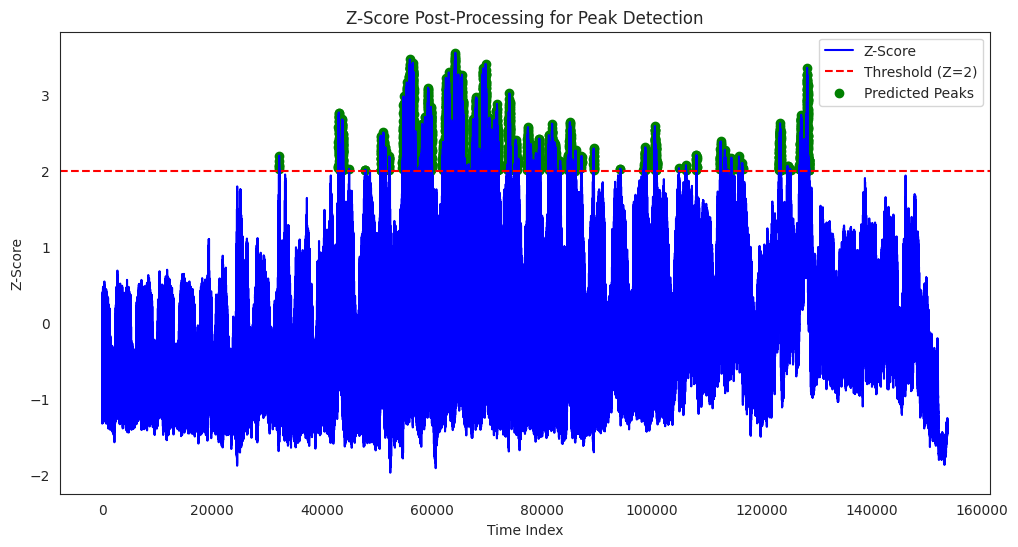

Number of Predicted Peaks: 4466
Number of Actual Peaks: 5112


In [ ]:
# Calculate RMSE and R² for load forecasting
test_rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_test_pred.flatten()))
test_r2 = r2_score(y_test.flatten(), y_test_pred.flatten())
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Post-processing: Identify peaks using Z-score
mean_load = np.mean(y_test_pred.flatten())
std_load = np.std(y_test_pred.flatten())
z_score_threshold = 2
z_scores = (y_test_pred.flatten() - mean_load) / std_load
predicted_peaks = (z_scores > z_score_threshold).astype(int)
actual_peaks = (y_test.flatten() > (mean_load + z_score_threshold * std_load)).astype(int)

# Calculate metrics for each forecast step
results = {'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [],
                    'true_negatives': [], 'precision': [], 'f1_score': []}}
for step in range(n_steps_out):
    y_true_step = actual_peaks[step::n_steps_out]
    y_pred_step = predicted_peaks[step::n_steps_out]
    metrics = calculate_metrics(y_true_step, y_pred_step)
    results['test']['true_positives'].append(metrics['TP'])
    results['test']['false_positives'].append(metrics['FP'])
    results['test']['false_negatives'].append(metrics['FN'])
    results['test']['true_negatives'].append(metrics['TN'])
    results['test']['precision'].append(metrics['Precision'])
    results['test']['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrame
test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, n_steps_out + 1)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})
print("\nMetrics for Each Forecast Step:")
print(test_results_df)

# Save metrics to CSV
test_results_df.to_csv('step_metrics.csv', index=False)

# Plot Z-scores and predicted peaks
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred.flatten())), z_scores, label='Z-Score', color='blue')
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Post-Processing for Peak Detection')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

# Annotate total peaks
num_predicted_peaks = np.sum(predicted_peaks)
num_actual_peaks = np.sum(actual_peaks)
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Actual Peaks: {num_actual_peaks}")

## developing model in probable peak hours

In [ ]:
data_scaled_load_probable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3111 entries, 3656 to 32848
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   1StewartSt               3111 non-null   float64
 1   temp                     3111 non-null   float64
 2   dwpt                     3111 non-null   float64
 3   rhum                     3111 non-null   float64
 4   hour                     3111 non-null   float64
 5   dayofw                   3111 non-null   float64
 6   month                    3111 non-null   float64
 7   is_weekday               3111 non-null   float64
 8   elec_rolling_mean_24     3111 non-null   float64
 9   elec_rolling_std_24      3111 non-null   float64
 10  elec_rolling_mean_daily  3111 non-null   float64
 11  elec_rolling_std_daily   3111 non-null   float64
 12  skewness_1StewartSt      3111 non-null   float64
 13  kurtosis_1StewartSt      3111 non-null   float64
 14  PAR_1StewartSt           

In [ ]:
data_scaled_load_probable.columns
normalized_data = data_scaled_load_probable.copy()

In [ ]:
# Ensure no missing values in normalized_data
normalized_data = normalized_data.dropna()


# Define a consistent split index
split_index = 2488
 # Align with train_multi size



# Function to split data into train and test
def split_data(series, split_index=split_index):
    """Splits input series into train and test sets."""
    train_data = series[:split_index]  # Train set
    test_data = series[split_index:]  # Test set
    return train_data, test_data





# Define features and target for splitting
input_features = [
    'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month', 'is_weekday',
    'elec_rolling_mean_24', 'elec_rolling_std_24', 'elec_rolling_mean_daily',
    'elec_rolling_std_daily', 'skewness_1StewartSt', 'kurtosis_1StewartSt',
    'PAR_1StewartSt', 'CV_1StewartSt', 'relative_delta', 'shape_factor'
]

# Split normalized data into train and test
train_multi = normalized_data[:split_index]  # Train set
test_multi = normalized_data[split_index:]   # Test set



# Dynamically split data and reshape for each feature
dynamic_vars = {}
for feature in input_features:
    if feature in normalized_data.columns:
        train_data, test_data = split_data(normalized_data[feature])
        dynamic_vars[f"in_seqt{feature}"] = train_data.values.reshape(-1, 1)
        dynamic_vars[f"in_seqt_test{feature}"] = test_data.values.reshape(-1, 1)
    else:
        print(f"Feature missing in normalized_data: {feature}")

# Debugging: Check array sizes
for feature in input_features:
    print(f"{feature}: train size = {len(dynamic_vars.get(f'in_seqt{feature}', []))}, "
          f"test size = {len(dynamic_vars.get(f'in_seqt_test{feature}', []))}")

# Combine features into datasets for training
out_seqt = train_multi['1StewartSt'].values.reshape(-1, 1)  # Target for training
dataset = np.hstack((
    *[dynamic_vars[f"in_seqt{feature}"] for feature in input_features if f"in_seqt{feature}" in dynamic_vars],
    out_seqt
))

# Combine features into datasets for testing
out_seqt_test = test_multi['1StewartSt'].values.reshape(-1, 1)  # Target for testing
dataset_test = np.hstack((
    *[dynamic_vars[f"in_seqt_test{feature}"] for feature in input_features if f"in_seqt_test{feature}" in dynamic_vars],
    out_seqt_test
))


temp: train size = 2488, test size = 623
dwpt: train size = 2488, test size = 623
rhum: train size = 2488, test size = 623
hour: train size = 2488, test size = 623
dayofw: train size = 2488, test size = 623
month: train size = 2488, test size = 623
is_weekday: train size = 2488, test size = 623
elec_rolling_mean_24: train size = 2488, test size = 623
elec_rolling_std_24: train size = 2488, test size = 623
elec_rolling_mean_daily: train size = 2488, test size = 623
elec_rolling_std_daily: train size = 2488, test size = 623
skewness_1StewartSt: train size = 2488, test size = 623
kurtosis_1StewartSt: train size = 2488, test size = 623
PAR_1StewartSt: train size = 2488, test size = 623
CV_1StewartSt: train size = 2488, test size = 623
relative_delta: train size = 2488, test size = 623
shape_factor: train size = 2488, test size = 623


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare supervised learning sequences
n_steps_in, n_steps_out = 16, 24
X, y = split_sequences(dataset, n_steps_in, n_steps_out)  # Training sequences
X_test, y_test = split_sequences(dataset_test, n_steps_in, n_steps_out)  # Testing sequences

# Debugging: Check data dimensions after splitting
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Initialize the Sequential model
model_rnn = Sequential()

# Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, X.shape[2])))

# Add Simple RNN layers
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=False))  # Final RNN layer
#model_rnn.add(Dropout(0.2))  # Add dropout for regularization

# Add Dense layer for output
model_rnn.add(Flatten())
model_rnn.add(Dense(n_steps_out, activation='linear'))

# Compile the model
loss = Huber()
optimizer = Adam(learning_rate=1e-4)
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mae'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model
history = model_rnn.fit(
    X,
    y,
    epochs=100,  # You can adjust this
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Include the early stopping callback
    verbose=1
)

# Predict load for the test set
y_test_pred = model_rnn.predict(X_test)

# Evaluate performance
test_rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_test_pred.flatten()))
test_r2 = r2_score(y_test.flatten(), y_test_pred.flatten())
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Additional Debugging: Inspect predictions and ground truth
print("Sample predictions:", y_test_pred[:5])
print("Sample ground truth:", y_test[:5])


X_train shape: (2441, 24, 18)
y_train shape: (2441, 24)
X_test shape: (576, 24, 18)
y_test shape: (576, 24)
Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1474 - mae: 0.4651 - val_loss: 0.0194 - val_mae: 0.1572
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193 - mae: 0.1545 - val_loss: 0.0118 - val_mae: 0.1232
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mae: 0.1299 - val_loss: 0.0103 - val_mae: 0.1153
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mae: 0.1239 - val_loss: 0.0094 - val_mae: 0.1101
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mae: 0.1200 - val_loss: 0.0088 - val_mae: 0.1064
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mae: 0.1168 - val_loss: 0.0084 - val_mae: 0.1036
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mae: 0.1142 - val_loss: 0.0080 - val_mae: 0.1011
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mae:

In [ ]:
# Calculate RMSE and R² for load forecasting
test_rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_test_pred.flatten()))
test_r2 = r2_score(y_test.flatten(), y_test_pred.flatten())
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Post-processing: Identify peaks using Z-score
mean_load = np.mean(y_test_pred.flatten())
std_load = np.std(y_test_pred.flatten())
z_score_threshold = 2
z_scores = (y_test_pred.flatten() - mean_load) / std_load
predicted_peaks = (z_scores > z_score_threshold).astype(int)
actual_peaks = (y_test.flatten() > (mean_load + z_score_threshold * std_load)).astype(int)

# Calculate metrics for each forecast step
results = {'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [],
                    'true_negatives': [], 'precision': [], 'f1_score': []}}
# Main loop
for step in range(n_steps_out):
    y_true_step = actual_peaks[step::n_steps_out]
    y_pred_step = predicted_peaks[step::n_steps_out]
    metrics = calculate_metrics(y_true_step, y_pred_step)
    results['test']['true_positives'].append(metrics['TP'])
    results['test']['false_positives'].append(metrics['FP'])
    results['test']['false_negatives'].append(metrics['FN'])
    results['test']['true_negatives'].append(metrics['TN'])
    results['test']['precision'].append(metrics['Precision'])
    results['test']['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrame
test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, n_steps_out + 1)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})
print("\nMetrics for Each Forecast Step:")
print(test_results_df)

# Save metrics to CSV
test_results_df.to_csv('step_metrics.csv', index=False)

# Plot Z-scores and predicted peaks
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_pred.flatten())), z_scores, label='Z-Score', color='blue')
plt.axhline(y=z_score_threshold, color='red', linestyle='--', label='Threshold (Z=2)')
plt.scatter(np.where(predicted_peaks == 1), z_scores[predicted_peaks == 1], color='green', label='Predicted Peaks')
plt.title('Z-Score Post-Processing for Peak Detection')
plt.xlabel('Time Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

# Annotate total peaks
num_predicted_peaks = np.sum(predicted_peaks)
num_actual_peaks = np.sum(actual_peaks)
print(f"Number of Predicted Peaks: {num_predicted_peaks}")
print(f"Number of Actual Peaks: {num_actual_peaks}")

Testing RMSE: 0.11, R²: -0.08


TypeError: tuple indices must be integers or slices, not str

## seq2seq RNN, CNNRNN, LSTMS, CNN, CNNLSTM

In [ ]:
normalized_data = data_scaled_load.copy()

In [ ]:
normalized_data.columns

Index(['1StewartSt', 'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month',
       'is_weekday', 'elec_rolling_mean_24', 'elec_rolling_std_24',
       'elec_rolling_mean_daily', 'elec_rolling_std_daily',
       'skewness_1StewartSt', 'kurtosis_1StewartSt', 'PAR_1StewartSt',
       'CV_1StewartSt', 'relative_delta', 'shape_factor', '1StewartSt_lag_2',
       '1StewartSt_lag_3', '1StewartSt_lag_4', '1StewartSt_lag_5',
       '1StewartSt_lag_6', '1StewartSt_lag_7', '1StewartSt_lag_17',
       '1StewartSt_lag_18', '1StewartSt_lag_19', '1StewartSt_lag_20',
       '1StewartSt_lag_21', '1StewartSt_lag_22', '1StewartSt_lag_23',
       '1StewartSt_lag_24'],
      dtype='object')

In [ ]:
# Ensure no missing values in normalized_data
normalized_data = normalized_data.dropna()

# Function to split data into train and test
def split_data(series, split_index=25769):
    """Splits input series into train and test sets."""
    train_data = series[:split_index]  # Train set
    test_data = series[split_index:]  # Test set
    return train_data, test_data

# Define features and target for splitting
input_features = [
    'temp', 'dwpt', 'rhum', 'hour', 'dayofw', 'month', 'is_weekday',
    'elec_rolling_mean_24', 'elec_rolling_std_24', 'elec_rolling_mean_daily',
    'elec_rolling_std_daily', 'skewness_1StewartSt', 'kurtosis_1StewartSt',
    'PAR_1StewartSt', 'CV_1StewartSt', 'relative_delta', 'shape_factor'
]

# Split normalized data into train and test
train_multi = normalized_data[:25769] #80%
test_multi = normalized_data[25769:] #20%

# Dynamically split data and reshape for each feature
dynamic_vars = {}
for feature in input_features:
    if feature in normalized_data.columns:
        train_data, test_data = split_data(normalized_data[feature])
        dynamic_vars[f"in_seqt{feature}"] = train_data.values.reshape(-1, 1)
        dynamic_vars[f"in_seqt_test{feature}"] = test_data.values.reshape(-1, 1)
    else:
        print(f"Feature missing in normalized_data: {feature}")

# Debugging: Check array sizes
for feature in input_features:
    print(f"{feature}: train size = {len(dynamic_vars.get(f'in_seqt{feature}', []))}, "
          f"test size = {len(dynamic_vars.get(f'in_seqt_test{feature}', []))}")

# Combine features into datasets for training
out_seqt = train_multi['1StewartSt'].values.reshape(-1, 1)  # Target for training
dataset = np.hstack((
    *[dynamic_vars[f"in_seqt{feature}"] for feature in input_features if f"in_seqt{feature}" in dynamic_vars],
    out_seqt
))

# Combine features into datasets for testing
out_seqt_test = test_multi['1StewartSt'].values.reshape(-1, 1)  # Target for testing
dataset_test = np.hstack((
    *[dynamic_vars[f"in_seqt_test{feature}"] for feature in input_features if f"in_seqt_test{feature}" in dynamic_vars],
    out_seqt_test
))


temp: train size = 25769, test size = 6443
dwpt: train size = 25769, test size = 6443
rhum: train size = 25769, test size = 6443
hour: train size = 25769, test size = 6443
dayofw: train size = 25769, test size = 6443
month: train size = 25769, test size = 6443
is_weekday: train size = 25769, test size = 6443
elec_rolling_mean_24: train size = 25769, test size = 6443
elec_rolling_std_24: train size = 25769, test size = 6443
elec_rolling_mean_daily: train size = 25769, test size = 6443
elec_rolling_std_daily: train size = 25769, test size = 6443
skewness_1StewartSt: train size = 25769, test size = 6443
kurtosis_1StewartSt: train size = 25769, test size = 6443
PAR_1StewartSt: train size = 25769, test size = 6443
CV_1StewartSt: train size = 25769, test size = 6443
relative_delta: train size = 25769, test size = 6443
shape_factor: train size = 25769, test size = 6443


In [ ]:
# Prepare supervised learning sequences
n_steps_in, n_steps_out = 24, 24
X, y = split_sequences(dataset, n_steps_in, n_steps_out)  # Training sequences
X_test, y_test = split_sequences(dataset_test, n_steps_in, n_steps_out)  # Testing sequences

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_features = X.shape[2]
# Define parameter grid for hyperparameter tuning
param_grid = {
    'units': [50],
    'activation': ['relu', 'tanh'],
    'batch_size': [32],
    'epochs': [50],
    'learning_rate': [1e-3, 1e-4]
}

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'F1 Score': f1}

# Initialize storage for metrics tracking
metrics_tracking = []

# Hyperparameter tuning loop
for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")

    # Build RNN model
    tf.keras.backend.clear_session()
    model_rnn = Sequential([
        SimpleRNN(params['units'], activation=params['activation'], return_sequences=True, input_shape=(n_steps_in, n_features)),
        SimpleRNN(params['units'], activation=params['activation']),
        Dense(n_steps_out, activation='relu')
    ])

    # Compile model with constant learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
    loss = tf.keras.losses.Huber()
    model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Train model
    history = model_rnn.fit(
        X, y,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],  # Removed lr_scheduler
        verbose=1
    )

    # Predict test data
    y_test_pred = model_rnn.predict(X_test, verbose=0).flatten()

    # Post-processing: Identify peaks using Z-score
    mean_load = np.mean(y_test_pred)
    std_load = np.std(y_test_pred)
    z_scores = (y_test_pred - mean_load) / std_load
    z_score_threshold = 2
    predicted_peaks = (z_scores > z_score_threshold).astype(int)
    actual_peaks = (y_test.flatten() > (mean_load + z_score_threshold * std_load)).astype(int)

    # Experiment with Different Thresholds
    print("\nThreshold Adjustment Experiment:")
    thresholds = np.arange(0.1, 1.0, 0.1)
    threshold_results = []

    for threshold in thresholds:
        threshold_peaks = (z_scores > threshold).astype(int)
        cm = confusion_matrix(actual_peaks, threshold_peaks).ravel()
        tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        threshold_results.append({
            'Threshold': threshold,
            'Recall': recall,
            'False Positive Rate': fp / (fp + tn) if (fp + tn) != 0 else 0,
            'Precision': precision,
            'F1 Score': f1_score,
            'True Positives': tp,
            'False Positives': fp,
            'False Negatives': fn,
            'True Negatives': tn
        })

    # Convert threshold results to DataFrame
    threshold_results_df = pd.DataFrame(threshold_results)

    # Calculate metrics for each forecast step
    step_results = {'true_positives': [], 'false_positives': [], 'false_negatives': [],
                    'true_negatives': [], 'precision': [], 'f1_score': []}
    for step in range(n_steps_out):
        y_true_step = actual_peaks[step::n_steps_out]
        y_pred_step = predicted_peaks[step::n_steps_out]
        step_metrics = calculate_metrics(y_true_step, y_pred_step)
        step_results['true_positives'].append(step_metrics['TP'])
        step_results['false_positives'].append(step_metrics['FP'])
        step_results['false_negatives'].append(step_metrics['FN'])
        step_results['true_negatives'].append(step_metrics['TN'])
        step_results['precision'].append(step_metrics['Precision'])
        step_results['f1_score'].append(step_metrics['F1 Score'])

    # Convert per-step results to DataFrame
    step_results_df = pd.DataFrame({
        'Step': [f't+{i}' for i in range(1, n_steps_out + 1)],
        'True Positives': step_results['true_positives'],
        'False Positives': step_results['false_positives'],
        'False Negatives': step_results['false_negatives'],
        'True Negatives': step_results['true_negatives'],
        'Precision': step_results['precision'],
        'F1 Score': step_results['f1_score']
    })

    # Append the best threshold results and step metrics
    best_threshold_result = threshold_results_df.loc[threshold_results_df['F1 Score'].idxmax()]
    metrics_tracking.append({
        **params,
        'Best Threshold': best_threshold_result['Threshold'],
        'Best Recall': best_threshold_result['Recall'],
        'Best Precision': best_threshold_result['Precision'],
        'Best F1 Score': best_threshold_result['F1 Score'],
        'Step Metrics': step_results_df
    })

    print("\nStep-by-Step Metrics for Current Parameters:")
    print(step_results_df)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics_tracking)

# Display results sorted by F1 Score
metrics_df = metrics_df.sort_values(by='Best F1 Score', ascending=False)
print("\nHyperparameter Tuning Results with Best Threshold and Step Metrics:")
print(metrics_df)


Testing parameters: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'units': 50}
Epoch 1/50
804/804 [==============================] - 9s 10ms/step - loss: 0.0047 - mse: 0.0095 - val_loss: 0.0032 - val_mse: 0.0064
Epoch 2/50
804/804 [==============================] - 7s 9ms/step - loss: 0.0027 - mse: 0.0053 - val_loss: 0.0027 - val_mse: 0.0053
Epoch 3/50
804/804 [==============================] - 7s 9ms/step - loss: 0.0024 - mse: 0.0047 - val_loss: 0.0025 - val_mse: 0.0051
Epoch 4/50
804/804 [==============================] - 8s 9ms/step - loss: 0.0022 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0050
Epoch 5/50
804/804 [==============================] - 8s 10ms/step - loss: 0.0021 - mse: 0.0042 - val_loss: 0.0024 - val_mse: 0.0048
Epoch 6/50
804/804 [==============================] - 8s 10ms/step - loss: 0.0020 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0046
Epoch 7/50
804/804 [==============================] - 7s 9ms/step - loss: 0.0019 - mse: 0.003

# codes not used but might the syn be usefull in futr

## developing NN Algorithm

In [ ]:
train_multi, test_multi = split_data(normalized_data)
ep = 50
metric = Metric()

for j in normalized_data:
    def split_data(series):
        """Splits input series into train, val and test.
        """
        train_data = series[:34041] # 70% train and 30% for test
        test_data = series[34041:]
        return train_data, test_data
    vars()[f"in_seqt{j}"] = train_multi[j].values
    vars()[f"in_seqt{j}"].reshape((len(train_multi[j]), 1))
    vars()[f"in_seqt_test{j}"] = test_multi[j].values
    vars()[f"in_seqt_test{j}"].reshape((len(vars()[f"in_seqt_test{j}"]), 1))


out_seqt = in_seqt1StewartSt

dataset= hstack((in_seqtdwpt.reshape(-1, 1),in_seqtrhum.reshape(-1, 1),
                  in_seqthour.reshape(-1, 1), in_seqtdayofw.reshape(-1, 1),
                  in_seqtmonth.reshape(-1, 1), in_seqttemp.reshape(-1, 1),out_seqt.reshape(-1, 1)))


out_seqt_test = in_seqt_test1StewartSt

dataset_test = hstack((
                       in_seqt_testdwpt.reshape(-1, 1),in_seqt_testrhum.reshape(-1, 1),
                       in_seqt_testhour.reshape(-1, 1), in_seqt_testdayofw.reshape(-1, 1),
                       in_seqt_testmonth.reshape(-1, 1),
                       in_seqt_testtemp.reshape(-1, 1), out_seqt_test.reshape(-1, 1)))

n_steps_in, n_steps_out = 16, 24
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
X1, y1 = split_sequences(dataset_test, n_steps_in, n_steps_out)
n_features = X.shape[2]


In [ ]:
dataset[6]

array([0.51747088, 0.87058824, 0.26086957, 0.66666667, 0.        ,
       0.41732283, 0.15638342])

In [ ]:
# clear previous session
ep = 100
metric = Metric()
tf.keras.backend.clear_session()

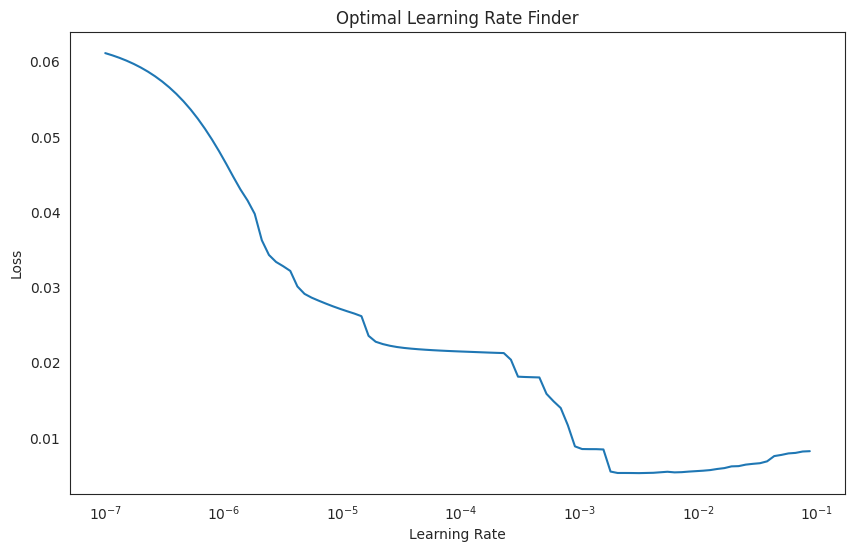

In [ ]:
# Initialize the Sequential model
model_rnn = Sequential()

# Use an Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, n_features)))

# Add a Simple RNN layer
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=False))

# Flatten the output (if needed)
model_rnn.add(Flatten())

# Add a Dense layer for output
model_rnn.add(Dense(n_steps_out, activation='relu'))

# Define the loss function
loss = tf.keras.losses.Huber()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# Compile the model
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mae'])

# Variables to store learning rates and losses
learning_rates = []
losses = []

# Learning rate range test parameters
initial_lr = 1e-7  # Start with a very small learning rate
max_lr = 0.1  # Maximum learning rate for the test
num_steps = 100  # Number of steps for learning rate increase

# Calculate the exponential step for learning rate increase
lr_step = (max_lr / initial_lr) ** (1 / num_steps)

# Perform the learning rate range test
for step in range(num_steps):
    # Set the learning rate dynamically using assign()
    lr = float(initial_lr * (lr_step ** step))
    model_rnn.optimizer.learning_rate.assign(lr)

    # Store the learning rate
    learning_rates.append(lr)

    # Train for one batch (or one epoch) with the current learning rate
    history = model_rnn.fit(X, y, epochs=1, batch_size=32, verbose=0)

    # Store the loss value
    losses.append(history.history['loss'][0])

# Plot the loss vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, losses)
plt.xscale('log')  # Use logarithmic scale for learning rate
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Optimal Learning Rate Finder')
plt.show()


In [ ]:
# Initialize the Sequential model
model_rnn = Sequential()

# Use an Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, n_features)))

# Add Simple RNN layers with more units and dropout
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=False))  # Increased units, relu activation
model_rnn.add(Dropout(0.2))  # Add dropout for regularization

# Flatten the output
model_rnn.add(Flatten())

# Add a Dense layer for output with linear activation
model_rnn.add(Dense(n_steps_out, activation='linear'))  # Linear activation for regression

# Define the loss function
loss = tf.keras.losses.Huber()

# Set the optimal learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Adjust this as needed

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop if val_loss doesn't improve for 10 epochs

# Compile the model
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mse'])


In [ ]:
# Train the model with early stopping
history = model_rnn.fit(
    X,
    y,
    epochs=100,  # You can adjust this
    batch_size=32,
    verbose=1,
    validation_data=(X1, y1),
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.0244 - mse: 0.0490 - val_loss: 0.0062 - val_mse: 0.0124
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0081 - mse: 0.0163 - val_loss: 0.0057 - val_mse: 0.0113
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0071 - mse: 0.0142 - val_loss: 0.0054 - val_mse: 0.0109
Epoch 4/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.0066 - mse: 0.0131 - val_loss: 0.0053 - val_mse: 0.0105
Epoch 5/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 0.0062 - mse: 0.0124 - val_loss: 0.0052 - val_mse: 0.0104
Epoch 6/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.0060 - mse: 0.0119 - val_loss: 0.0050 - val_mse: 0.0100
Epoch 7/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - loss: 0.0057 - mse: 0.0114 - val_loss: 0.0050 - val_mse: 0.0100
Epoch 8/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - loss: 0.0056 - mse: 0.0111 - val_loss: 0.0049 - val_mse: 0.0098
Epoch 9/100
1094

Epoch 1/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0560 - mse: 0.1120 - val_loss: 0.0337 - val_mse: 0.0674
Epoch 2/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0413 - mse: 0.0826 - val_loss: 0.0306 - val_mse: 0.0612
Epoch 3/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0365 - mse: 0.0729 - val_loss: 0.0281 - val_mse: 0.0562
Epoch 4/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0339 - mse: 0.0678 - val_loss: 0.0270 - val_mse: 0.0541
Epoch 5/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0329 - mse: 0.0657 - val_loss: 0.0261 - val_mse: 0.0521
Epoch 6/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0320 - mse: 0.0640 - val_loss: 0.0254 - val_mse: 0.0507
Epoch 7/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0313 - mse: 0.0626 - val_loss: 0.0247 - val_mse: 0.0494
Epoch 8/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0306 - mse: 0.0612 - val_loss: 0.0240 - val_mse: 0.0480
Epoch 9/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms

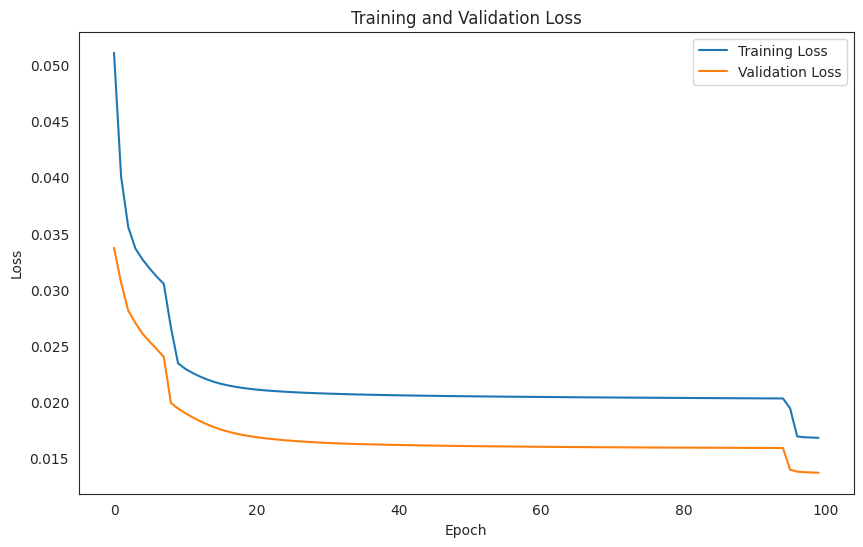

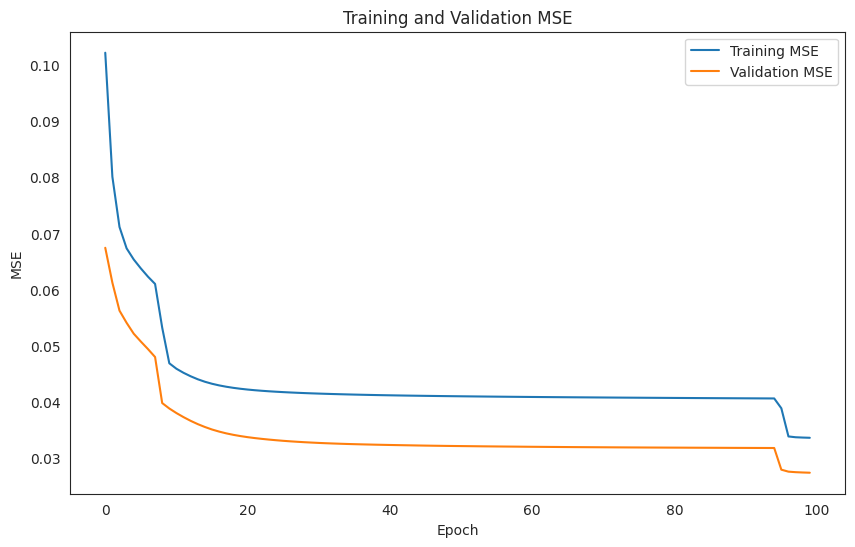

In [ ]:
'''
# Initialize the Sequential model
model_rnn = Sequential()

# Use an Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, n_features)))

# Add a Simple RNN layer
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=False))

# Flatten the output (if needed)
model_rnn.add(Flatten())

# Add a Dense layer for output
model_rnn.add(Dense(n_steps_out, activation='relu'))

# Define the loss function
loss = tf.keras.losses.Huber()

# Set the optimal learning rate found earlier

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

# Compile the model with the optimal learning rate
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

# Train the model with the optimal learning rate
history = model_rnn.fit(
    X,
    y,
    epochs=100,  # Adjust as needed
    batch_size=32,
    verbose=1,
    validation_data=(X1, y1)
)
'''

# Get the training and validation loss and MSE
mse = history.history['mse']
loss = history.history['loss']
val_mse = history.history['val_mse']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training and Validation MSE')
plt.show()


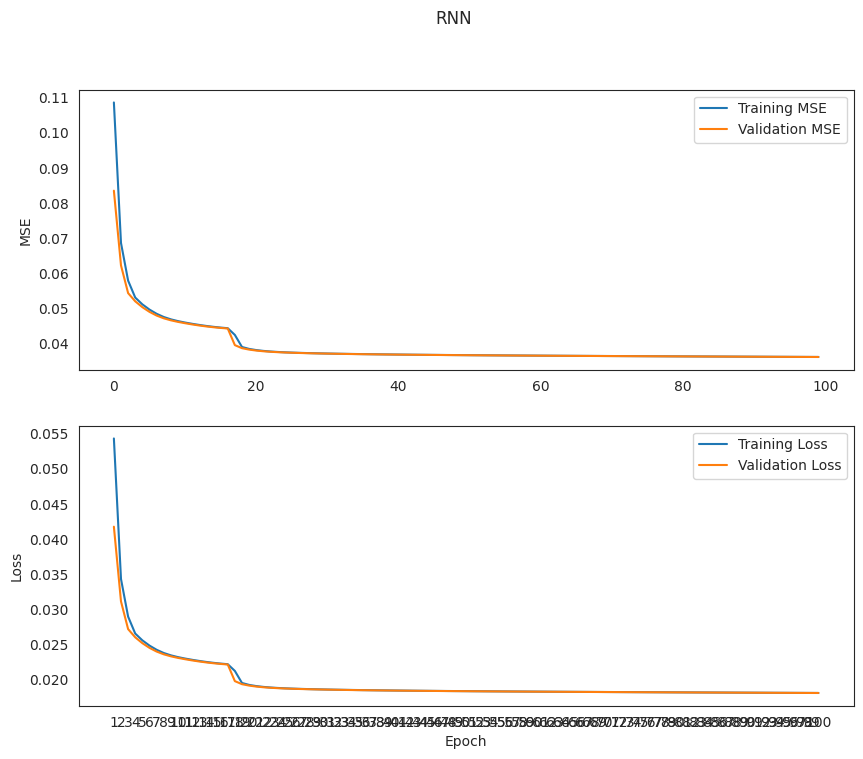

R-squared       MAE       MSE     CVRMSE
0   -0.38409  0.124985  0.036151  51.788682

In [ ]:
# PostProcessing
# create an instance of the MetricsPlotter class
metrics_plotter = MetricsPlotter(mse, val_mse, loss, val_loss)
metrics_plotter.plot(title='RNN')
yhat1 = model_rnn.predict(X1, verbose=0)
num_cols = n_steps_out
# Generate column names
pred_cols = ['pt' + str(i + 1) for i in range(num_cols)]
real_cols = ['t' + str(i + 1) for i in range(num_cols)]
# Create dataframes
df_prediction = pd.DataFrame(yhat1, columns=pred_cols)
df_realvalues = pd.DataFrame(y1, columns=real_cols)
pred_1 = df_prediction['pt1']
Real_1 = df_realvalues['t1']

metric.add(y1, yhat1)
metrics_df = metric.get()
end_time = time.time()

metrics_df

## Th rest

## nn

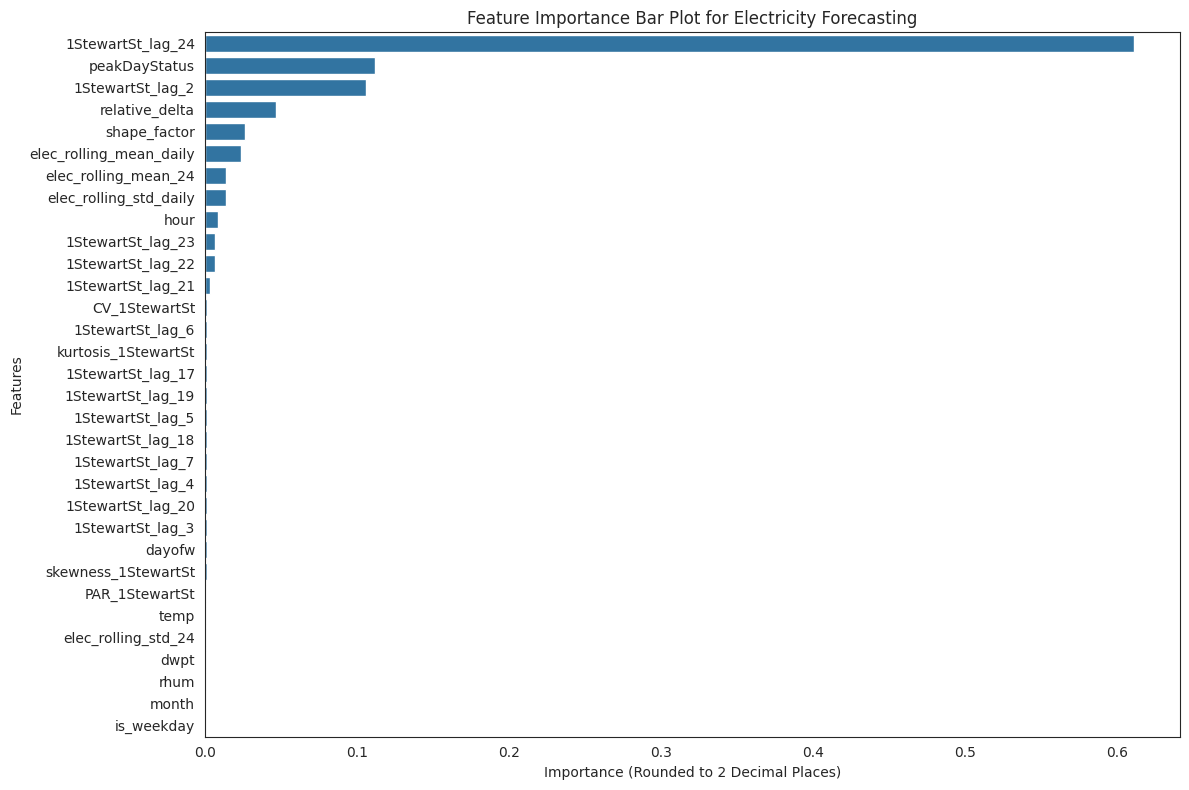

In [ ]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Round the importance values for clarity
importance_df['Importance'] = importance_df['Importance']

# Plot the feature importances as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature'
)
plt.title('Feature Importance Bar Plot for Electricity Forecasting')
plt.xlabel('Importance (Rounded to 2 Decimal Places)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
'''
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset with multiple features.
    Arguments:
        data: Sequence of observations as a Pandas DataFrame.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1) - Excluding the current time t
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # forecast sequence (t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{col}_t+{i}' for col in df.columns]
        else:
            names += [f'{col}_t+{i}' for col in df.columns]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

# Example usage with your dataset
# Assuming `data` is your DataFrame with the columns as you specified
data = normalized_data

n_in = 24  # Number of lag steps
n_out = 24  # Number of forecast steps

# Apply transformation to the data
transformed_data = series_to_supervised(data, n_in, n_out)
transformed_data
'''

'\ndef series_to_supervised(data, n_in=1, n_out=1, dropnan=True):\n    """\n    Frame a time series as a supervised learning dataset with multiple features.\n    Arguments:\n        data: Sequence of observations as a Pandas DataFrame.\n        n_in: Number of lag observations as input (X).\n        n_out: Number of observations as output (y).\n        dropnan: Boolean whether or not to drop rows with NaN values.\n    Returns:\n        Pandas DataFrame of series framed for supervised learning.\n    """\n    n_vars = data.shape[1]\n    df = DataFrame(data)\n    cols, names = list(), list()\n\n    # input sequence (t-n, ... t-1) - Excluding the current time t\n    for i in range(n_in, 0, -1):\n        cols.append(df.shift(i))\n        names += [f\'{col}_t-{i}\' for col in df.columns]\n\n    # forecast sequence (t+1, ... t+n)\n    for i in range(0, n_out):\n        cols.append(df.shift(-i))\n        if i == 0:\n            names += [f\'{col}_t+{i}\' for col in df.columns]\n        else:\n

## running models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from tqdm import tqdm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


def classification_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    Recall = TPR  # Recall is the same as True Positive Rate
    F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0  # F1 Score

    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "Recall": Recall,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }


In [ ]:
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)

    # Calculate Precision and F1 Score
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'F1 Score': f1}

## ex-ante forecasting and ex-post forecasting

## what are the best hyperparameters ?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from tqdm import tqdm

In [ ]:
# Define the function for converting series to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1, t)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # Include the current time step (t)
    cols.append(df)
    names += [f'{col}_t' for col in df.columns]

    # Forecast sequence (t+1, ... t+n) for 1StewartSt only
    for i in range(0, n_out):
        cols.append(df[['1StewartSt']].shift(-i))
        names += [f'1StewartSt_t+{i}' if i != 0 else '1StewartSt_t']

    # Combine all columns and drop rows with NaN values
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)

    return agg

# Prepare data
data = normalized_data  # Ensure normalized_data has the correct structure
n_in = 24  # Number of lag steps
n_out = 24  # Number of forecast steps
transformed_data = series_to_supervised(data, n_in, n_out)

# Split data
X = transformed_data.iloc[:, :-n_out].values  # Features
y = transformed_data.iloc[:, -n_out:].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter tuning with grid search and cross-validation
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)

# After identifying the best parameters, you can use them directly in your model initialization
BEST_N_ESTIMATORS = grid_search.best_params_['n_estimators']
BEST_MAX_DEPTH = grid_search.best_params_['max_depth']
BEST_MIN_SAMPLES_SPLIT = grid_search.best_params_['min_samples_split']
BEST_MIN_SAMPLES_LEAF = grid_search.best_params_['min_samples_leaf']

# Initialize the model with optimal parameters
best_model = RandomForestRegressor(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=BEST_MAX_DEPTH,
    min_samples_split=BEST_MIN_SAMPLES_SPLIT,
    min_samples_leaf=BEST_MIN_SAMPLES_LEAF,
    random_state=42
)

# Train the model
best_model.fit(X_train, y_train)

# Predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated R² score: 0.796498957735161


## initial nodel with selected hyperparametrs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1, t) - Including the current time t
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # Include the current time step (t)
    cols.append(df)
    names += [f'{col}_t' for col in df.columns]

    # Forecast sequence (t+1, ... t+n) for 1StewartSt only
    for i in range(0, n_out):
        cols.append(df[['1StewartSt']].shift(-i))
        if i == 0:
            names += [f'1StewartSt_t']
        else:
            names += [f'1StewartSt_t+{i}']

    # Combine all columns and drop rows with NaN values
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)

    return agg

def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)

    # Calculate Precision and F1 Score
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'F1 Score': f1}

# Prepare data
data = normalized_data  # Ensure normalized_data has the correct structure
n_in = 24  # Number of lag steps
n_out = 24  # Number of forecast steps
transformed_data = series_to_supervised(data, n_in, n_out)
'''
# Split data
X = transformed_data.iloc[:, :-n_out].values  # Features
y = transformed_data.iloc[:, -n_out:].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
'''

# Set the best parameters from previous tuning
BEST_N_ESTIMATORS = 100
BEST_MAX_DEPTH = 10
BEST_MIN_SAMPLES_SPLIT = 10
BEST_MIN_SAMPLES_LEAF = 4
BEST_MAX_FEATURES = 'sqrt'

# Initialize the model with optimal parameters
best_model = RandomForestRegressor(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=BEST_MAX_DEPTH,
    min_samples_split=BEST_MIN_SAMPLES_SPLIT,
    min_samples_leaf=BEST_MIN_SAMPLES_LEAF,
    max_features=BEST_MAX_FEATURES,
    random_state=42
)

# Train the model
best_model.fit(X_train, y_train)

# Predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Peak status calculation based on Z-score threshold
z_threshold = 2
y_pred_train_df = pd.DataFrame(y_pred_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_train_df = pd.DataFrame(y_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_pred_test_df = pd.DataFrame(y_pred_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_test_df = pd.DataFrame(y_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])

peak_status_pred_train = y_pred_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_train = y_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_pred_test = y_pred_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_test = y_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

# Calculate metrics
results = {
    'train': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []},
    'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []}
}

for dataset, peak_status_actual, peak_status_pred in [
    ('train', peak_status_actual_train, peak_status_pred_train),
    ('test', peak_status_actual_test, peak_status_pred_test)
]:
    for step in range(1, 25):
        col_name = f'1StewartSt_t+{step}'
        y_true = peak_status_actual[col_name]
        y_pred = peak_status_pred[col_name]
        metrics = calculate_metrics(y_true, y_pred)
        results[dataset]['true_positives'].append(metrics['TP'])
        results[dataset]['false_positives'].append(metrics['FP'])
        results[dataset]['false_negatives'].append(metrics['FN'])
        results[dataset]['true_negatives'].append(metrics['TN'])
        results[dataset]['precision'].append(metrics['Precision'])
        results[dataset]['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrames
train_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': results['train']['true_positives'],
    'False Positives': results['train']['false_positives'],
    'False Negatives': results['train']['false_negatives'],
    'True Negatives': results['train']['true_negatives'],
    'Precision': results['train']['precision'],
    'F1 Score': results['train']['f1_score']
})

test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})

In [ ]:
train_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1            1006              283              107           26599   
1    t+2             987              309              126           26573   
2    t+3             958              333              155           26549   
3    t+4             942              342              171           26540   
4    t+5             929              348              184           26534   
5    t+6             911              360              202           26522   
6    t+7             904              375              209           26507   
7    t+8             906              408              207           26474   
8    t+9             910              412              203           26470   
9   t+10             905              438              208           26444   
10  t+11             903              447              210           26435   
11  t+12             896              460              217           26422   
12  t+13             891              462              222           26420   
13  t+14             897              472              216           26410   
14  t+15             888              483              225           26399   
15  t+16             900              485              213           26397   
16  t+17             903              482              210           26400   
17  t+18             899              507              214           26375   
18  t+19             905              511              209           26370   
19  t+20             899              521              215           26360   
20  t+21             893              507              221           26374   
21  t+22             890              521              224           26360   
22  t+23             888              536              226           26345   
23  t+24             883              536              231           26345   

    Precision  F1 Score  
0    0.780450  0.837635  
1    0.761574  0.819427  
2    0.742060  0.797005  
3    0.733645  0.785982  
4    0.727486  0.777406  
5    0.716758  0.764262  
6    0.706802  0.755853  
7    0.689498  0.746601  
8    0.688351  0.747433  
9    0.673864  0.736971  
10   0.668889  0.733252  
11   0.660767  0.725800  
12   0.658537  0.722628  
13   0.655223  0.722804  
14   0.647702  0.714976  
15   0.649819  0.720576  
16   0.651986  0.722978  
17   0.639403  0.713775  
18   0.639124  0.715415  
19   0.633099  0.709550  
20   0.637857  0.710422  
21   0.630758  0.704950  
22   0.623596  0.699764  
23   0.622269  0.697197

In [ ]:
test_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             115               73               28            6783   
1    t+2             109               80               34            6776   
2    t+3             104               91               39            6765   
3    t+4             103               99               40            6757   
4    t+5              94              106               49            6750   
5    t+6              91              103               52            6753   
6    t+7              89              109               54            6747   
7    t+8              91              110               52            6746   
8    t+9              88              121               55            6735   
9   t+10              88              124               55            6732   
10  t+11              91              129               52            6727   
11  t+12              89              134               54            6722   
12  t+13              92              142               51            6714   
13  t+14              94              143               49            6713   
14  t+15              95              150               48            6706   
15  t+16              93              145               50            6711   
16  t+17              94              144               49            6712   
17  t+18              92              148               51            6708   
18  t+19              95              150               48            6706   
19  t+20              94              162               49            6694   
20  t+21              93              150               50            6706   
21  t+22              94              150               49            6706   
22  t+23              92              150               51            6706   
23  t+24              87              150               56            6706   

    Precision  F1 Score  
0    0.611702  0.694864  
1    0.576720  0.656627  
2    0.533333  0.615385  
3    0.509901  0.597101  
4    0.470000  0.548105  
5    0.469072  0.540059  
6    0.449495  0.521994  
7    0.452736  0.529070  
8    0.421053  0.500000  
9    0.415094  0.495775  
10   0.413636  0.501377  
11   0.399103  0.486339  
12   0.393162  0.488064  
13   0.396624  0.494737  
14   0.387755  0.489691  
15   0.390756  0.488189  
16   0.394958  0.493438  
17   0.383333  0.480418  
18   0.387755  0.489691  
19   0.367188  0.471178  
20   0.382716  0.481865  
21   0.385246  0.485788  
22   0.380165  0.477922  
23   0.367089  0.457895

##Forecaste profile > specify peak > imbalance method > forecast peaks ( decrease avvuracy significanyly)

Forecast the entire profile using RandomForestRegressor without any modifications for imbalance.

Label Peaks Based on Z-Score:



After forecasting, apply Z-score thresholding to classify peaks and non-peaks for both training and test sets.

Prepare Data for Peak Classification:



Use the labeled peak data to train a separate RandomForestClassifier.

Apply SMOTE to X_peak_train and y_peak_train to handle the imbalance in peak/non-peak data.

Train the Peak Classifier with Class Weights:



Train RandomForestClassifier using class weights to account for peak class rarity.

Evaluate Peak Detection on Test Set:



Use the trained classifier to predict peaks in the test set and calculate classification metrics for peak detection.

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

# Function for converting series to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1, t)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # Include the current time step (t)
    cols.append(df)
    names += [f'{col}_t' for col in df.columns]

    # Forecast sequence (t+1, ... t+n) for 1StewartSt only
    for i in range(0, n_out):
        cols.append(df[['1StewartSt']].shift(-i))
        names += [f'1StewartSt_t+{i}' if i != 0 else '1StewartSt_t']

    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)

    return agg

# Step 1: Forecast Profile using RandomForestRegressor
data = normalized_data  # Ensure normalized_data has the correct structure
n_in, n_out = 24, 24  # Lag steps and forecast steps
transformed_data = series_to_supervised(data, n_in, n_out)

X = transformed_data.iloc[:, :-n_out].values
y = transformed_data.iloc[:, -n_out:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Set optimal parameters from previous tuning
BEST_N_ESTIMATORS = 100
BEST_MAX_DEPTH = 10
BEST_MIN_SAMPLES_SPLIT = 10
BEST_MIN_SAMPLES_LEAF = 4
BEST_MAX_FEATURES = 'sqrt'

# Train profile forecasting model
profile_forecaster = RandomForestRegressor(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=BEST_MAX_DEPTH,
    min_samples_split=BEST_MIN_SAMPLES_SPLIT,
    min_samples_leaf=BEST_MIN_SAMPLES_LEAF,
    max_features=BEST_MAX_FEATURES,
    random_state=42
)
profile_forecaster.fit(X_train, y_train)

# Predict the profile
y_pred_train = profile_forecaster.predict(X_train)
y_pred_test = profile_forecaster.predict(X_test)

# Step 2: Identify Peaks and Train a Classifier for Peak Detection
z_threshold = 2
y_pred_train_df = pd.DataFrame(y_pred_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_train_df = pd.DataFrame(y_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_pred_test_df = pd.DataFrame(y_pred_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_test_df = pd.DataFrame(y_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])

# Calculate peak status for train and test sets
peak_status_pred_train = y_pred_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_train = y_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_pred_test = y_pred_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_test = y_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

# Flatten the data across all 24 forecast steps to apply SMOTE
X_peak_train_flattened = np.repeat(X_train, n_out, axis=0)  # Repeat each row 24 times for each forecast step
y_peak_train_flattened = peak_status_actual_train.values.flatten()  # Flatten to have one row per forecast step

# Use SMOTE to handle imbalance for peak classification
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_peak_train_resampled, y_peak_train_resampled = smote.fit_resample(X_peak_train_flattened, y_peak_train_flattened)

# Train a RandomForestClassifier for peak detection with class weights
peak_classifier = RandomForestClassifier(
    n_estimators=50, max_depth=10, class_weight='balanced', random_state=42
)
peak_classifier.fit(X_peak_train_resampled, y_peak_train_resampled)

# Predict peaks on test set for all 24 forecasted steps
y_peak_pred_flattened = peak_classifier.predict(np.repeat(X_test, n_out, axis=0))

# Reshape predictions back to the original 24-step structure for evaluation
y_peak_pred = y_peak_pred_flattened.reshape(-1, n_out)

# Calculate metrics for each step
results = {
    'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []}
}

# Function to calculate metrics for each forecasted step
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'F1 Score': f1}

# Calculate metrics for each forecast step on the test set
for step in range(n_out):
    y_true_step = peak_status_actual_test[f'1StewartSt_t+{step+1}'].values
    y_pred_step = y_peak_pred[:, step]
    metrics = calculate_metrics(y_true_step, y_pred_step)
    results['test']['true_positives'].append(metrics['TP'])
    results['test']['false_positives'].append(metrics['FP'])
    results['test']['false_negatives'].append(metrics['FN'])
    results['test']['true_negatives'].append(metrics['TN'])
    results['test']['precision'].append(metrics['Precision'])
    results['test']['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrame for easy viewing
test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, n_out + 1)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})



Testing Results:
    Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             101              539               42            6317   
1    t+2              91              549               52            6307   
2    t+3              75              565               68            6291   
3    t+4              60              580               83            6276   
4    t+5              49              591               94            6265   
5    t+6              43              597              100            6259   
6    t+7              37              603              106            6253   
7    t+8              36              604              107            6252   
8    t+9              36              604              107            6252   
9   t+10              37              603              106            6253   
10  t+11              42              598              101            6258   
11  t+12              47              593     

In [ ]:
test_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             101              539               42            6317   
1    t+2              91              549               52            6307   
2    t+3              75              565               68            6291   
3    t+4              60              580               83            6276   
4    t+5              49              591               94            6265   
5    t+6              43              597              100            6259   
6    t+7              37              603              106            6253   
7    t+8              36              604              107            6252   
8    t+9              36              604              107            6252   
9   t+10              37              603              106            6253   
10  t+11              42              598              101            6258   
11  t+12              47              593               96            6263   
12  t+13              56              584               87            6272   
13  t+14              62              578               81            6278   
14  t+15              76              564               67            6292   
15  t+16              89              551               54            6305   
16  t+17              97              543               46            6313   
17  t+18             101              539               42            6317   
18  t+19             102              538               41            6318   
19  t+20             101              539               42            6317   
20  t+21             103              537               40            6319   
21  t+22             103              537               40            6319   
22  t+23              98              542               45            6314   
23  t+24              90              550               53            6306   

    Precision  F1 Score  
0    0.157812  0.257982  
1    0.142187  0.232439  
2    0.117188  0.191571  
3    0.093750  0.153257  
4    0.076563  0.125160  
5    0.067187  0.109834  
6    0.057813  0.094508  
7    0.056250  0.091954  
8    0.056250  0.091954  
9    0.057813  0.094508  
10   0.065625  0.107280  
11   0.073438  0.120051  
12   0.087500  0.143040  
13   0.096875  0.158365  
14   0.118750  0.194125  
15   0.139063  0.227331  
16   0.151562  0.247765  
17   0.157812  0.257982  
18   0.159375  0.260536  
19   0.157812  0.257982  
20   0.160938  0.263091  
21   0.160938  0.263091  
22   0.153125  0.250319  
23   0.140625  0.229885

## forecatsing peaks directly

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
from scipy.stats import zscore

# Step 1: Define Peak Status Using Z-score
def define_peak_status(data, z_threshold=2):
    data['peakDayStatus'] = (zscore(data['1StewartSt']) >= z_threshold).astype(int)
    return data

data = normalized_data.copy()  # Ensure normalized_data has the correct structure
data = define_peak_status(data)  # Add the peak status column

# Step 2: Convert Time Series Data to Supervised Format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # Forecast step for peakDayStatus only (target)
    cols.append(df[['peakDayStatus']].shift(-n_out))
    names += [f'peakDayStatus_t+{n_out}']

    # Combine and clean up
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)

    return agg

n_in = 24  # Number of lag steps
transformed_data = series_to_supervised(data, n_in=n_in, n_out=1)

# Step 3: Split Data into Features (X) and Target (y)
X = transformed_data.drop(columns=['peakDayStatus_t+1'])
y = transformed_data['peakDayStatus_t+1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Use SMOTEENN to Address Imbalance
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Step 5: Train Classifier for Peak Forecasting
peak_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
peak_classifier.fit(X_resampled, y_resampled)

# Step 6: Make Predictions and Calculate Metrics
y_pred_train = peak_classifier.predict(X_train)
y_pred_test = peak_classifier.predict(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Evaluate and print metrics
print("Classification Report on Training Set:")
print(classification_report(y_train, y_pred_train))
train_metrics = calculate_metrics(y_train, y_pred_train)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))
test_metrics = calculate_metrics(y_test, y_pred_test)

# Display metrics for clarity
print("\nTraining Metrics:")
print(train_metrics)
print("\nTesting Metrics:")
print(test_metrics)


Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     26784
         1.0       0.58      1.00      0.74      1228

    accuracy                           0.97     28012
   macro avg       0.79      0.98      0.86     28012
weighted avg       0.98      0.97      0.97     28012


Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6937
         1.0       0.30      0.75      0.42        67

    accuracy                           0.98      7004
   macro avg       0.65      0.86      0.71      7004
weighted avg       0.99      0.98      0.98      7004


Training Metrics:
{'TP': 1228, 'FP': 885, 'FN': 0, 'TN': 25899, 'Precision': 0.5811642214860389, 'Recall': 1.0, 'F1 Score': 0.7351092487279258}

Testing Metrics:
{'TP': 50, 'FP': 119, 'FN': 17, 'TN': 6818, 'Precision': 0.2958579881656805, 'Recall': 0.746268656716418, 'F

In [ ]:
transformed_data

1StewartSt_t-24  temp_t-24  dwpt_t-24  rhum_t-24  hour_t-24  \
24            0.157358   0.425197   0.529118   0.882353   0.000000   
25            0.157016   0.426772   0.535774   0.905882   0.043478   
26            0.156166   0.411024   0.529118   0.952941   0.086957   
27            0.156984   0.417323   0.530782   0.929412   0.130435   
28            0.156736   0.412598   0.527454   0.941176   0.173913   
...                ...        ...        ...        ...        ...   
35035         0.180187   0.455118   0.500832   0.635294   0.826087   
35036         0.182943   0.455118   0.504160   0.647059   0.869565   
35037         0.186321   0.451969   0.509151   0.682353   0.913043   
35038         0.174736   0.450394   0.502496   0.658824   0.956522   
35039         0.173658   0.448819   0.497504   0.647059   1.000000   

       dayofw_t-24  month_t-24  peakDayStatus_t-24  1StewartSt_t-23  \
24        0.666667         0.0                 0.0         0.157016   
25        0.666667         0.0                 0.0         0.156166   
26        0.666667         0.0                 0.0         0.156984   
27        0.666667         0.0                 0.0         0.156736   
28        0.666667         0.0                 0.0         0.156539   
...            ...         ...                 ...              ...   
35035     1.000000         1.0                 0.0         0.182943   
35036     1.000000         1.0                 0.0         0.186321   
35037     1.000000         1.0                 0.0         0.174736   
35038     1.000000         1.0                 0.0         0.173658   
35039     1.000000         1.0                 0.0         0.180694   

       temp_t-23  ...  peakDayStatus_t-2  1StewartSt_t-1  temp_t-1  dwpt_t-1  \
24      0.426772  ...                0.0        0.157782  0.422047  0.527454   
25      0.411024  ...                0.0        0.158964  0.429921  0.510815   
26      0.417323  ...                0.0        0.157969  0.428346  0.502496   
27      0.412598  ...                0.0        0.157016  0.423622  0.497504   
28      0.418898  ...                0.0        0.158176  0.418898  0.504160   
...          ...  ...                ...             ...       ...       ...   
35035   0.455118  ...                0.0        0.196363  0.401575  0.505824   
35036   0.451969  ...                0.0        0.195855  0.429921  0.524126   
35037   0.450394  ...                0.0        0.187948  0.418898  0.519135   
35038   0.448819  ...                0.0        0.188601  0.422047  0.530782   
35039   0.442520  ...                0.0        0.179627  0.429921  0.539101   

       rhum_t-1  hour_t-1  dayofw_t-1  month_t-1  peakDayStatus_t-1  \
24     0.894118  1.000000    0.666667        0.0                0.0   
25     0.776471  0.000000    0.833333        0.0                0.0   
26     0.752941  0.043478    0.833333        0.0                0.0   
27     0.752941  0.086957    0.833333        0.0                0.0   
28     0.800000  0.130435    0.833333        0.0                0.0   
...         ...       ...         ...        ...                ...   
35035  0.894118  0.782609    0.000000        1.0                0.0   
35036  0.835294  0.826087    0.000000        1.0                0.0   
35037  0.870588  0.869565    0.000000        1.0                0.0   
35038  0.905882  0.913043    0.000000        1.0                0.0   
35039  0.905882  0.956522    0.000000        1.0                0.0   

       peakDayStatus_t+1  
24                   0.0  
25                   0.0  
26                   0.0  
27                   0.0  
28                   0.0  
...                  ...  
35035                0.0  
35036                0.0  
35037                0.0  
35038                0.0  
35039                0.0  

[35016 rows x 193 columns]

## eds

## Forecasting Peaks in binary method Random Forest( make a chart that how accuarcte you can go)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from tqdm import tqdm

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1, t) - Including the current time t
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # Include the current time step (t)
    cols.append(df)
    names += [f'{col}_t' for col in df.columns]

    # Forecast sequence (t+1, ... t+n) for 1StewartSt only
    for i in range(0, n_out):
        cols.append(df[['1StewartSt']].shift(-i))
        if i == 0:
            names += [f'1StewartSt_t']
        else:
            names += [f'1StewartSt_t+{i}']

    # Combine all columns and drop rows with NaN values
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)

    return agg

def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)

    # Calculate Precision and F1 Score
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'F1 Score': f1}

# Prepare data
data = normalized_data  # Ensure normalized_data has the correct structure
n_in = 24  # Number of lag steps
n_out = 24  # Number of forecast steps
transformed_data = series_to_supervised(data, n_in, n_out)

# Split data
X = transformed_data.iloc[:, :-n_out].values  # Features
y = transformed_data.iloc[:, -n_out:].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter tuning with grid search and cross-validation
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Use the best model
best_model = grid_search.best_estimator_

# Predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Peak status calculation based on Z-score threshold
z_threshold = 2
y_pred_train_df = pd.DataFrame(y_pred_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_train_df = pd.DataFrame(y_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_pred_test_df = pd.DataFrame(y_pred_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_test_df = pd.DataFrame(y_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])

peak_status_pred_train = y_pred_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_train = y_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_pred_test = y_pred_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_test = y_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

# Calculate metrics
results = {
    'train': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []},
    'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []}
}

for dataset, peak_status_actual, peak_status_pred in [
    ('train', peak_status_actual_train, peak_status_pred_train),
    ('test', peak_status_actual_test, peak_status_pred_test)
]:
    for step in range(1, 25):
        col_name = f'1StewartSt_t+{step}'
        y_true = peak_status_actual[col_name]
        y_pred = peak_status_pred[col_name]
        metrics = calculate_metrics(y_true, y_pred)
        results[dataset]['true_positives'].append(metrics['TP'])
        results[dataset]['false_positives'].append(metrics['FP'])
        results[dataset]['false_negatives'].append(metrics['FN'])
        results[dataset]['true_negatives'].append(metrics['TN'])
        results[dataset]['precision'].append(metrics['Precision'])
        results[dataset]['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrames
train_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': results['train']['true_positives'],
    'False Positives': results['train']['false_positives'],
    'False Negatives': results['train']['false_negatives'],
    'True Negatives': results['train']['true_negatives'],
    'Precision': results['train']['precision'],
    'F1 Score': results['train']['f1_score']
})

test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})

'''
# Visualization
for dataset, results_df in [('Training', train_results_df), ('Testing', test_results_df)]:
    plt.figure(figsize=(14, 8))
    outcome_columns = ['True Positives', 'False Positives', 'False Negatives', 'True Negatives']
    results_df.plot(x='Step', y=outcome_columns, kind='bar', stacked=False, figsize=(14, 8))
    plt.title(f"Confusion Matrix Outcomes for Each Forecasted Step ({dataset} Data)")
    plt.xlabel("Forecast Step")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

for dataset, results_df in [('Training', train_results_df), ('Testing', test_results_df)]:
    plt.figure(figsize=(14, 6))
    results_df.plot(x='Step', y=['Precision', 'F1 Score'], kind='line', marker='o', figsize=(14, 6))
    plt.title(f"Precision and F1 Score for Each Forecasted Step ({dataset} Data)")
    plt.xlabel("Forecast Step")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()
'''

'\n# Visualization\nfor dataset, results_df in [(\'Training\', train_results_df), (\'Testing\', test_results_df)]:\n    plt.figure(figsize=(14, 8))\n    outcome_columns = [\'True Positives\', \'False Positives\', \'False Negatives\', \'True Negatives\']\n    results_df.plot(x=\'Step\', y=outcome_columns, kind=\'bar\', stacked=False, figsize=(14, 8))\n    plt.title(f"Confusion Matrix Outcomes for Each Forecasted Step ({dataset} Data)")\n    plt.xlabel("Forecast Step")\n    plt.ylabel("Count")\n    plt.xticks(rotation=45)\n    plt.legend(loc="upper right")\n    plt.show()\n\nfor dataset, results_df in [(\'Training\', train_results_df), (\'Testing\', test_results_df)]:\n    plt.figure(figsize=(14, 6))\n    results_df.plot(x=\'Step\', y=[\'Precision\', \'F1 Score\'], kind=\'line\', marker=\'o\', figsize=(14, 6))\n    plt.title(f"Precision and F1 Score for Each Forecasted Step ({dataset} Data)")\n    plt.xlabel("Forecast Step")\n    plt.ylabel("Score")\n    plt.xticks(rotation=45)\n    plt.

In [ ]:
test_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             134               16                9            6840   
1    t+2             130               66               13            6790   
2    t+3             120               87               23            6769   
3    t+4             109               96               34            6760   
4    t+5              95              101               48            6755   
5    t+6              85              104               58            6752   
6    t+7              77              105               66            6751   
7    t+8              87              122               56            6734   
8    t+9              91              143               52            6713   
9   t+10              92              144               51            6712   
10  t+11              86              147               57            6709   
11  t+12              88              154               55            6702   
12  t+13              84              151               59            6705   
13  t+14              94              147               49            6709   
14  t+15              97              151               46            6705   
15  t+16              94              163               49            6693   
16  t+17              84              154               59            6702   
17  t+18              83              165               60            6691   
18  t+19              85              157               58            6699   
19  t+20              90              165               53            6691   
20  t+21              92              187               51            6669   
21  t+22              91              174               52            6682   
22  t+23              84              173               59            6683   
23  t+24              85              169               58            6687   

    Precision  F1 Score  
0    0.893333  0.914676  
1    0.663265  0.766962  
2    0.579710  0.685714  
3    0.531707  0.626437  
4    0.484694  0.560472  
5    0.449735  0.512048  
6    0.423077  0.473846  
7    0.416268  0.494318  
8    0.388889  0.482759  
9    0.389831  0.485488  
10   0.369099  0.457447  
11   0.363636  0.457143  
12   0.357447  0.444444  
13   0.390041  0.489583  
14   0.391129  0.496164  
15   0.365759  0.470000  
16   0.352941  0.440945  
17   0.334677  0.424552  
18   0.351240  0.441558  
19   0.352941  0.452261  
20   0.329749  0.436019  
21   0.343396  0.446078  
22   0.326848  0.420000  
23   0.334646  0.428212

In [ ]:
train_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1            1078              123               35           26759   
1    t+2            1021              181               92           26701   
2    t+3             983              271              130           26611   
3    t+4             955              280              158           26602   
4    t+5             919              284              194           26598   
5    t+6             901              307              212           26575   
6    t+7             896              344              217           26538   
7    t+8             903              355              210           26527   
8    t+9             895              390              218           26492   
9   t+10             896              403              217           26479   
10  t+11             895              395              218           26487   
11  t+12             874              392              239           26490   
12  t+13             865              408              248           26474   
13  t+14             881              425              232           26457   
14  t+15             885              436              228           26446   
15  t+16             907              438              206           26444   
16  t+17             904              456              209           26426   
17  t+18             902              438              211           26444   
18  t+19             898              423              216           26458   
19  t+20             903              445              211           26436   
20  t+21             909              458              205           26423   
21  t+22             909              467              205           26414   
22  t+23             895              473              219           26408   
23  t+24             891              473              223           26408   

    Precision  F1 Score  
0    0.897585  0.931720  
1    0.849418  0.882073  
2    0.783892  0.830587  
3    0.773279  0.813458  
4    0.763924  0.793610  
5    0.745861  0.776389  
6    0.722581  0.761581  
7    0.717806  0.761704  
8    0.696498  0.746455  
9    0.689761  0.742952  
10   0.693798  0.744902  
11   0.690363  0.734763  
12   0.679497  0.725063  
13   0.674579  0.728400  
14   0.669947  0.727198  
15   0.674349  0.737998  
16   0.664706  0.731096  
17   0.673134  0.735426  
18   0.679788  0.737577  
19   0.669881  0.733550  
20   0.664960  0.732769  
21   0.660610  0.730120  
22   0.654240  0.721193  
23   0.653226  0.719128

In [ ]:
from scipy.stats import zscore
# Function to calculate peak day status based on a Z-score threshold
def calculate_peak_status(demand_series, threshold):
    return (zscore(demand_series) >= threshold).astype(int).replace({1: 'Yes', 0: 'No'})

In [ ]:
def classification_metrics(y_true, y_pred, threshold=None):
    if threshold is not None:
        y_pred_binary = (y_pred >= threshold).astype(int)
    else:
        y_pred_binary = y_pred.astype(int)

    y_true_binary = y_true.astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) != 0 else 0  # F1 Score

    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }

In [ ]:
# Post-processing: Define peaks based on the Z-score threshold
z_threshold = 2  # Adjustable Z-score threshold for peak identification

# Convert predictions and actual values back to DataFrame for peak analysis
y_pred_df = pd.DataFrame(y_pred, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_test_df = pd.DataFrame(y_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])

In [ ]:
# Calculate peak status for each time step in the test set
peak_status_pred = y_pred_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual = y_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

# Calculate classification metrics for each step
metrics_per_step = {}
for col in y_test_df.columns:
    metrics = classification_metrics(peak_status_actual[col], peak_status_pred[col])
    metrics_per_step[col] = metrics

# Print classification metrics for each forecast step
print("Classification Metrics for each forecast step:")
for step, metrics in metrics_per_step.items():
    print(f"Metrics for {step}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [ ]:
from sklearn.metrics import confusion_matrix
# Initialize lists to store the outcomes and metrics for each forecasted step
true_positives = []
false_positives = []
false_negatives = []
true_negatives = []
precision = []
f1_score = []

# Loop through each forecasted step (t+1 to t+24) and calculate confusion matrix outcomes and metrics
for step in range(1, 25):
    col_name = f'1StewartSt_t+{step}'

    # Get actual and predicted peak statuses for the current step
    y_true = peak_status_actual[col_name]
    y_pred = peak_status_pred[col_name]

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)  # Handle cases with no positives/negatives

    # Append the results for the current step
    true_positives.append(tp)
    false_positives.append(fp)
    false_negatives.append(fn)
    true_negatives.append(tn)

    # Calculate Precision and F1 Score
    prec = tp / (tp + fp) if (tp + fp) != 0 else 0  # Precision
    f1 = 2 * (prec * (tp / (tp + fn))) / (prec + (tp / (tp + fn))) if (prec + (tp / (tp + fn))) != 0 else 0  # F1 Score
    precision.append(prec)
    f1_score.append(f1)

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': true_positives,
    'False Positives': false_positives,
    'False Negatives': false_negatives,
    'True Negatives': true_negatives,
    'Precision': precision,
    'F1 Score': f1_score
})

In [ ]:
results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1            1100               36               13           26846   
1    t+2            1075               75               38           26807   
2    t+3            1058               92               55           26790   
3    t+4            1043              108               70           26774   
4    t+5            1049              113               64           26769   
5    t+6            1032              128               81           26754   
6    t+7            1031              141               82           26741   
7    t+8            1023              153               90           26729   
8    t+9            1023              147               90           26735   
9   t+10            1020              135               93           26747   
10  t+11            1016              140               97           26742   
11  t+12            1018              137               95           26745   
12  t+13            1014              140               99           26742   
13  t+14            1020              139               93           26743   
14  t+15            1014              146               99           26736   
15  t+16            1023              145               90           26737   
16  t+17            1028              161               85           26721   
17  t+18            1033              151               80           26731   
18  t+19            1029              157               85           26724   
19  t+20            1017              155               97           26726   
20  t+21            1023              168               91           26713   
21  t+22            1023              163               91           26718   
22  t+23            1023              163               91           26718   
23  t+24            1023              162               91           26719   

    Precision  F1 Score  
0    0.968310  0.978213  
1    0.934783  0.950066  
2    0.920000  0.935042  
3    0.906169  0.921378  
4    0.902754  0.922198  
5    0.889655  0.908051  
6    0.879693  0.902407  
7    0.869898  0.893840  
8    0.874359  0.896189  
9    0.883117  0.899471  
10   0.878893  0.895549  
11   0.881385  0.897707  
12   0.878683  0.894574  
13   0.880069  0.897887  
14   0.874138  0.892213  
15   0.875856  0.896975  
16   0.864592  0.893136  
17   0.872466  0.899434  
18   0.867622  0.894783  
19   0.867747  0.889764  
20   0.858942  0.887636  
21   0.862563  0.889565  
22   0.862563  0.889565  
23   0.863291  0.889952

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
# Post-processing: Define peaks based on the Z-score threshold
z_threshold = 2  # Adjustable Z-score threshold for peak identification

# Convert predictions and actual values back to DataFrame for peak analysis
y_pred_df_train = pd.DataFrame(y_pred_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_test_df_train = pd.DataFrame(y_pred_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])

In [ ]:
# Calculate peak status for each time step in the test set
peak_status_pred_train = y_pred_df_train.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_train = y_test_df_train.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

# Calculate classification metrics for each step
metrics_per_step = {}
for col in y_test_df_train.columns:
    metrics = classification_metrics(peak_status_actual_train[col], peak_status_pred_train[col])
    metrics_per_step[col] = metrics

# Print classification metrics for each forecast step
print("Classification Metrics for each forecast step:")
for step, metrics in metrics_per_step.items():
    print(f"Metrics for {step}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")

Classification Metrics for each forecast step:
Metrics for 1StewartSt_t+1:
  True Positive Rate (Recall): 1.0
  False Positive Rate: 0.0
  Precision: 1.0
  F1 Score: 1.0
  True Positives: 1136
  False Positives: 0
  False Negatives: 0
  True Negatives: 26859
Metrics for 1StewartSt_t+2:
  True Positive Rate (Recall): 1.0
  False Positive Rate: 0.0
  Precision: 1.0
  F1 Score: 1.0
  True Positives: 1150
  False Positives: 0
  False Negatives: 0
  True Negatives: 26845
Metrics for 1StewartSt_t+3:
  True Positive Rate (Recall): 1.0
  False Positive Rate: 0.0
  Precision: 1.0
  F1 Score: 1.0
  True Positives: 1150
  False Positives: 0
  False Negatives: 0
  True Negatives: 26845
Metrics for 1StewartSt_t+4:
  True Positive Rate (Recall): 1.0
  False Positive Rate: 0.0
  Precision: 1.0
  F1 Score: 1.0
  True Positives: 1151
  False Positives: 0
  False Negatives: 0
  True Negatives: 26844
Metrics for 1StewartSt_t+5:
  True Positive Rate (Recall): 1.0
  False Positive Rate: 0.0
  Precision: 1.

In [ ]:
peak_status_pred_train = y_pred_df_train.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_train = y_test_df_train.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

In [ ]:
from sklearn.metrics import confusion_matrix
# Initialize lists to store the outcomes and metrics for each forecasted step
true_positives = []
false_positives = []
false_negatives = []
true_negatives = []
precision = []
f1_score = []

# Loop through each forecasted step (t+1 to t+24) and calculate confusion matrix outcomes and metrics
for step in range(1, 25):
    col_name = f'1StewartSt_t+{step}'

    # Get actual and predicted peak statuses for the current step
    y_true = peak_status_actual_train[col_name]
    y_pred = peak_status_pred_train[col_name]

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)  # Handle cases with no positives/negatives

    # Append the results for the current step
    true_positives.append(tp)
    false_positives.append(fp)
    false_negatives.append(fn)
    true_negatives.append(tn)

    # Calculate Precision and F1 Score
    prec = tp / (tp + fp) if (tp + fp) != 0 else 0  # Precision
    f1 = 2 * (prec * (tp / (tp + fn))) / (prec + (tp / (tp + fn))) if (prec + (tp / (tp + fn))) != 0 else 0  # F1 Score
    precision.append(prec)
    f1_score.append(f1)

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': true_positives,
    'False Positives': false_positives,
    'False Negatives': false_negatives,
    'True Negatives': true_negatives,
    'Precision': precision,
    'F1 Score': f1_score
})

In [ ]:
results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1            1136                0                0           26859   
1    t+2            1150                0                0           26845   
2    t+3            1150                0                0           26845   
3    t+4            1151                0                0           26844   
4    t+5            1162                0                0           26833   
5    t+6            1160                0                0           26835   
6    t+7            1172                0                0           26823   
7    t+8            1176                0                0           26819   
8    t+9            1170                0                0           26825   
9   t+10            1155                0                0           26840   
10  t+11            1156                0                0           26839   
11  t+12            1155                0                0           26840   
12  t+13            1154                0                0           26841   
13  t+14            1159                0                0           26836   
14  t+15            1160                0                0           26835   
15  t+16            1168                0                0           26827   
16  t+17            1189                0                0           26806   
17  t+18            1184                0                0           26811   
18  t+19            1186                0                0           26809   
19  t+20            1172                0                0           26823   
20  t+21            1191                0                0           26804   
21  t+22            1186                0                0           26809   
22  t+23            1186                0                0           26809   
23  t+24            1185                0                0           26810   

    Precision  F1 Score  
0         1.0       1.0  
1         1.0       1.0  
2         1.0       1.0  
3         1.0       1.0  
4         1.0       1.0  
5         1.0       1.0  
6         1.0       1.0  
7         1.0       1.0  
8         1.0       1.0  
9         1.0       1.0  
10        1.0       1.0  
11        1.0       1.0  
12        1.0       1.0  
13        1.0       1.0  
14        1.0       1.0  
15        1.0       1.0  
16        1.0       1.0  
17        1.0       1.0  
18        1.0       1.0  
19        1.0       1.0  
20        1.0       1.0  
21        1.0       1.0  
22        1.0       1.0  
23        1.0       1.0

## Xgboost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from tqdm import tqdm

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1, t) - Including the current time t
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # Include the current time step (t)
    cols.append(df)
    names += [f'{col}_t' for col in df.columns]

    # Forecast sequence (t+1, ... t+n) for 1StewartSt only
    for i in range(0, n_out):
        cols.append(df[['1StewartSt']].shift(-i))
        if i == 0:
            names += [f'1StewartSt_t']
        else:
            names += [f'1StewartSt_t+{i}']

    # Combine all columns and drop rows with NaN values
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)

    return agg

def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)

    # Calculate Precision and F1 Score
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'F1 Score': f1}

# Prepare data
data = normalized_data  # Ensure normalized_data has the correct structure
n_in = 24  # Number of lag steps
n_out = 24  # Number of forecast steps
transformed_data = series_to_supervised(data, n_in, n_out)

# Split data
X = transformed_data.iloc[:, :-n_out].values  # Features
y = transformed_data.iloc[:, -n_out:].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter tuning with grid search and cross-validation
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Use XGBRegressor instead of RandomForestRegressor
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Use the best model
best_model = grid_search.best_estimator_

# Predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Peak status calculation based on Z-score threshold
z_threshold = 2
y_pred_train_df = pd.DataFrame(y_pred_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_train_df = pd.DataFrame(y_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_pred_test_df = pd.DataFrame(y_pred_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_test_df = pd.DataFrame(y_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])

peak_status_pred_train = y_pred_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_train = y_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_pred_test = y_pred_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_test = y_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

# Calculate metrics
results = {
    'train': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []},
    'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []}
}

for dataset, peak_status_actual, peak_status_pred in [
    ('train', peak_status_actual_train, peak_status_pred_train),
    ('test', peak_status_actual_test, peak_status_pred_test)
]:
    for step in range(1, 25):
        col_name = f'1StewartSt_t+{step}'
        y_true = peak_status_actual[col_name]
        y_pred = peak_status_pred[col_name]
        metrics = calculate_metrics(y_true, y_pred)
        results[dataset]['true_positives'].append(metrics['TP'])
        results[dataset]['false_positives'].append(metrics['FP'])
        results[dataset]['false_negatives'].append(metrics['FN'])
        results[dataset]['true_negatives'].append(metrics['TN'])
        results[dataset]['precision'].append(metrics['Precision'])
        results[dataset]['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrames
train_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': results['train']['true_positives'],
    'False Positives': results['train']['false_positives'],
    'False Negatives': results['train']['false_negatives'],
    'True Negatives': results['train']['true_negatives'],
    'Precision': results['train']['precision'],
    'F1 Score': results['train']['f1_score']
})

test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, 25)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})

# Visualization code for plotting results goes here (unchanged)


In [ ]:
train_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1            1105               31                8           26851   
1    t+2            1020              140               93           26742   
2    t+3             986              214              127           26668   
3    t+4             965              263              148           26619   
4    t+5             944              294              169           26588   
5    t+6             928              294              185           26588   
6    t+7             918              311              195           26571   
7    t+8             921              337              192           26545   
8    t+9             914              334              199           26548   
9   t+10             912              348              201           26534   
10  t+11             917              385              196           26497   
11  t+12             914              384              199           26498   
12  t+13             914              365              199           26517   
13  t+14             915              380              198           26502   
14  t+15             915              393              198           26489   
15  t+16             925              384              188           26498   
16  t+17             919              413              194           26469   
17  t+18             907              392              206           26490   
18  t+19             933              398              181           26483   
19  t+20             918              392              196           26489   
20  t+21             922              407              192           26474   
21  t+22             927              411              187           26470   
22  t+23             922              407              192           26474   
23  t+24             914              383              200           26498   

    Precision  F1 Score  
0    0.972711  0.982659  
1    0.879310  0.897492  
2    0.821667  0.852572  
3    0.785831  0.824434  
4    0.762520  0.803063  
5    0.759411  0.794861  
6    0.746949  0.783945  
7    0.732114  0.776887  
8    0.732372  0.774248  
9    0.723810  0.768647  
10   0.704301  0.759420  
11   0.704160  0.758192  
12   0.714621  0.764214  
13   0.706564  0.759967  
14   0.699541  0.755886  
15   0.706646  0.763832  
16   0.689940  0.751738  
17   0.698229  0.752073  
18   0.700977  0.763190  
19   0.700763  0.757426  
20   0.693755  0.754810  
21   0.692825  0.756117  
22   0.693755  0.754810  
23   0.704703  0.758192

In [ ]:
test_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             142                0                1            6856   
1    t+2             129               31               14            6825   
2    t+3             112               58               31            6798   
3    t+4             110               66               33            6790   
4    t+5              96               63               47            6793   
5    t+6              84               72               59            6784   
6    t+7              79               96               64            6760   
7    t+8              74               93               69            6763   
8    t+9              79               87               64            6769   
9   t+10              76              100               67            6756   
10  t+11              86              105               57            6751   
11  t+12              74              105               69            6751   
12  t+13              74              110               69            6746   
13  t+14              86              132               57            6724   
14  t+15              91              120               52            6736   
15  t+16              84              150               59            6706   
16  t+17              91              158               52            6698   
17  t+18              87              145               56            6711   
18  t+19              90              151               53            6705   
19  t+20              87              139               56            6717   
20  t+21              90              159               53            6697   
21  t+22              84              149               59            6707   
22  t+23              92              154               51            6702   
23  t+24              85              156               58            6700   

    Precision  F1 Score  
0    1.000000  0.996491  
1    0.806250  0.851485  
2    0.658824  0.715655  
3    0.625000  0.689655  
4    0.603774  0.635762  
5    0.538462  0.561873  
6    0.451429  0.496855  
7    0.443114  0.477419  
8    0.475904  0.511327  
9    0.431818  0.476489  
10   0.450262  0.514970  
11   0.413408  0.459627  
12   0.402174  0.452599  
13   0.394495  0.476454  
14   0.431280  0.514124  
15   0.358974  0.445623  
16   0.365462  0.464286  
17   0.375000  0.464000  
18   0.373444  0.468750  
19   0.384956  0.471545  
20   0.361446  0.459184  
21   0.360515  0.446809  
22   0.373984  0.473008  
23   0.352697  0.442708

## Adding imbalance method to random forest

In [ ]:
'''
# Statistical feature generation
def add_statistical_features(df, window_size=24):
    df['rolling_mean'] = df['1StewartSt'].rolling(window=window_size).mean()
    df['rolling_std'] = df['1StewartSt'].rolling(window=window_size).std()
    df['rolling_skew'] = df['1StewartSt'].rolling(window=window_size).skew()
    df['rolling_kurtosis'] = df['1StewartSt'].rolling(window=window_size).apply(pd.Series.kurtosis, raw=True)
    df.fillna(0, inplace=True)  # Fill NaNs introduced by rolling calculations
    return df
# Add statistical features to your dataset
data = add_statistical_features(data)


# Function to add time-based features
def add_time_based_features(df):
    df['time_since_last_peak'] = (df.index - df[df['peak_label'] == 1].index.to_series()).fillna(method='ffill')
    df['time_until_next_peak'] = (df[df['peak_label'] == 1].index.to_series().shift(-1) - df.index).fillna(method='bfill')

    # Convert timedelta to seconds or suitable unit
    df['time_since_last_peak'] = df['time_since_last_peak'].dt.total_seconds().fillna(0)
    df['time_until_next_peak'] = df['time_until_next_peak'].dt.total_seconds().fillna(0)
    return df

# Ensure peaks are labeled in your data (e.g., based on Z-score threshold)
data['peak_label'] = (zscore(data['1StewartSt']) >= z_threshold).astype(int)
data = add_time_based_features(data)



from scipy.fftpack import fft

# Function to add spectral features
def add_spectral_features(df, n_coefficients=5):
    fft_values = fft(df['1StewartSt'].values)
    fft_features = np.abs(fft_values[:n_coefficients])  # Only take the first few coefficients
    for i in range(n_coefficients):
        df[f'fft_coeff_{i+1}'] = fft_features[i]
    return df

# Add spectral features to your dataset
data = add_spectral_features(data)



# Add statistical, time-based, and spectral features
data = add_statistical_features(data)
data = add_time_based_features(data)
data = add_spectral_features(data)

# Prepare the data for training/testing split
transformed_data = series_to_supervised(data, n_in, n_out)
X = transformed_data.iloc[:, :-n_out].values
y = transformed_data.iloc[:, -n_out:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train your RandomForestRegressor as usual with the new feature set
profile_forecaster = RandomForestRegressor(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=BEST_MAX_DEPTH,
    min_samples_split=BEST_MIN_SAMPLES_SPLIT,
    min_samples_leaf=BEST_MIN_SAMPLES_LEAF,
    max_features=BEST_MAX_FEATURES,
    random_state=42
)
profile_forecaster.fit(X_train, y_train)

# Forecast and evaluate
y_pred_train = profile_forecaster.predict(X_train)
y_pred_test = profile_forecaster.predict(X_test)




# Add statistical, time-based, and spectral features
data = add_statistical_features(data)
data = add_time_based_features(data)
data = add_spectral_features(data)

# Prepare the data for training/testing split
transformed_data = series_to_supervised(data, n_in, n_out)
X = transformed_data.iloc[:, :-n_out].values
y = transformed_data.iloc[:, -n_out:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train your RandomForestRegressor as usual with the new feature set
profile_forecaster = RandomForestRegressor(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=BEST_MAX_DEPTH,
    min_samples_split=BEST_MIN_SAMPLES_SPLIT,
    min_samples_leaf=BEST_MIN_SAMPLES_LEAF,
    max_features=BEST_MAX_FEATURES,
    random_state=42
)
profile_forecaster.fit(X_train, y_train)

# Forecast and evaluate
y_pred_train = profile_forecaster.predict(X_train)
y_pred_test = profile_forecaster.predict(X_test)

'''




"\n# Statistical feature generation\ndef add_statistical_features(df, window_size=24):\n    df['rolling_mean'] = df['1StewartSt'].rolling(window=window_size).mean()\n    df['rolling_std'] = df['1StewartSt'].rolling(window=window_size).std()\n    df['rolling_skew'] = df['1StewartSt'].rolling(window=window_size).skew()\n    df['rolling_kurtosis'] = df['1StewartSt'].rolling(window=window_size).apply(pd.Series.kurtosis, raw=True)\n    df.fillna(0, inplace=True)  # Fill NaNs introduced by rolling calculations\n    return df\n# Add statistical features to your dataset\ndata = add_statistical_features(data)\n\n\n# Function to add time-based features\ndef add_time_based_features(df):\n    df['time_since_last_peak'] = (df.index - df[df['peak_label'] == 1].index.to_series()).fillna(method='ffill')\n    df['time_until_next_peak'] = (df[df['peak_label'] == 1].index.to_series().shift(-1) - df.index).fillna(method='bfill')\n\n    # Convert timedelta to seconds or suitable unit\n    df['time_since_la

## Test models

## Forecast all features several steps ahead

In [ ]:
# 2. Split the data into features (X) and target (y)
X = transformed_data.iloc[:, :-n_out*len(data.columns)].values  # Inputs (t-n)
y = transformed_data.iloc[:, -n_out*len(data.columns):].values  # Outputs (t+n)

# 3. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

KeyboardInterrupt: 

In [ ]:
# Calculate R² for each forecast step (e.g., t+1, t+2)
from sklearn.metrics import mean_squared_error, r2_score
r2_scores = {}
for step in range(n_out):
    # Get the actual and predicted values for this specific step
    y_test_step = y_test[:, step*len(data.columns):(step+1)*len(data.columns)]
    y_pred_step = y_pred[:, step*len(data.columns):(step+1)*len(data.columns)]

    # Calculate R² score for this step
    r2_scores[f't+{step+1}'] = r2_score(y_test_step, y_pred_step)

# Print R² scores for each forecast step
for step, score in r2_scores.items():
    print(f"R² for {step}: {score}")

In [ ]:
'''
# Print predictions vs actual values for the test set
for i, (pred, actual) in enumerate(zip(y_pred, y_test), 1):
    print(f"Test sample {i}: Predicted = {pred}, Actual = {actual}")
'''

In [ ]:
df1.info()

## Forecast only energy several tseps ahead

In [ ]:
from pandas import DataFrame, concat
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset with multiple features.
    Arguments:
        data: Sequence of observations as a Pandas DataFrame.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ..., t-1, t) - Now including the current time t
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # include the current time step (t)
    cols.append(df)
    names += [f'{col}_t' for col in df.columns]

    # forecast sequence (t+1, ... t+n) for StewartSt only
    for i in range(0, n_out):
        cols.append(df[['1StewartSt']].shift(-i))
        if i == 0:
            names += [f'1StewartSt']
        else:
            names += [f'1StewartSt+{i}']

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

# Example usage with your dataset
# Assuming `data` is your DataFrame with the columns as you specified
data = normalized_data

n_in = 24  # Number of lag steps
n_out = 24  # Number of forecast steps

# Apply transformation
transformed_data = series_to_supervised(data, n_in, n_out)

# Split data into features (X) and target (y)
X = transformed_data.iloc[:, :-n_out].values  # Inputs (t-n, ..., t for all features)
y = transformed_data.iloc[:, -n_out:].values  # Outputs (t+1 to t+2 for StewartSt only)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² for each forecast step
r2_scores = {}
for step in range(n_out):
    # Extract actual and predicted values for this step
    y_test_step = y_test[:, step]
    y_pred_step = y_pred[:, step]

    # Calculate and store the R² score for this step
    r2_scores[f't+{step+1}'] = r2_score(y_test_step, y_pred_step)

# Print R² scores for each forecast step
for step, score in r2_scores.items():
    print(f"R² for {step}: {score}")


## developing NN Algorithm

In [ ]:
train_multi, test_multi = split_data(normalized_data)
ep = 50
metric = Metric()

for j in normalized_data:
    def split_data(series):
        """Splits input series into train, val and test.
        """
        train_data = series[:34041] # 70% train and 30% for test
        test_data = series[34041:]
        return train_data, test_data
    vars()[f"in_seqt{j}"] = train_multi[j].values
    vars()[f"in_seqt{j}"].reshape((len(train_multi[j]), 1))
    vars()[f"in_seqt_test{j}"] = test_multi[j].values
    vars()[f"in_seqt_test{j}"].reshape((len(vars()[f"in_seqt_test{j}"]), 1))


out_seqt = in_seqt1StewartSt

dataset= hstack((in_seqtdwpt.reshape(-1, 1),in_seqtrhum.reshape(-1, 1),
                  in_seqthour.reshape(-1, 1), in_seqtdayofw.reshape(-1, 1),
                  in_seqtmonth.reshape(-1, 1), in_seqttemp.reshape(-1, 1),out_seqt.reshape(-1, 1)))


out_seqt_test = in_seqt_test1StewartSt

dataset_test = hstack((
                       in_seqt_testdwpt.reshape(-1, 1),in_seqt_testrhum.reshape(-1, 1),
                       in_seqt_testhour.reshape(-1, 1), in_seqt_testdayofw.reshape(-1, 1),
                       in_seqt_testmonth.reshape(-1, 1),
                       in_seqt_testtemp.reshape(-1, 1), out_seqt_test.reshape(-1, 1)))

n_steps_in, n_steps_out = 16, 24
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
X1, y1 = split_sequences(dataset_test, n_steps_in, n_steps_out)
n_features = X.shape[2]


In [ ]:
dataset[6]

array([0.51747088, 0.87058824, 0.26086957, 0.66666667, 0.        ,
       0.41732283, 0.15638342])

In [ ]:
# clear previous session
ep = 100
metric = Metric()
tf.keras.backend.clear_session()

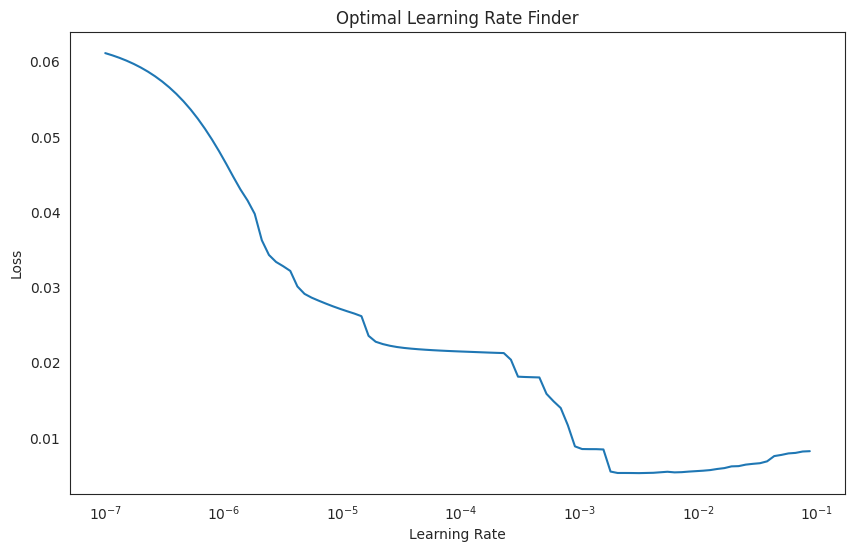

In [ ]:
# Initialize the Sequential model
model_rnn = Sequential()

# Use an Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, n_features)))

# Add a Simple RNN layer
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=False))

# Flatten the output (if needed)
model_rnn.add(Flatten())

# Add a Dense layer for output
model_rnn.add(Dense(n_steps_out, activation='relu'))

# Define the loss function
loss = tf.keras.losses.Huber()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# Compile the model
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mae'])

# Variables to store learning rates and losses
learning_rates = []
losses = []

# Learning rate range test parameters
initial_lr = 1e-7  # Start with a very small learning rate
max_lr = 0.1  # Maximum learning rate for the test
num_steps = 100  # Number of steps for learning rate increase

# Calculate the exponential step for learning rate increase
lr_step = (max_lr / initial_lr) ** (1 / num_steps)

# Perform the learning rate range test
for step in range(num_steps):
    # Set the learning rate dynamically using assign()
    lr = float(initial_lr * (lr_step ** step))
    model_rnn.optimizer.learning_rate.assign(lr)

    # Store the learning rate
    learning_rates.append(lr)

    # Train for one batch (or one epoch) with the current learning rate
    history = model_rnn.fit(X, y, epochs=1, batch_size=32, verbose=0)

    # Store the loss value
    losses.append(history.history['loss'][0])

# Plot the loss vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, losses)
plt.xscale('log')  # Use logarithmic scale for learning rate
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Optimal Learning Rate Finder')
plt.show()


In [ ]:
# Initialize the Sequential model
model_rnn = Sequential()

# Use an Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, n_features)))

# Add Simple RNN layers with more units and dropout
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu', return_sequences=False))  # Increased units, relu activation
model_rnn.add(Dropout(0.2))  # Add dropout for regularization

# Flatten the output
model_rnn.add(Flatten())

# Add a Dense layer for output with linear activation
model_rnn.add(Dense(n_steps_out, activation='linear'))  # Linear activation for regression

# Define the loss function
loss = tf.keras.losses.Huber()

# Set the optimal learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Adjust this as needed

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop if val_loss doesn't improve for 10 epochs

# Compile the model
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mse'])


In [ ]:
# Train the model with early stopping
history = model_rnn.fit(
    X,
    y,
    epochs=100,  # You can adjust this
    batch_size=32,
    verbose=1,
    validation_data=(X1, y1),
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.0244 - mse: 0.0490 - val_loss: 0.0062 - val_mse: 0.0124
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0081 - mse: 0.0163 - val_loss: 0.0057 - val_mse: 0.0113
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0071 - mse: 0.0142 - val_loss: 0.0054 - val_mse: 0.0109
Epoch 4/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.0066 - mse: 0.0131 - val_loss: 0.0053 - val_mse: 0.0105
Epoch 5/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 0.0062 - mse: 0.0124 - val_loss: 0.0052 - val_mse: 0.0104
Epoch 6/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.0060 - mse: 0.0119 - val_loss: 0.0050 - val_mse: 0.0100
Epoch 7/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - loss: 0.0057 - mse: 0.0114 - val_loss: 0.0050 - val_mse: 0.0100
Epoch 8/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - loss: 0.0056 - mse: 0.0111 - val_loss: 0.0049 - val_mse: 0.0098
Epoch 9/100
1094

Epoch 1/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0560 - mse: 0.1120 - val_loss: 0.0337 - val_mse: 0.0674
Epoch 2/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0413 - mse: 0.0826 - val_loss: 0.0306 - val_mse: 0.0612
Epoch 3/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0365 - mse: 0.0729 - val_loss: 0.0281 - val_mse: 0.0562
Epoch 4/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0339 - mse: 0.0678 - val_loss: 0.0270 - val_mse: 0.0541
Epoch 5/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0329 - mse: 0.0657 - val_loss: 0.0261 - val_mse: 0.0521
Epoch 6/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0320 - mse: 0.0640 - val_loss: 0.0254 - val_mse: 0.0507
Epoch 7/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0313 - mse: 0.0626 - val_loss: 0.0247 - val_mse: 0.0494
Epoch 8/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0306 - mse: 0.0612 - val_loss: 0.0240 - val_mse: 0.0480
Epoch 9/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms

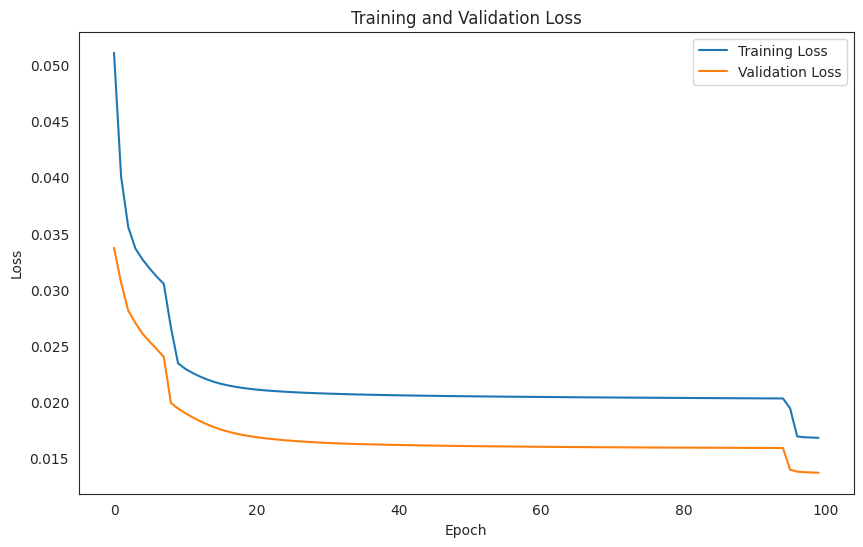

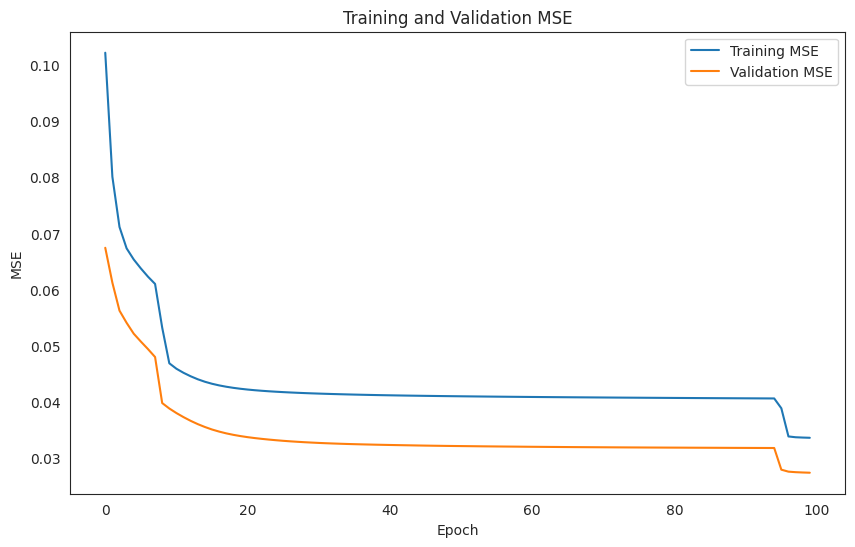

In [ ]:
'''
# Initialize the Sequential model
model_rnn = Sequential()

# Use an Input layer to specify the input shape
model_rnn.add(Input(shape=(n_steps_in, n_features)))

# Add a Simple RNN layer
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=False))

# Flatten the output (if needed)
model_rnn.add(Flatten())

# Add a Dense layer for output
model_rnn.add(Dense(n_steps_out, activation='relu'))

# Define the loss function
loss = tf.keras.losses.Huber()

# Set the optimal learning rate found earlier

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

# Compile the model with the optimal learning rate
model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

# Train the model with the optimal learning rate
history = model_rnn.fit(
    X,
    y,
    epochs=100,  # Adjust as needed
    batch_size=32,
    verbose=1,
    validation_data=(X1, y1)
)
'''

# Get the training and validation loss and MSE
mse = history.history['mse']
loss = history.history['loss']
val_mse = history.history['val_mse']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training and Validation MSE')
plt.show()


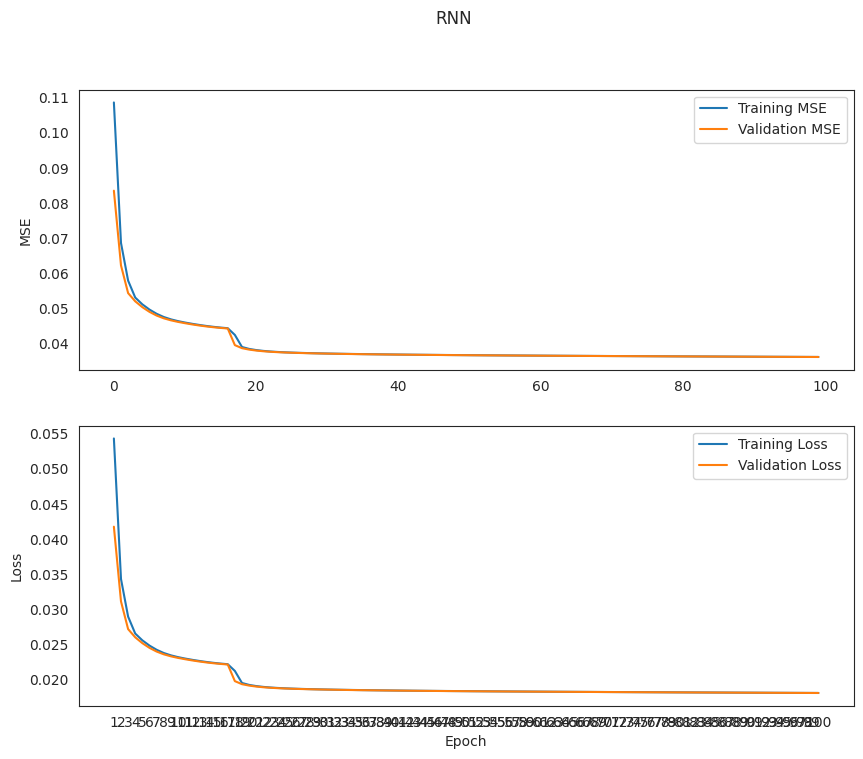

R-squared       MAE       MSE     CVRMSE
0   -0.38409  0.124985  0.036151  51.788682

In [ ]:
# PostProcessing
# create an instance of the MetricsPlotter class
metrics_plotter = MetricsPlotter(mse, val_mse, loss, val_loss)
metrics_plotter.plot(title='RNN')
yhat1 = model_rnn.predict(X1, verbose=0)
num_cols = n_steps_out
# Generate column names
pred_cols = ['pt' + str(i + 1) for i in range(num_cols)]
real_cols = ['t' + str(i + 1) for i in range(num_cols)]
# Create dataframes
df_prediction = pd.DataFrame(yhat1, columns=pred_cols)
df_realvalues = pd.DataFrame(y1, columns=real_cols)
pred_1 = df_prediction['pt1']
Real_1 = df_realvalues['t1']

metric.add(y1, yhat1)
metrics_df = metric.get()
end_time = time.time()

metrics_df

##Forecaste profile > specify peak > imbalance method > forecast peaks ( decrease avvuracy significanyly)

Forecast the entire profile using RandomForestRegressor without any modifications for imbalance.

Label Peaks Based on Z-Score:



After forecasting, apply Z-score thresholding to classify peaks and non-peaks for both training and test sets.

Prepare Data for Peak Classification:



Use the labeled peak data to train a separate RandomForestClassifier.

Apply SMOTE to X_peak_train and y_peak_train to handle the imbalance in peak/non-peak data.

Train the Peak Classifier with Class Weights:



Train RandomForestClassifier using class weights to account for peak class rarity.

Evaluate Peak Detection on Test Set:



Use the trained classifier to predict peaks in the test set and calculate classification metrics for peak detection.

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

# Function for converting series to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1, t)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_t-{i}' for col in df.columns]

    # Include the current time step (t)
    cols.append(df)
    names += [f'{col}_t' for col in df.columns]

    # Forecast sequence (t+1, ... t+n) for 1StewartSt only
    for i in range(0, n_out):
        cols.append(df[['1StewartSt']].shift(-i))
        names += [f'1StewartSt_t+{i}' if i != 0 else '1StewartSt_t']

    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)

    return agg

# Step 1: Forecast Profile using RandomForestRegressor
data = normalized_data  # Ensure normalized_data has the correct structure
n_in, n_out = 24, 24  # Lag steps and forecast steps
transformed_data = series_to_supervised(data, n_in, n_out)

X = transformed_data.iloc[:, :-n_out].values
y = transformed_data.iloc[:, -n_out:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Set optimal parameters from previous tuning
BEST_N_ESTIMATORS = 100
BEST_MAX_DEPTH = 10
BEST_MIN_SAMPLES_SPLIT = 10
BEST_MIN_SAMPLES_LEAF = 4
BEST_MAX_FEATURES = 'sqrt'

# Train profile forecasting model
profile_forecaster = RandomForestRegressor(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=BEST_MAX_DEPTH,
    min_samples_split=BEST_MIN_SAMPLES_SPLIT,
    min_samples_leaf=BEST_MIN_SAMPLES_LEAF,
    max_features=BEST_MAX_FEATURES,
    random_state=42
)
profile_forecaster.fit(X_train, y_train)

# Predict the profile
y_pred_train = profile_forecaster.predict(X_train)
y_pred_test = profile_forecaster.predict(X_test)

# Step 2: Identify Peaks and Train a Classifier for Peak Detection
z_threshold = 2
y_pred_train_df = pd.DataFrame(y_pred_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_train_df = pd.DataFrame(y_train, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_pred_test_df = pd.DataFrame(y_pred_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])
y_test_df = pd.DataFrame(y_test, columns=[f'1StewartSt_t+{i+1}' for i in range(n_out)])

# Calculate peak status for train and test sets
peak_status_pred_train = y_pred_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_train = y_train_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_pred_test = y_pred_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))
peak_status_actual_test = y_test_df.apply(lambda col: (zscore(col) >= z_threshold).astype(int))

# Flatten the data across all 24 forecast steps to apply SMOTE
X_peak_train_flattened = np.repeat(X_train, n_out, axis=0)  # Repeat each row 24 times for each forecast step
y_peak_train_flattened = peak_status_actual_train.values.flatten()  # Flatten to have one row per forecast step

# Use SMOTE to handle imbalance for peak classification
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_peak_train_resampled, y_peak_train_resampled = smote.fit_resample(X_peak_train_flattened, y_peak_train_flattened)

# Train a RandomForestClassifier for peak detection with class weights
peak_classifier = RandomForestClassifier(
    n_estimators=50, max_depth=10, class_weight='balanced', random_state=42
)
peak_classifier.fit(X_peak_train_resampled, y_peak_train_resampled)

# Predict peaks on test set for all 24 forecasted steps
y_peak_pred_flattened = peak_classifier.predict(np.repeat(X_test, n_out, axis=0))

# Reshape predictions back to the original 24-step structure for evaluation
y_peak_pred = y_peak_pred_flattened.reshape(-1, n_out)

# Calculate metrics for each step
results = {
    'test': {'true_positives': [], 'false_positives': [], 'false_negatives': [], 'true_negatives': [], 'precision': [], 'f1_score': []}
}

# Function to calculate metrics for each forecasted step
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    tn, fp, fn, tp = cm if len(cm) == 4 else (0, 0, 0, 0)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 'Precision': precision, 'F1 Score': f1}

# Calculate metrics for each forecast step on the test set
for step in range(n_out):
    y_true_step = peak_status_actual_test[f'1StewartSt_t+{step+1}'].values
    y_pred_step = y_peak_pred[:, step]
    metrics = calculate_metrics(y_true_step, y_pred_step)
    results['test']['true_positives'].append(metrics['TP'])
    results['test']['false_positives'].append(metrics['FP'])
    results['test']['false_negatives'].append(metrics['FN'])
    results['test']['true_negatives'].append(metrics['TN'])
    results['test']['precision'].append(metrics['Precision'])
    results['test']['f1_score'].append(metrics['F1 Score'])

# Convert results to DataFrame for easy viewing
test_results_df = pd.DataFrame({
    'Step': [f't+{i}' for i in range(1, n_out + 1)],
    'True Positives': results['test']['true_positives'],
    'False Positives': results['test']['false_positives'],
    'False Negatives': results['test']['false_negatives'],
    'True Negatives': results['test']['true_negatives'],
    'Precision': results['test']['precision'],
    'F1 Score': results['test']['f1_score']
})



Testing Results:
    Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             101              539               42            6317   
1    t+2              91              549               52            6307   
2    t+3              75              565               68            6291   
3    t+4              60              580               83            6276   
4    t+5              49              591               94            6265   
5    t+6              43              597              100            6259   
6    t+7              37              603              106            6253   
7    t+8              36              604              107            6252   
8    t+9              36              604              107            6252   
9   t+10              37              603              106            6253   
10  t+11              42              598              101            6258   
11  t+12              47              593     

In [ ]:
test_results_df

Step  True Positives  False Positives  False Negatives  True Negatives  \
0    t+1             101              539               42            6317   
1    t+2              91              549               52            6307   
2    t+3              75              565               68            6291   
3    t+4              60              580               83            6276   
4    t+5              49              591               94            6265   
5    t+6              43              597              100            6259   
6    t+7              37              603              106            6253   
7    t+8              36              604              107            6252   
8    t+9              36              604              107            6252   
9   t+10              37              603              106            6253   
10  t+11              42              598              101            6258   
11  t+12              47              593               96            6263   
12  t+13              56              584               87            6272   
13  t+14              62              578               81            6278   
14  t+15              76              564               67            6292   
15  t+16              89              551               54            6305   
16  t+17              97              543               46            6313   
17  t+18             101              539               42            6317   
18  t+19             102              538               41            6318   
19  t+20             101              539               42            6317   
20  t+21             103              537               40            6319   
21  t+22             103              537               40            6319   
22  t+23              98              542               45            6314   
23  t+24              90              550               53            6306   

    Precision  F1 Score  
0    0.157812  0.257982  
1    0.142187  0.232439  
2    0.117188  0.191571  
3    0.093750  0.153257  
4    0.076563  0.125160  
5    0.067187  0.109834  
6    0.057813  0.094508  
7    0.056250  0.091954  
8    0.056250  0.091954  
9    0.057813  0.094508  
10   0.065625  0.107280  
11   0.073438  0.120051  
12   0.087500  0.143040  
13   0.096875  0.158365  
14   0.118750  0.194125  
15   0.139063  0.227331  
16   0.151562  0.247765  
17   0.157812  0.257982  
18   0.159375  0.260536  
19   0.157812  0.257982  
20   0.160938  0.263091  
21   0.160938  0.263091  
22   0.153125  0.250319  
23   0.140625  0.229885

What need to be test ?
Let’s break this section into simple mathematical terms and examples to make the process clear.

### 1. **Autocorrelation Coefficient to Determine Segment Length**
- Imagine you have a daily peak load data series: \( [10, 15, 20, 18, 16, 12, 14] \) (representing the load for a week).
- The **autocorrelation coefficient** checks how strongly the values in this series relate to each other after shifting by one day, two days, etc.
  - For example:
    - Compare \( [10, 15, 20, 18, 16, 12, 14] \) with \( [15, 20, 18, 16, 12, 14, \text{(empty)}] \) (shift by 1 day).
    - If a shift of 7 days gives a high correlation, it suggests a weekly pattern. The segment length is thus chosen as 7 days.

### 2. **Dynamic Time Warping (DTW)**
- DTW compares the similarity between two load curves, even if they are stretched or compressed in time.
  - Example:
    - Curve 1: \( [10, 15, 20, 18] \)
    - Curve 2: \( [10, 16, 19, 18] \)
    - Traditional methods would align values directly: \( 10 \to 10, 15 \to 16, 20 \to 19, 18 \to 18 \).
    - DTW allows flexible alignment to capture trends:
      - \( 10 \to 10 \),
      - \( 15 \to 16 \),
      - \( 20 \to 19, 19 \to 18 \).
    - DTW minimizes the distance (sum of squared differences) between aligned points.

### 3. **Some-Hot Encoding for Calendar Information**
- Calendar features (e.g., weekends, holidays) affect load. For simplicity:
  - Monday to Friday = "Working Day" (\([1, 0]\)),
  - Saturday/Sunday = "Weekend" (\([0, 1]\)).
- Encoding example for a week:
  - \( [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1] \).
- This allows the algorithm to distinguish patterns based on calendar data without adding unnecessary complexity.

### 4. **Gated Recurrent Neural Network (GRU)**
- GRU models time series by learning from both current and past data while ignoring irrelevant past information.
  - Input data: \( [10, 15, 20, 18] \) (last 4 days' loads), plus calendar and DTW features.
  - GRU predicts the next load: \( 16 \).
  - GRU does this by using fewer parameters compared to LSTMs but maintains the ability to remember trends over time.

### 5. **Novelty of the Approach**
- Unlike older methods:
  - Autocorrelation determines the ideal segment length for analysis.
  - DTW captures not just overall trends but fine-grained differences.
  - Calendar encoding simplifies handling of holidays and weekends.
  - GRU efficiently handles time series with fewer resources while retaining high accuracy.

By combining these steps, the proposed method delivers accurate predictions for daily peak loads in power systems.


